# Importations

This code uses the library  [scQubits](https://scqubits.readthedocs.io/en/latest/). And a library called Fluxonium. And last part we use a bit of qutip.

In [1]:
from __future__ import division  # to ensure that 1/2=0.5 and not 0 !!
import numpy as np
import scipy.constants as cst
import matplotlib.pyplot as plt
import scipy.linalg as lin
import scipy.optimize as sci
import scipy.integrate as sint
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as colors
import pprint as  pp 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.special import eval_genlaguerre as Ln
from scipy.special import eval_hermite as He


from scipy.special import factorial as fact
from tqdm.notebook import tqdm 
# from qutip import *
from matplotlib.widgets import Slider, Button
import scqubits as scq

from matplotlib.colors import LogNorm

from Fluxonium import *


from qutip import *

In [2]:
plt.rcParams.update({'font.size': 18})
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
%matplotlib widget


# plt.style.use('seaborn-v0_8-colorblind')

In [3]:
phiq = cst.hbar/(2*cst.e)

# Definning functions

In [4]:
def potential(Ej,El,phi):
    return El*phi**2/2 - Ej*np.cos(phi)
def inudctive_energy(El, phi): 
    return El*0.5*(phi)**2 
def sinc(phi):
    return np.sin(phi)/phi
def parabola(x, a, b, c):
     return a*x*x +b*x + c
    
def T1_model(tau, T1, A,B) : 
    return A*np.exp(-tau/T1) + B

# Goals :  
* Find the best paramaters to get a protected fluxonium at 0 external flux.
* Estimate the expected Coherence time and life time in that case. 


Since We need to know where we can have a protected qubit at 0 flux, the range of Ej, El and Ec is very broad, so it is good to find some conditions in order to narrow our searching window. So first we study the potetial well and we see only when we have Three wells and more to be able to get to our goal.

# Potential Well

the potential of the fluxonium at 0 external flux is written : 
$$ -E_j \cos{\varphi}  + \frac{E_l}{2} \varphi ^2 $$ 

To see when we get different potentials we can easily look at when the derivative of the potential is equal to 0  : 

$$ E_j \sin{\varphi} + E_l \varphi = 0$$

Solution of this equation is illustrated in the slider below. 

In [5]:
def update(val):
    """""""""""""""
    function that update the plot with respect of the slider
    """""""""""""""
    pot.set_ydata(potential(1, El_slider.val, phis))
    pot_ind.set_ydata(-1+inudctive_energy(El_slider.val, phis))
    fac.set_ydata(np.ones(len(phis))*El_slider.val/1)
    fig.canvas.draw_idle()
phis =  np.linspace(-5*np.pi, 5*np.pi, 500)
Ej = 1
El = 0.1

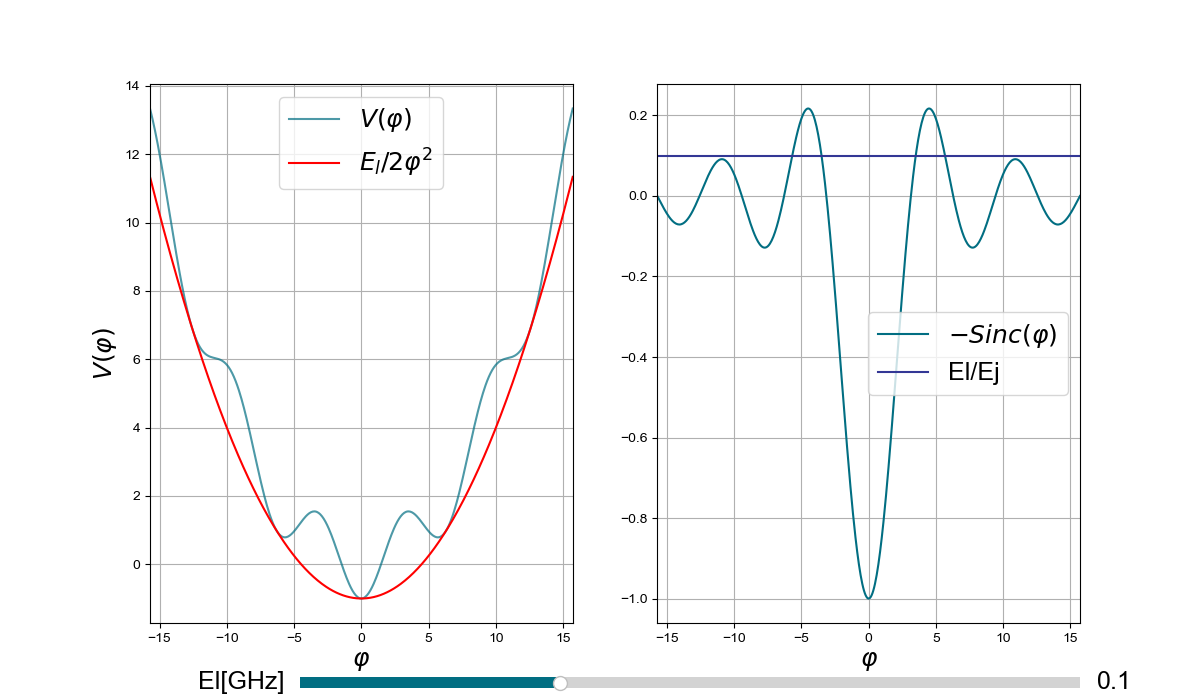

In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (12,7),sharex = True)
pot , = ax1.plot(phis, potential(Ej,El,phis), alpha=0.7, label = r'$V(\varphi)$')
pot_ind, = ax1.plot(phis, -Ej +inudctive_energy(El, phis), 'red', label = r'$E_l/2 \varphi^2$')
sincp, = ax2.plot(phis, -Ej*np.sin(phis)/(phis), label = r'$-Sinc(\varphi)$')
fac, = ax2.plot(phis, np.ones(len(phis))*El/Ej, label ='El/Ej')

axEl= fig.add_axes([0.25, 0.01, 0.65, 0.03])
El_slider = Slider(ax=axEl, label='El[GHz]', valmin=0., valmax=0.3, valinit=El)
El_slider.on_changed(update)




ax1.set_xlim(np.min(phis),np.max(phis))
ax2.set_xlim(np.min(phis),np.max(phis))
ax1.set_xlabel(r'$\varphi $')
ax2.set_xlabel(r'$\varphi $')
ax1.set_ylabel(r'$V(\varphi)$')
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

# ax1.scatter(phi1_vec[np.argmin(np.abs(Els - 0.1))], potential(1,0.1,phi1_vec[np.argmin(Els - 0.1)]), color ='black')
# ax1.scatter(phi2_vec[np.argmin(np.abs(Els - 0.1))], potential(1,0.1,phi2_vec[np.argmin(Els - 0.1)])-0.05, color = 'black')

# ax2.scatter(phi1_vec[np.argmin(np.abs(Els - 0.1))],[0.1], color ='black')
# ax2.scatter(phi2_vec[np.argmin(np.abs(Els - 0.1))], [0.1], color = 'black')

# ax1.text(phi1_vec[np.argmin(np.abs(Els - 0.1))] - 0.5, potential(1,0.1,phi1_vec[np.argmin(Els - 0.1)])+0.5 , s = r'$\varphi_1$', fontdict= dict(fontsize =16))
# ax1.text(phi2_vec[np.argmin(np.abs(Els - 0.1))] + 0.3, potential(1,0.1,phi2_vec[np.argmin(Els - 0.1)])-0.7 , s = r'$\varphi_2$', fontdict= dict(fontsize =16))


# ax2.text(phi1_vec[np.argmin(np.abs(Els - 0.1))] - 1.8, 0.12 , s = r'$\varphi_1$', fontdict= dict(fontsize =16))
# ax2.text(phi2_vec[np.argmin(np.abs(Els - 0.1))] + 0.3, 0.12 , s = r'$\varphi_2$', fontdict= dict(fontsize =16))


(-0.10000000000000009, 23.0)

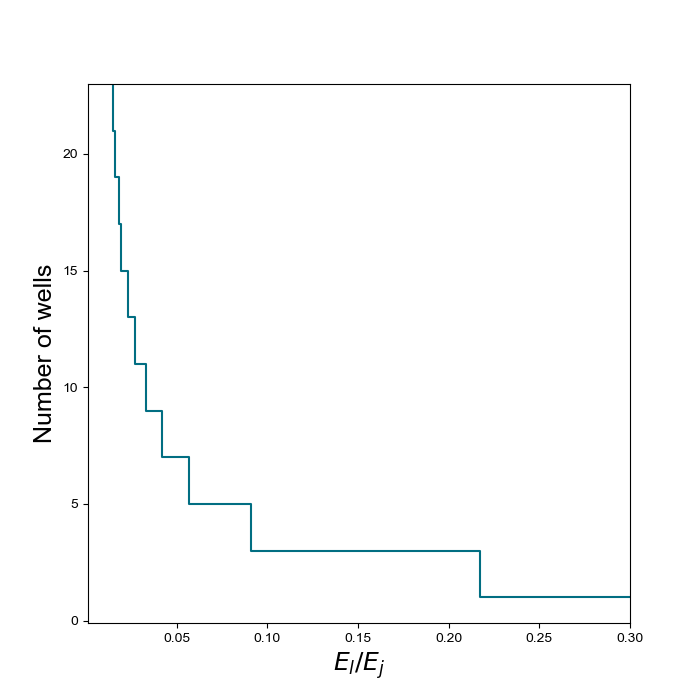

In [7]:
number_of_wells = [1,1,3,3,5,5,7,7,9,9,11,11,13,13,15,15,17,17,19,19,21,21,23]
ratio = [0.3,0.217,0.217,0.091,0.091,0.057,0.057,0.042,0.042,0.033,0.033,0.027,0.027,0.023,0.023,0.019,0.019,0.018,0.018,0.016,0.016,0.015,0.015]
fig, (ax1) = plt.subplots(1, 1,figsize = (7,7),sharex = True)
ax1.plot(ratio, number_of_wells)
ax1.set_xlabel(r'$E_l/E_j$')
ax1.set_ylabel(r'Number of wells')
ax1.set_xlim(None, 0.3)
ax1.set_ylim(None, 23)

# Whet capacitive energy to choose ? 

We now know what condition we need between El and Ej to to get the potential well we need. but this is not sufficient, we need a condition on the capacitive energy of the fluxonium in order to trap states in the higher potential wells. In such a way we will be able to use it to create the protected qubit we need.

So to make it easy, let's say we can numeracilly calculate the height of the seconds potenial and then we should take at least Ec smaller than this height.

In [8]:
phi1s = np.linspace(np.pi, 4.49, 500)
phi2s = np.linspace(4.49, 2*np.pi, 500)
sinc1 = sinc(phi1s)
sinc2 = sinc(phi2s)
Els = np.linspace(0.005,0.217,200)
phi1_vec = np.zeros(len(Els))
phi2_vec = np.zeros(len(Els))
hauteur1 =  np.zeros(len(Els))
hauteur2 =  np.zeros(len(Els))

for e in range(len(Els)) : 
    phi1_vec[e] = phi1s[np.argmin(np.abs(-sinc1 - Els[e]))]
    phi2_vec[e] = phi2s[np.argmin(np.abs(-sinc2 - Els[e]))]
    hauteur1[e] = potential(1, Els[e], phi1_vec[e]) - potential(1, Els[e],0 )
    hauteur2[e] = potential(1, Els[e], phi1_vec[e]) - potential(1, Els[e], phi2_vec[e])

In [9]:
fit_params_h2, pcov_h2 = sci.curve_fit(parabola, Els, hauteur2)

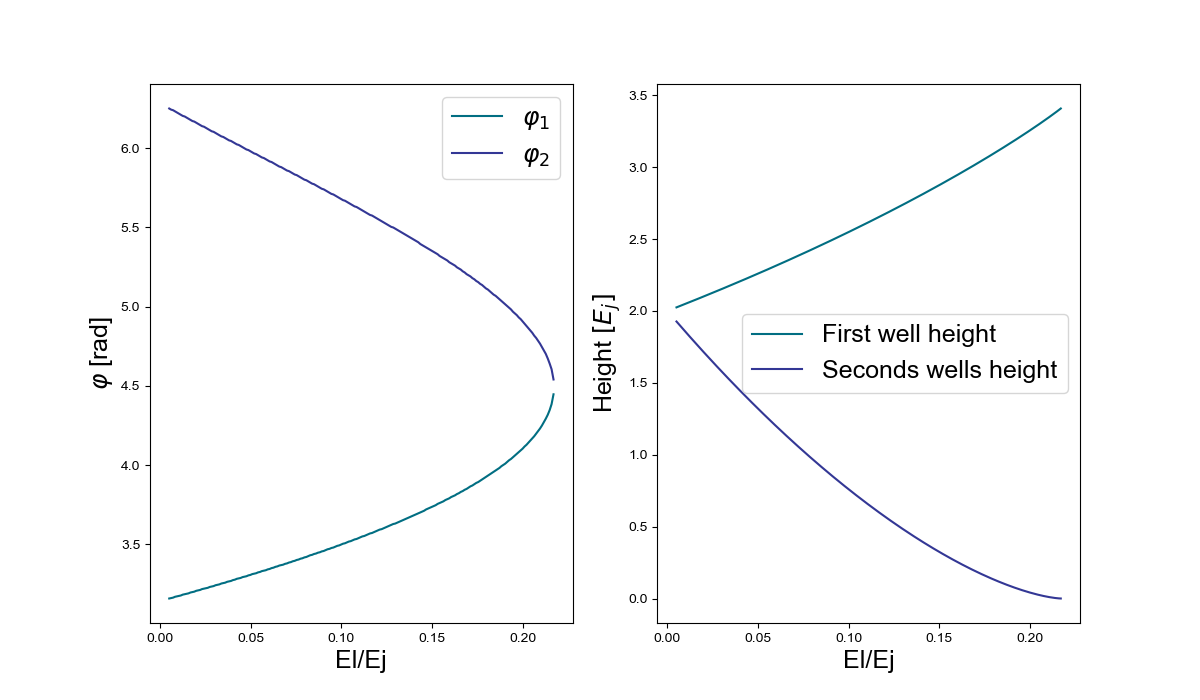

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (12,7))
ax1.plot(Els, phi1_vec, label = r'$\varphi_1$')
ax1.plot(Els, phi2_vec, label = r'$\varphi_2$')
ax1.legend()
ax1.set_xlabel('El/Ej')
ax1.set_ylabel(r'$\varphi$ [rad]')

ax2.plot(Els, hauteur1, label ='First well height')
ax2.plot(Els, hauteur2, label ='Seconds wells height')
# ax2.plot(Els, parabola(Els, fit_params_h2[0], fit_params_h2[1], fit_params_h2[2]), label ='Seconds wells fit parabola')
ax2.set_ylabel(r'Height $[E_j]$')
ax2.set_xlabel('El/Ej')
ax2.legend()

So to have states living in the seconds well. We have two quantities to compare, first the barrier of our potential in this case it is what is called heidht of second well let's call it $H_2$. Second is the effective inductive energy on the minima of the potetial ($\varphi_2$)



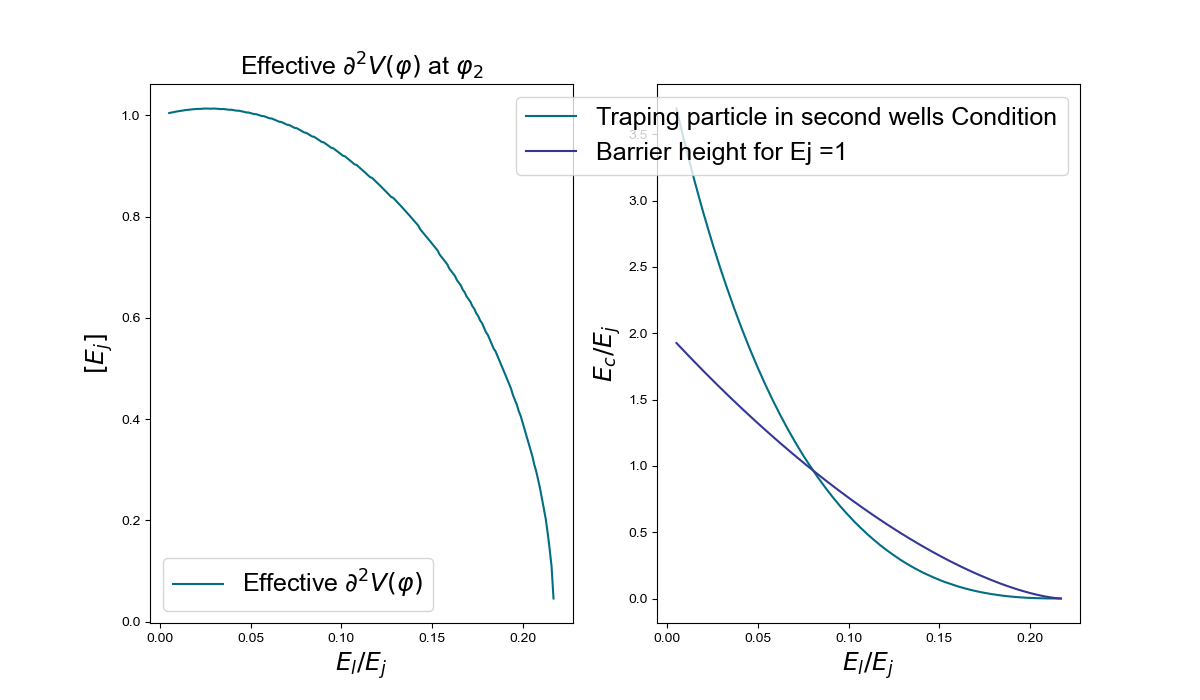

In [11]:
El_eff = np.cos(phi2_vec)+Els
Els = np.linspace(0.005,0.217,200)
fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (12,7))

Fluxon_condition = hauteur2*hauteur2/El_eff
ax1.plot(Els, El_eff, label = r'Effective $\partial^2 V(\varphi)$' )
ax2.plot(Els, Fluxon_condition, label = 'Traping particle in second wells Condition')
ax2.plot(Els,hauteur2, label ='Barrier height for Ej =1')

ax1.set_title(r'Effective $\partial^2 V(\varphi)$ at $\varphi_2$') 
ax1.set_ylabel(r'$[E_j]$')
ax1.set_xlabel(r'$E_l/E_j$')
ax2.set_xlabel(r'$E_l/E_j$')
ax2.set_ylabel(r'$E_c/E_j$')

ax1.legend()
ax2.legend()

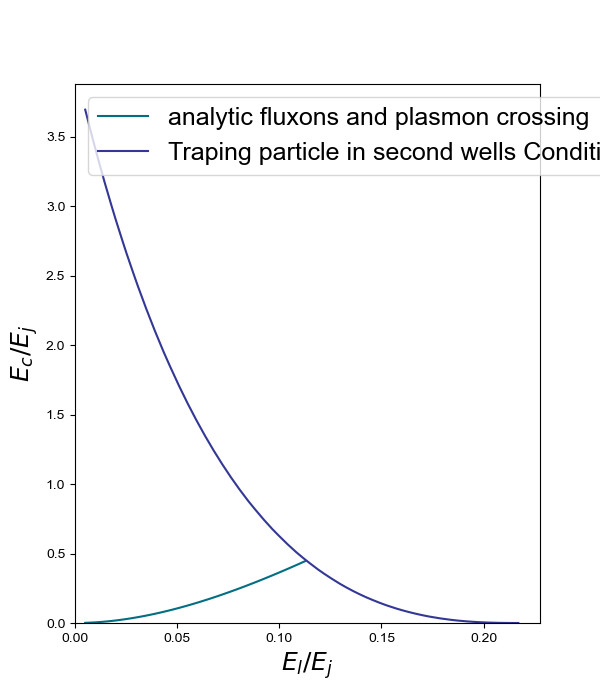

In [12]:
fig, (ax1) = plt.subplots(1, 1,figsize = (6,7))
Els = np.linspace(0.005,0.217,200)
FLP_condition = (hauteur1-hauteur2)**2 / (8*(Els+1))

argmax = np.argmin(np.abs(Fluxon_condition-FLP_condition))

ax1.plot(Els[:argmax],FLP_condition[:argmax], label = 'analytic fluxons and plasmon crossing ')

ax1.plot(Els, Fluxon_condition, label = 'Traping particle in second wells Condition')

ax1.set_xlim(0,None)
ax1.set_ylim(0,None)
ax1.set_xlabel(r'$E_l/E_j$')
ax1.set_ylabel(r'$E_c/E_j$')

ax1.legend()

# Integer Flux fluxonium Diagram

In this narrowed window we can try to see where do we have the fluxon transistions below the first plasmon transistion. We know outside this window we should not have any fluxon transistion. 

In [13]:
N_cutoff = 50
Ej = 1
Ec_plot = np.linspace(0.025,0.514,100)
Els = np.linspace(0.005,0.217,200)
list_transistion = ['01','02','03']
energy_transistion = {}
El_plot = []
index_ec = 0
for ec in Ec_plot:
    energy_transistion[ec] = {}
    El_sweep = np.linspace(0.02,0.15)
    for t in list_transistion:
        energy_transistion[ec][t] = []
    for index_el, el in enumerate(El_sweep): 
        fluxonium = Fluxonium(Ej=Ej, Ec=ec, El=el, phi_ext=0, cutoff=N_cutoff)
        eigen_energy, eigen_values = fluxonium.diago()
        for t in list_transistion : 
            energy_transistion[ec][t].append((eigen_energy[int(t[1])] - eigen_energy[int(t[0])]))
    t0 = np.array(energy_transistion[ec]['01'])
    t1 = np.array(energy_transistion[ec]['02'])
    t2 = np.array(energy_transistion[ec]['03'])
    El_plot.append(El_sweep[np.argmin(np.abs(t1-0.5*(t0+t2)))])
    index_ec +=1
El_plot = np.array(El_plot)

The Simulation of the condition fluxons below plasmon is kind of hard worked. so we know if El is going to sweep on the range for a given Ec. at some point the fluxons and the transmon will cross. and then we take the condition if one the transistion is between two others. and like this we can determine kind of a line where if we have El lower than this line we get the fluxon lower than the first plasmon, and if it is higher we get the fluxon higher than the first plasmon. (the more higher El we can get fluxons cross the second plasmon, or the third and etc... ) 

Also I called the condition line Qutrit, because I see three levels. but probably it is a wrong name because we cannot distinguish between these three transistion in that regime. but anyway, this condition I tried to fit it with a prabola form and it fit well and most probably that is because of the parabolic form of the inductive energy. 

In [14]:
Marks = ['^','v','o',',','.']
# Qubits = {'Parisian Qubit': {'Ec_Ej' : 0.44/2.68, 'El_Ej' : 0.168/2.68}, 'Fluxonium V3':  {'Ec_Ej' : 1/10, 'El_Ej': 0.07/10}, 'V5B' : {'Ec_Ej': 2.46/6, 'El_Ej' : 0.1/6}, 'V5A' : {'Ec_Ej': 1.2/3, 'El_Ej' : 0.15/3}}
Qubits = { 'Targeted device' : {'Ec_Ej': 2.4/6, 'El_Ej' : 0.1/6}}
# Qubits = { 'FV5B 8' : {'Ec_Ej': 1.6/5.76, 'El_Ej' : 0.16/5.76}, 'FV5A 10' : {'Ec_Ej': 1.17/2.94, 'El_Ej' : 0.223/2.94}}

Qutrit_condition_Ec = Ec_plot
Qutrit_condition_El = El_plot

(0.0, 3.5)

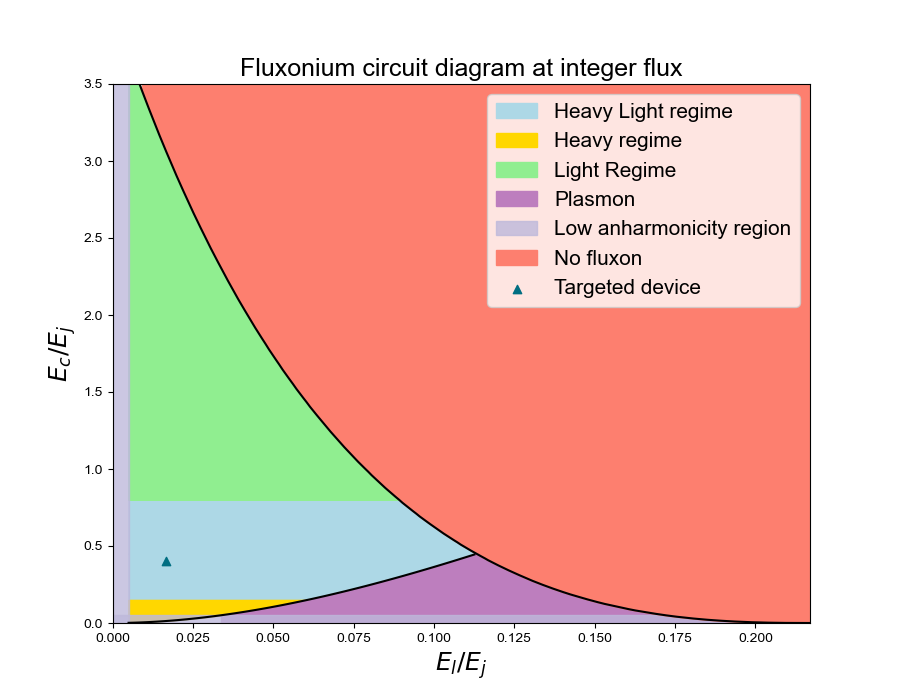

In [15]:
fig, (ax1) = plt.subplots(1, 1 ,figsize = (9,7))

ax1.plot(Els, Fluxon_condition, 'black')
# ax1.plot(Qutrit_condition_El, Qutrit_condition_Ec, color = 'black', label = 'numeric fluxon and plasmon crossing')
# ax1.plot(Els[:argmax],FLP_condition[:argmax], label = 'Fluxons and plasmon crossing ')
ax1.plot(Els[:argmax],FLP_condition[:argmax], 'black')






ax1.fill_between(Els, np.ones(len(Els))*0.45, Fluxon_condition, where =(Fluxon_condition>np.ones(len(Els))*0.45),color = 'LightBlue')
ax1.fill_between(Els[:argmax], np.ones(len(Els[:argmax]))*0.45, FLP_condition[:argmax], where =( FLP_condition[:argmax]<np.ones(len(Els[:argmax]))*0.45),color = 'LightBlue', label  = 'Heavy Light regime')


ax1.fill_between(Els[:argmax], np.ones(len(Els[:argmax]))*0.15, FLP_condition[:argmax], where =( FLP_condition[:argmax]<np.ones(len(Els[:argmax]))*0.15),color = 'Gold', label  = 'Heavy regime')


ax1.fill_between(Els, np.ones(len(Els))*0.8, Fluxon_condition, where =(Fluxon_condition>np.ones(len(Els))*0.8),color = 'lightGreen', label  = 'Light Regime')


ax1.fill_between(Els, FLP_condition, where =( FLP_condition>np.ones(len(Els))*0.05), color = '#bd7ebe', label = 'Plasmon')


ax1.fill_between(np.linspace(0,0.005,20),np.ones(20)*3.5, color = '#beb9db', alpha = 0.8)
ax1.fill_between(np.linspace(0,0.218,20),np.ones(20)*0.05, color = '#beb9db', alpha =0.8, label = 'Low anharmonicity region')


ax1.fill_between(Els, np.ones(len(Els))*3.5, Fluxon_condition, where =(Fluxon_condition<np.ones(len(Els))*3.5), color = '#fd7f6f', label = 'No fluxon')

km = 0
for k in Qubits.keys(): 
    ax1.scatter([Qubits[k]['El_Ej']],[Qubits[k]['Ec_Ej']],marker = Marks[km], label = k)
    km+=1

ax1.set_ylabel(r'$E_c/E_j$')
ax1.set_xlabel(r'$E_l/E_j$')
ax1.legend(fontsize="15")
ax1.set_title('Fluxonium circuit diagram at integer flux')
ax1.set_xlim(0,0.217)
ax1.set_ylim(0,3.5) 

I do the colors in another application because it is easier.

## Demo

In [16]:
# Ej = 10
# Ec = 0.16*Ej
# El = 0.015*Ej
# Ej = 6
# Ec = 2.4
# El = 0.1
Ej = 6.1
Ec = 1.6
El = 0.16

# Ej = 10
# Ec = 0.069*Ej
# El = 0.036*Ej
N_cutoff = 100

In [17]:
phi_plot = np.linspace(-4.5*np.pi, 4.5*np.pi, 500)
phi_ext_plot = [0,0.5]
which = np.arange(0,4,1)
E_pot = np.zeros((len(phi_ext_plot),len(phi_plot)))
eigen_energy = np.zeros((len(phi_ext_plot),N_cutoff))
psi_phi_space = np.zeros((len(phi_ext_plot),len(phi_plot),len(which)))
for phi_ind,phie_plot  in enumerate(phi_ext_plot): 
    fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El=El, phi_ext=phie_plot, cutoff=N_cutoff)
    eigen_energy[phi_ind,:], eigen_values = fluxonium.diago()
    E_pot[phi_ind,:] = El*phi_plot**2/2 - Ej*np.cos(phi_plot + 2*np.pi*phie_plot)
    psi_phi_space[phi_ind,:,:] = fluxonium.wavefunction_in_phase(which=which, phi_vec=phi_plot)


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 16734.38it/s]


[-12.56637061  -6.28318531   0.           6.28318531  12.56637061]


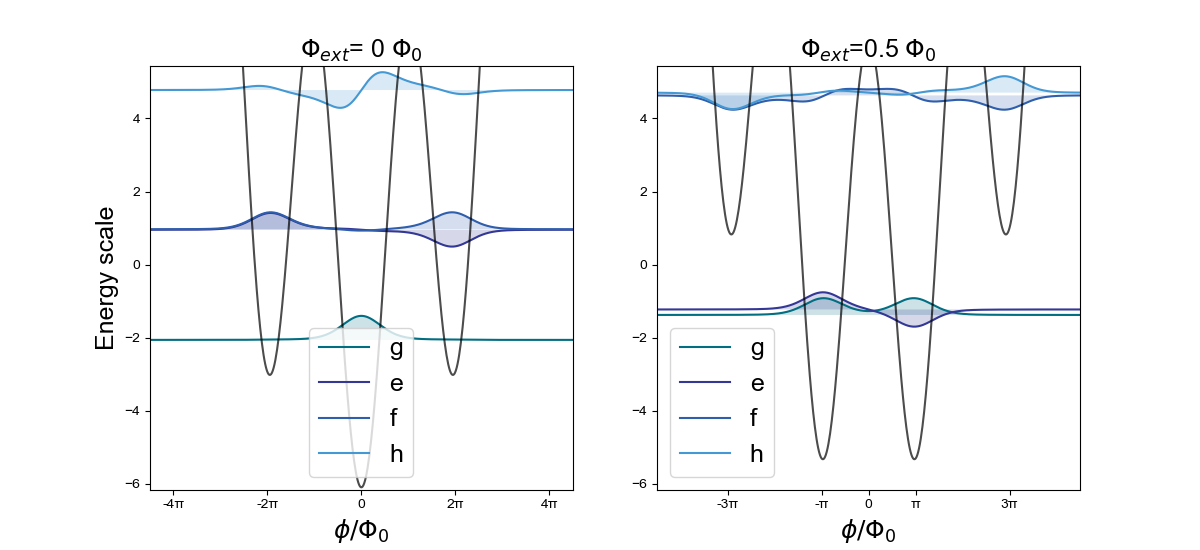

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (12,5.5))
[ax1.fill_between(phi_plot, psi_phi_space[0,:,k] + eigen_energy[0][which[k]],
                 eigen_energy[0][which[k]], alpha=0.2) for k in range(len(which))]
[ax2.fill_between(phi_plot, psi_phi_space[1,:,k] + eigen_energy[1][which[k]],
                 eigen_energy[1][which[k]], alpha=0.2) for k in range(len(which))]
labels =['g','e','f','h']
[ax1.plot(phi_plot, psi_phi_space[0,:,k] + eigen_energy[0][which[k]], label = labels[k]) for k in range(len(which))]
ax1.plot(phi_plot, E_pot[0], color='black', alpha=0.7)
[ax2.plot(phi_plot, psi_phi_space[1,:,k] + eigen_energy[1][which[k]], label = labels[k]) for k in range(len(which))]
ax2.plot(phi_plot, E_pot[1], color='black', alpha=0.7)
ax1.legend()
ax2.legend()

ymin = 1.01*min(E_pot[0])
ymax = np.max(psi_phi_space) + max(eigen_energy[0][which])
ax1.set_ylim(ymin, ymax)
ax2.set_ylim(ymin,ymax)
ax1.set_xlim(np.min(phi_plot),np.max(phi_plot))
ax2.set_xlim(np.min(phi_plot),np.max(phi_plot))
ax1.set_xlabel(r'$\phi /\Phi_0 $')
ax2.set_xlabel(r'$\phi /\Phi_0$')
pi= np.pi
theta = np.arange(-4 * np.pi, 5* np.pi, step=(2*np.pi))
theta2 = np.array([-3*pi, -pi, 0, pi,3*pi] )

print(theta)
ax1.set_xticks(theta, ['-4π', '-2π', '0', '2π', '4π'])
ax2.set_xticks(theta2, ['-3π', '-π', '0','π','3π' ])

ax1.set_ylabel(r'Energy scale')
# ax2.set_ylabel()

ax1.set_title('$\Phi_{ext} $= '+'{} $\Phi_0 $'.format(phi_ext_plot[0]))
ax2.set_title('$\Phi_{ext} $=' +'{} $\Phi_0 $'.format(phi_ext_plot[1]))
fig.savefig('wavefunction_protectedfluxonium_idealcase.PDF', dpi =180 )

In [19]:
list_transistion_spectrum = ['01','02','03','04','05','12','13','14','23','06','16','26','25','35','24','34','36','27','37','56','57','58','59']
et = {}
# Ej = 5.7
# Ec = 1.6
# El = 0.15

# phi_vec= np.linspace(-0.6,0.6,200)
phi_vec= np.arange(-0.6,0.6,0.02)
N_cutoff = 120
for t in list_transistion_spectrum : 
        et[t] = []
for k in tqdm(range(len(phi_vec))):
    fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El=El, phi_ext=phi_vec[k], cutoff=N_cutoff)
    eigen_energy, eigen_values = fluxonium.diago()
    for t in list_transistion_spectrum : 
        et[t].append((eigen_energy[int(t[1])] - eigen_energy[int(t[0])]))

100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 105.72it/s]


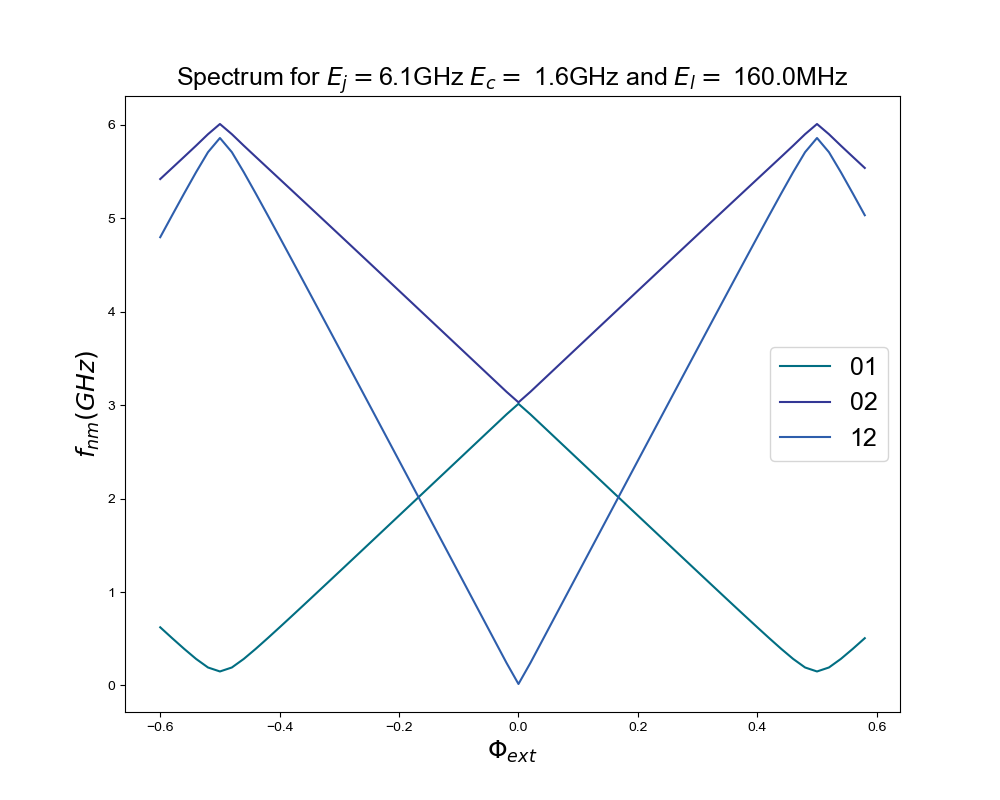

In [20]:
# list_transistion_spectrum = ['01','02','13','23','34','35'] #small Ec example
list_transistion_spectrum = ['01','02','12']
# list_transistion_spectrum = ['01','02','03','04','05','12','13','14','23','06','16','26','25','35','24','34','36','27','37','56','57','58','59']
# phi_vec= np.linspace(-0.6,0.6,200)

figft, axft = plt.subplots(1, 1, figsize=(10,8))
for t in list_transistion_spectrum : 
    axft.plot(phi_vec, et[t], label = t)
axft.set_xlabel(r'$\Phi_{ext} $')
axft.set_ylabel(r'$f_{nm} (GHz) $')
axft.set_title(r'Spectrum for $E_j = ${:.1f}GHz $E_c =$ {:.1f}GHz and $E_l=$ {:.1f}MHz'.format(Ej, Ec, El*1e3))
axft.legend()
figft.savefig('spectrum_protectedfluxonium.PNG')

In [21]:
250*5e-4

50

50

In [60]:
200/2**16

0.0030517578125

In [231]:
list_transistion_em = ['01','02','03','04','05','12','13','14','23','06','16','26','25','35','24','34','36','27','37','56','57','58','59']
em = {}
phi_vec= np.arange(-0.6,0.6,0.005)
for t in list_transistion_spectrum : 
        em[t] = []
for k in tqdm(range(len(phi_vec))):
    fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El=El, phi_ext=phi_vec[k], cutoff=N_cutoff)
    mat_elem = fluxonium.matrix_element('phase')
    for t in list_transistion_spectrum : 
        em[t].append(np.abs(mat_elem[int(t[0])][int(t[1])]))

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:06<00:00, 34.78it/s]


In [232]:
list_transistion_em = ['01','02','03','04','05','12','13','14','23','06','16','26','25','35','24','34','36','27','37','56','57','58','59']
em_charge = {}
phi_vec= np.arange(-0.6,0.6,0.005)
for t in list_transistion_spectrum : 
        em_charge[t] = []
for k in tqdm(range(len(phi_vec))):
    fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El=El, phi_ext=phi_vec[k], cutoff=N_cutoff)
    mat_elem_charge = fluxonium.matrix_element('charge')
    for t in list_transistion_spectrum : 
        em_charge[t].append(np.abs(mat_elem_charge[int(t[0])][int(t[1])]))

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:06<00:00, 34.77it/s]


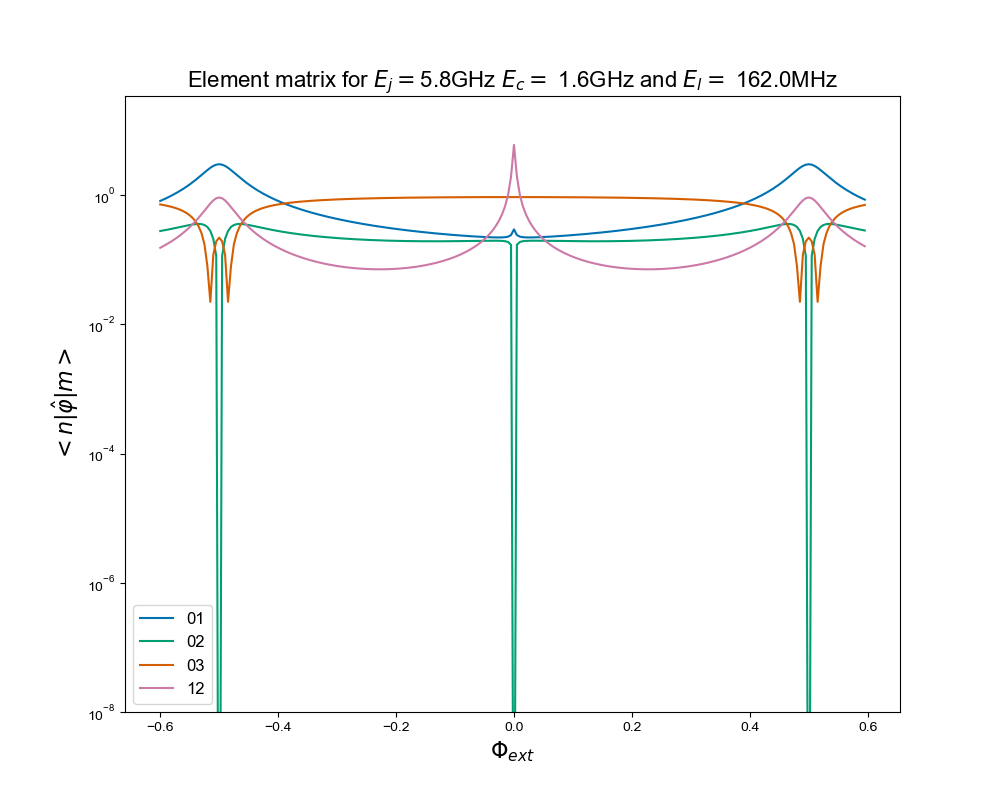

In [235]:
list_transistion_em = ['01','02','03','12']

figft, axft = plt.subplots(1, 1, figsize=(10,8))
for t in list_transistion_em : 
    axft.plot(phi_vec, em[t], label = t)
axft.set_xlabel(r'$\Phi_{ext} $')
axft.set_ylabel(r'$<n|\hat{\varphi}|m>  $')
axft.set_title(r'Element matrix for $E_j = ${:.1f}GHz $E_c =$ {:.1f}GHz and $E_l=$ {:.1f}MHz'.format(Ej, Ec, El*1e3))
axft.legend()
axft.set_yscale('log')
axft.set_ylim(1e-8,None)
figft.savefig('elem_mat.PNG')

# Element matrix with frequency 

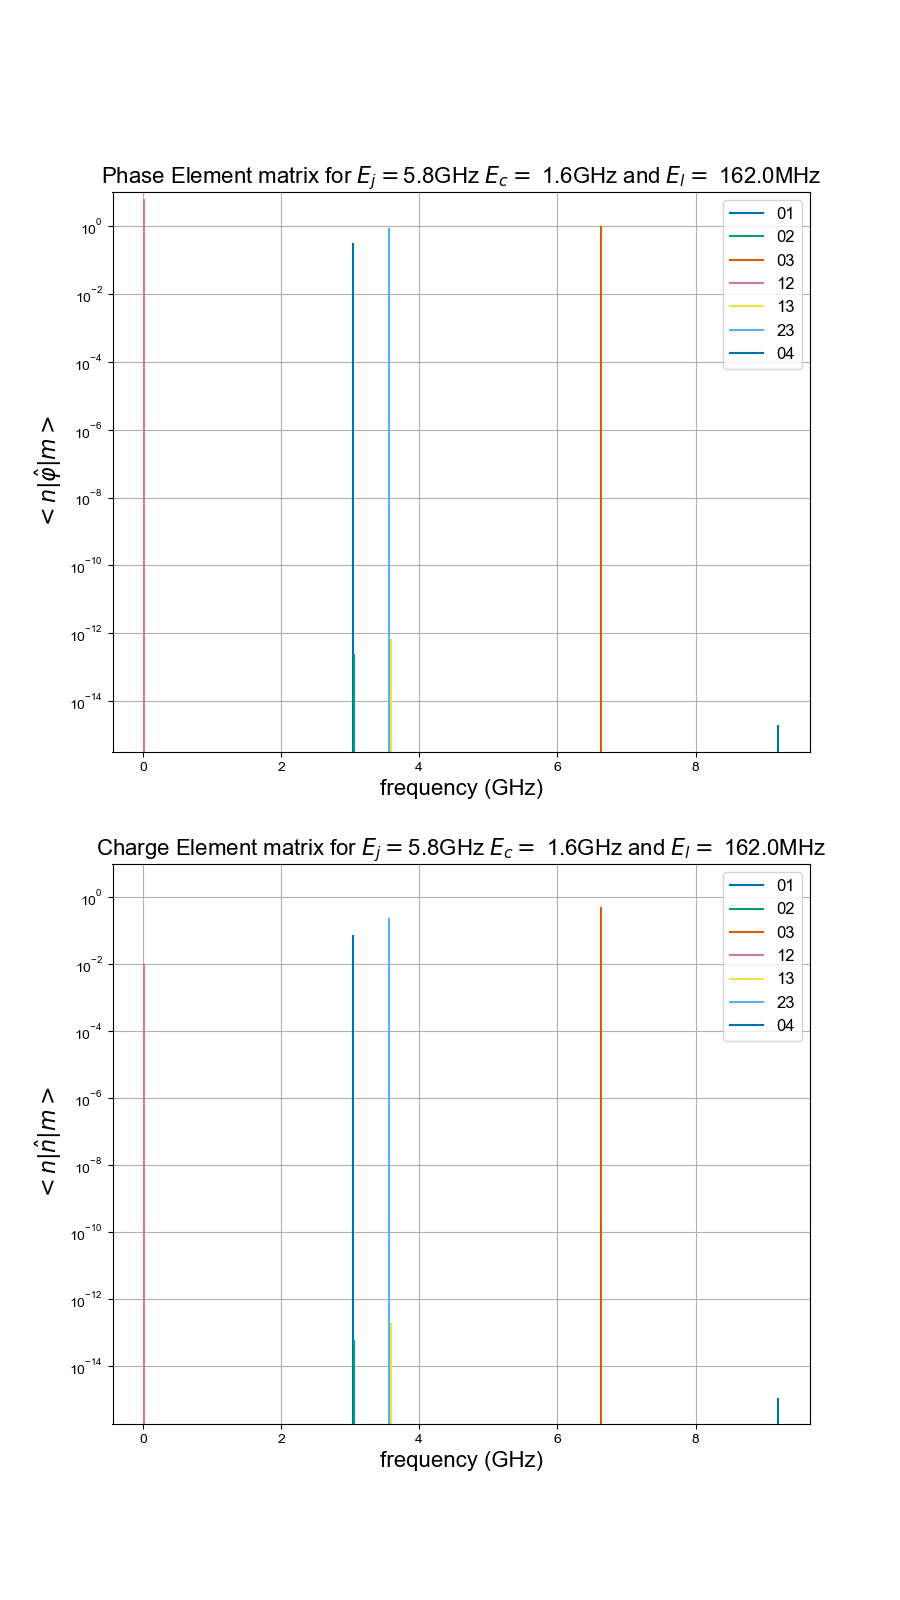

In [239]:
list_transistion_em = ['01','02','03','12','13','23','04']
figft, (axft,axft2) = plt.subplots(2, 1, figsize=(9,8*2))
phi0_arg = np.argmin(np.abs(phi_vec))
for t in list_transistion_em : 
    axft.plot([et[t][phi0_arg],et[t][phi0_arg] ], [0,em[t][phi0_arg]], label = t)
    axft2.plot([et[t][phi0_arg],et[t][phi0_arg] ], [0,em_charge[t][phi0_arg]], label = t)
axft.set_xlabel(r'frequency (GHz)')
axft.set_ylabel(r'$<n|\hat{\varphi}|m>  $')
axft.set_title(r'Phase Element matrix for $E_j = ${:.1f}GHz $E_c =$ {:.1f}GHz and $E_l=$ {:.1f}MHz'.format(Ej, Ec, El*1e3))
axft.legend()
axft.set_yscale('log')
axft.set_ylim(None,10)
axft.grid()

axft2.set_xlabel(r'frequency (GHz)')
axft2.set_ylabel(r'$<n|\hat{n}|m>  $')
axft2.set_title(r'Charge Element matrix for $E_j = ${:.1f}GHz $E_c =$ {:.1f}GHz and $E_l=$ {:.1f}MHz'.format(Ej, Ec, El*1e3))
axft2.legend()
axft2.set_yscale('log')
axft2.set_ylim(None,10)
axft2.grid()

# Simulation Element Matrix in the map

I know the interesting region is between two parabolas that we can fit easily. then i am going to simulate the phase element matrix of the different transsitions in this 2D map. Also the frequencies of the transistion in this 2D map.  
And later we can simulate the different losses processes.

We can Load the data because I have saved it or simulate the data

In [23]:
import pickle
with open('Energy_data.pkl', 'rb') as fp:
    Energy_transistions = pickle.load(fp)
with open('Element_matrix.pkl', 'rb') as fp:
    Element_matrix_transistions = pickle.load(fp)
Els = Energy_transistions['Els']
Ecs = Energy_transistions['Ecs']

In [24]:
# Els = np.linspace(0.01, 0.3, 200)
# Ecs = np.linspace(0.02,   4, 200)
# N_cutoff = 50


# List_transistions = ['01','02','03','04','05','06','07','08',
#                      '12','13','14','15','16','17','18',
#                      '23','24','25','26','27','28',
#                      '34','35','36','37','38',
#                      '45','46','47','48',
#                      '56','57','58',
#                      '67','68',
#                      '78'] 

# Element_matrix_transistions = {}
# Energy_transistions = {}

# for t in List_transistions : 
#     Element_matrix_transistions[t] = []
#     # Energy_transistions[t] = []
# for index_ec,ec in tqdm(enumerate(Ecs)): 
#     for index_el, el in enumerate(Els):
#         fluxonium = Fluxonium(Ej=1, Ec=ec, El=el, phi_ext=0, cutoff=N_cutoff)
#         eigen_energy,_ = fluxonium.diago()
#         mat_elem = fluxonium.matrix_element('phase')
#         for t in List_transistions :
#             Energy_transistions[t].append((eigen_energy[int(t[1])] - eigen_energy[int(t[0])]))
#             Element_matrix_transistions[t].append(np.abs(mat_elem[int(t[0])][int(t[1])]))

# plotting Transistions maps

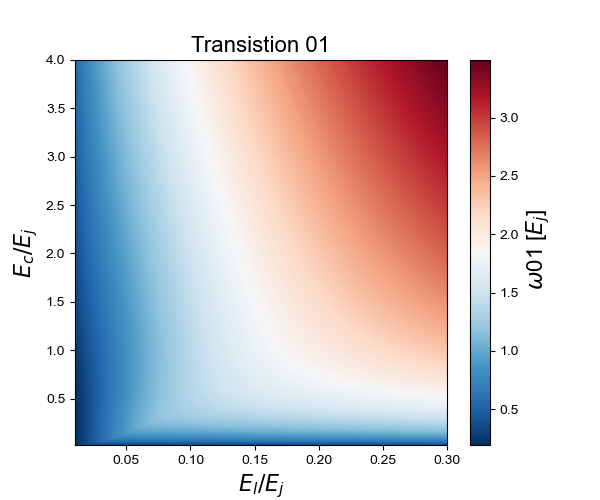

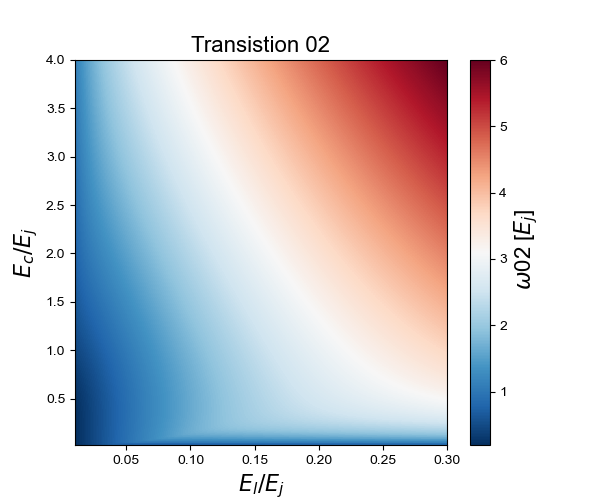

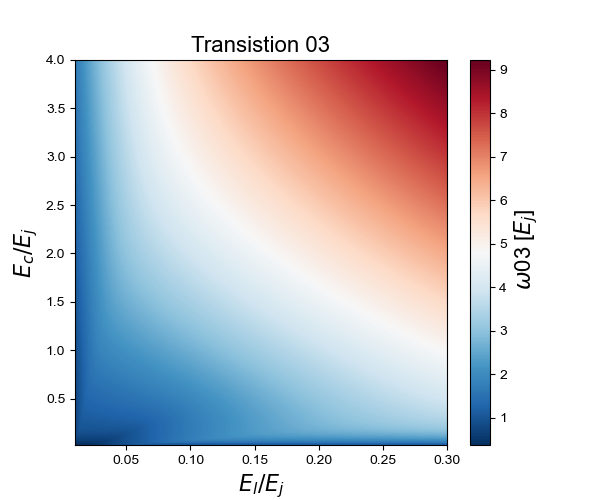

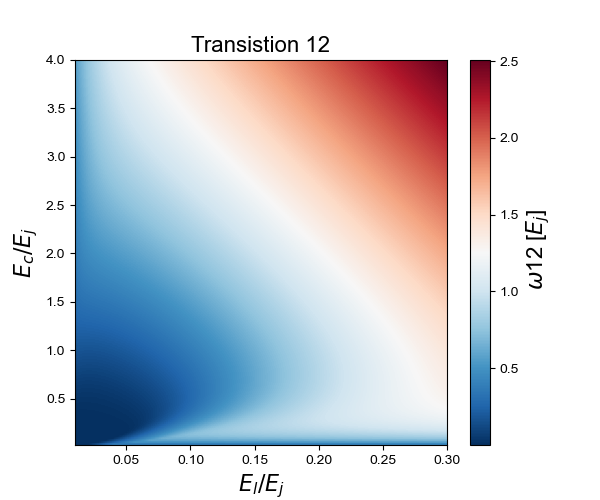

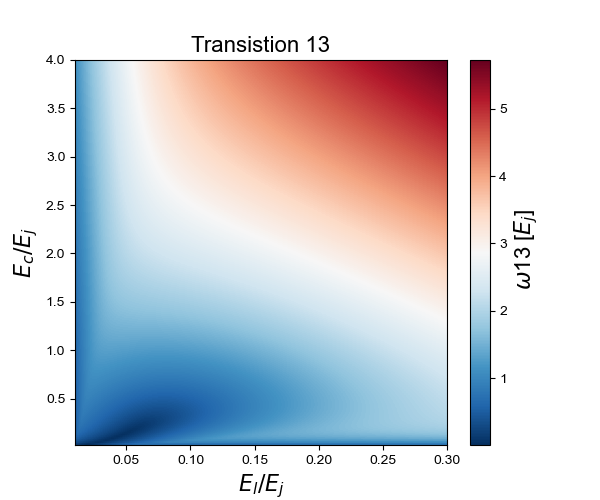

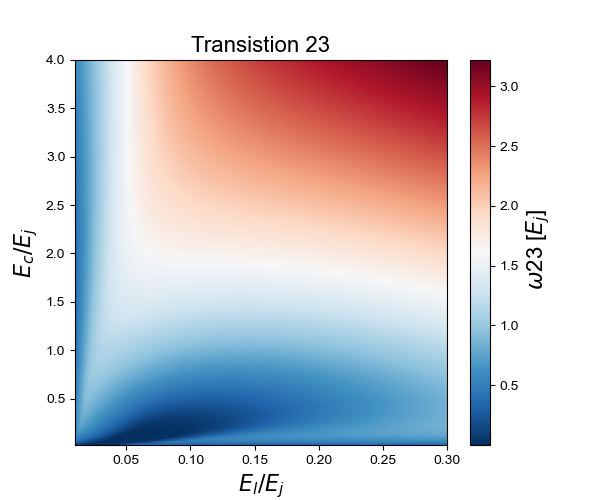

In [25]:
# List_transistions_plot = ['01','02','03','04','05','12','13','14','15','23','24','25','34','35','45']
List_transistions_plot = ['01','02','03','12','13','23']

for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = np.array(Energy_transistions[t]).reshape((len(Ecs), len(Els)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')
    fig.colorbar(pos, ax=ax1, label = r' $\omega $' +t+ r' [$E_j$]')
    ax1.set_title('Transistion ' + t)
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    # fig1.savefig('Plots/Trans'+t+'.png')
    # fig1.savefig('Plots/Trans'+t+'.svg')    

# Plotting Phase element matrix maps

In [ ]:
# List_transistions_plot = ['01','02','03','04','05','12','13','14','15','23','24','25','34','35','45']
List_transistions_plot = ['01','02','03','12','13','23']

for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    Elem_mat_to_plot = (np.array(Element_matrix_transistions[t])).reshape((len(Ecs), len(Els)))
    pos = ax1.imshow(Elem_mat_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')

    fig.colorbar(pos, ax=ax1)
    ax1.set_title('Phase element matrix ' + t)
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    # fig1.savefig('Plots/Phase_matrix'+t+'.png')
    # fig1.savefig('Plots/Phase_matrix'+t+'.svg')    

# Plotting Anharmonicity maps

In [ ]:
List_transistions_plot = ['01','02','03',
                     '12','13',
                     '23']
transistion_in_question  = '01'
for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = np.array(Energy_transistions[t]) -  np.array(Energy_transistions[transistion_in_question]) 
    transistion_to_plot = transistion_to_plot.reshape((len(Ecs), len(Els)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')
    fig.colorbar(pos, ax=ax1, label = r' $\omega $' +t+ r' - $\omega$ '+transistion_in_question+' [$E_j$]')
    ax1.set_title('Anharmonicity ' + t)
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    # fig1.savefig('Plots/Anharmonicity'+transistion_in_question+'_'+t+'.png')
    # fig1.savefig('Plots/Anharmonicity'+transistion_in_question+'_'+t+'.svg')    

## Save Data

In [ ]:
# Element_matrix_transistions['Els'] = Els
# Element_matrix_transistions['Ecs'] = Ecs
# Energy_transistions['Els'] = Els
# Energy_transistions['Ecs'] = Ecs

In [ ]:
# import pickle

# with open('Energy_data.pkl', 'wb') as fp:
#     pickle.dump(Energy_transistions, fp)
# with open('Element_matrix.pkl', 'wb') as fp:
#     pickle.dump(Element_matrix_transistions, fp)

Load Data

In [ ]:
# with open('Energy_data.pkl', 'rb') as fp:
#     Trydata_E = pickle.load(fp)
# with open('Element_matrix.pkl', 'rb') as fp:
#     Trydata_M = pickle.load(fp)


# Calculate second derivative of transistions

To Calculate the sweetness on the integer flux of the different transistion what we do is that we want to calculate $ \frac{\partial^2 \omega_{nm}}{\partial \Phi_{ext}^2}$ at integer flux. So we diagonalise our Hamiltonian at $\Phi_{ext} = 0$ and $\Phi_{ext}= \pm h$ with h is a small number.

then we take the second derivative as  :
$$ \frac{\omega_{mn}(h) + \omega_{mn}(-h) - 2\omega_{mn}(0)}{h^2}$$ 

In [ ]:
import pickle
h = 0.01

with open('Energy_sweetness'+str(h)+'.pkl', 'rb') as fp:
    Energy_sweetness = pickle.load(fp)

Els = Energy_sweetness['Els']
Ecs = Energy_sweetness['Ecs']


In [ ]:
# h = 1e-2
# Els = np.linspace(0.01, 0.3, 200)
# Ecs = np.linspace(0.02,   4, 200)
# N_cutoff = 50
# List_transistions = ['01','02','03','04','05','06','07','08',
#                      '12','13','14','15','16','17','18',
#                      '23','24','25','26','27','28',
#                      '34','35','36','37','38',
#                      '45','46','47','48',
#                      '56','57','58',
#                      '67','68',
#                      '78'] 

# Energy_sweetness = {}

# for t in List_transistions : 
#     Energy_sweetness[t] = []
# for index_ec,ec in tqdm(enumerate(Ecs)): 
#     for index_el, el in enumerate(Els):
#         fluxonium = Fluxonium(Ej=1, Ec=ec, El=el, phi_ext=0, cutoff=N_cutoff)
#         eigen_energy0,_ = fluxonium.diago()
#         fluxonium = Fluxonium(Ej=1, Ec=ec, El=el, phi_ext=h, cutoff=N_cutoff)
#         eigen_energyp,_ = fluxonium.diago()
#         fluxonium = Fluxonium(Ej=1, Ec=ec, El=el, phi_ext=-h, cutoff=N_cutoff)
#         eigen_energym,_ = fluxonium.diago()
#         for t in List_transistions :
#             omega0 = (eigen_energy0[int(t[1])] - eigen_energy0[int(t[0])])
#             omegap = (eigen_energyp[int(t[1])] - eigen_energyp[int(t[0])])
#             omegam = (eigen_energym[int(t[1])] - eigen_energym[int(t[0])])
#             Energy_sweetness[t].append((omegam+omegap-2*omega0)/h**2)


In [ ]:
# Energy_sweetness['Els'] = Els
# Energy_sweetness['Ecs'] = Ecs
# Energy_sweetness['h'] = h

# with open('Energy_sweetness'+str(h)+'.pkl', 'wb') as fp:
#     pickle.dump(Energy_transistions, fp)

# Plotting second derivative maps

In [ ]:
List_transistions_plot = ['01','02','03','12','13','23']

for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = np.array(Energy_sweetness[t]).reshape((len(Ecs), len(Els))) *h**2
    pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')
    fig.colorbar(pos, ax=ax1, label = r' $\partial_{\Phi_{ext}}^2 \omega $' +t+ r' [$E_j $]')
    ax1.set_title('Second derivative ' + t + ', h = ' + str(h))
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
#     fig1.savefig('Plots/SDTrans'+t+'.png')
#     fig1.savefig('Plots/SDTrans'+t+'.svg')    

# Diagram verification

## Plot Fluxon and no fluxon 

let's go to a flux next to the integer flux and then calculate the som of the absolute value of the self element matrix of all the states from 0 to 9 and then we plot this sum over the map with Ec/Ej and El/Ej.


$$ \Sigma_{i=0}^9 \lvert<i~ \lvert ~\varphi ~\rvert~ i>\rvert $$ 

In [ ]:
# import pickle
with open('Self_Element_matrix.pkl', 'rb') as fp:
    Self_Element_matrix = pickle.load(fp)
Els = Self_Element_matrix['Els']
Ecs = Self_Element_matrix['Ecs']
external_flux = 0.01


In [ ]:
# Els = np.linspace(0.01, 0.3, 200)
# Ecs = np.linspace(0.02,   4, 200)
# N_cutoff = 150
# external_flux = 0.01


# List_transistions = ['00','11','22','33','44','55','66','77','88','99']

# Self_Element_matrix= {}
# Self_Element_matrix['Sum'] = []
# for t in List_transistions : 
#     Self_Element_matrix[t] = []
# for index_ec,ec in tqdm(enumerate(Ecs)): 
#     for index_el, el in enumerate(Els):
#         fluxonium = Fluxonium(Ej=1, Ec=ec, El=el, phi_ext=external_flux, cutoff=N_cutoff)
#         mat_elem = fluxonium.matrix_element('phase')
#         summ = 0
#         for t in List_transistions :
#             elem = np.abs(mat_elem[int(t[0])][int(t[1])])
#             Self_Element_matrix[t].append(elem)
#             summ +=elem
#         Self_Element_matrix['Sum'].append(summ)

In [ ]:
# Self_Element_matrix['Els'] = Els
# Self_Element_matrix['Ecs'] = Ecs

# with open('Self_Element_matrix.pkl', 'wb') as fp:
#     pickle.dump(Self_Element_matrix, fp)

In [ ]:
fig1, ax1 = plt.subplots(1,1,figsize = (10,8))
Elem_mat_to_plot = (np.array(Self_Element_matrix['Sum'])).reshape((len(Ecs), len(Els))) - np.min(Self_Element_matrix['Sum'])
pos = ax1.imshow(Elem_mat_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower', vmin = 0, vmax = 3)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Sum Phase element matrix at external flux = '+str(external_flux))
ax1.set_ylabel(r'$E_c/E_j$')
ax1.set_xlabel(r'$E_l/E_j$')

ax1.set_xlim((Els[0],Els[-1]))
ax1.set_ylim((Ecs[0], Ecs[-1]))
ax1.plot(np.linspace(0.005,0.217,200), Fluxon_condition,'black', label ="Analytic Fluxon condition")
ax1.legend()

fig1.savefig('Plots/Sum_self_Phase_matrix_'+str(external_flux)+'.png')
# fig1.savefig('Plots/Sum_self_Phase_matrix_'+str(external_flux)+'.svg')

In [ ]:
# List_transistions = ['00','11','22','33','44','55','66','77','88','99']


# for t in List_transistions : 
#     fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
#     Elem_mat_to_plot = (np.array(Self_Element_matrix[t])).reshape((len(Ecs), len(Els)))
#     pos = ax1.imshow(Elem_mat_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')
#     fig.colorbar(pos, ax=ax1)
#     ax1.set_title('Phase element matrix ' + t)
#     ax1.set_ylabel(r'$E_c/E_j$')
#     ax1.set_xlabel(r'$E_l/E_j$')
#     fig1.savefig('Plots/self_Phase_matrix'+t+'.png')
#     fig1.savefig('Plots/self_Phase_matrix'+t+'.svg')    

## Correction of plasmon fluxon crossing condtion 

Instead of taking the plasma frequency as $\sqrt{8Ec\partial_\varphi^2V}$ we try to change the prefactor in the square root, we take $\sqrt{3Ec\partial_\varphi^2V}$ and this one work best.

In [ ]:
Els = np.linspace(0.005,0.217,200)
FLP_condition = (hauteur1-hauteur2)**2 / (8*(Els+1))
FLP_condition_bis = (hauteur1-hauteur2)**2 / (3*(Els+1))

argmax = np.argmin(np.abs(Fluxon_condition-FLP_condition))
argmax_bis = np.argmin(np.abs(Fluxon_condition-FLP_condition_bis))



List_transistions_plot = ['01','12','03']

for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    Elem_mat_to_plot = (np.array(Element_matrix_transistions[t])).reshape((len(Ecs), len(Els)))
    pos = ax1.imshow(Elem_mat_to_plot,extent = [Els[0],Els[-1], Ecs[0], Ecs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')
    ax1.plot(Els[:argmax_bis],FLP_condition_bis[:argmax_bis], color = 'red',label = r'With $\sqrt{3Ec\partial_\varphi^2V} $')
    ax1.plot(Els[:argmax],FLP_condition[:argmax], label =  r'With $\sqrt{8Ec\partial_\varphi^2V} $')

    fig.colorbar(pos, ax=ax1)
    ax1.set_title('Phase element matrix ' + t)
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    ax1.set_xlim(0.005,None)
    ax1.set_ylim(0.02,None)
    ax1.legend()

 Looking at the element matrix and sweetness and energy transistion with El/Ej and Ec/Ej is good, but this simulation is still lacking the estimation of coherence time T1 and Tphi. So in the following part of the notebook we will look into T1 and then Tphi.


# $\Gamma_1$ : Relaxation and excitation

We took the formulas and values from the paper of [Smith el al.](https://www.nature.com/articles/s41534-019-0231-2), The detailed formulas of the quality factors is from the [supplementary materials](https://www.nature.com/articles/s41534-019-0231-2#Sec13) of the paper. 

Attention, in smith paper they consider T1 is only due to relaxation thus they take the some of the negative frequency and positive frequency parts of the density of noise, then they take the absolute value of the frequency in the last formula. 
Thus we have taken their formula but we have recalculated the normal density of noise, based on [Clerke paper](https://arxiv.org/pdf/0810.4729.pdf). To be able to calculate the rate of excitation and the rate of relaxation separetly.

In [12]:
import scipy.special as ss  # For Modified Bessel function of the second kind of first order

def JJ_tunneling(Ej):
    return Ej
def capa(Ec):
    return cst.e**2/(2*Ec)
def ind(El): 
    return phiq**2/El

Smith_values = {'Capacitive' : {'Q_fac' : 1e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 0.3*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'}}

Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'}}

def Smith_spectral_noise_denisty(loss_mechanism, Smith_values, Temperature, fluxonium, **kwargs) : 
    """""""""""""""
    A function that return the density of noise of different mechanisms of losses for different frequencies 
    inputs : 
        - loss_mechanism : a string that specify the mechanism of loss
        - Smith_values : a dictionnary that contains the values from Smith et al. paper considering quality factors, noise operators..
        - Temperature : a float that determine the temperature in kelvin
        - fluxonium : an object that can used to compute the transistions we need
        - **kwargs : should be a dictionnary that contain a key 'omega' and inside there is the transitions energy we need to use. if not given it will by default consider the transistion 01 of the given fluxonium.
    output : 
        - array of the spectral noise density for the specified requirements.
    """"""""""""""" 
    if 'omega'in kwargs : 
        w_ij = kwargs['omega']
    else : 
        eigen_energy, eigen_values = fluxonium.diago()
        w_ij = (eigen_energy[1] - eigen_energy[0])*2*np.pi*1e9
    if 'non_symetric_density' in kwargs : 
        pass
    else :
        kwargs['non_symetric_density'] = 0
    if loss_mechanism == 'Capacitive': 
        Q_capa = (Smith_values['Capacitive']['Q_fac']*(2*np.pi*6*1e9/np.abs(w_ij))**0.7)
        Noise_density = 2*cst.hbar*np.tanh(cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature))**-1/(Q_capa * (capa(fluxonium.get_Ec()*1e9*cst.h))) /(1+(kwargs['non_symetric_density']*np.exp(-(cst.hbar*w_ij)/(cst.k*Temperature))))
    elif loss_mechanism == 'Inductive': 
        Q_ind = (Smith_values['Inductive']['Q_fac'])*(np.sinh(cst.h*0.5*1e9/(2*cst.k*Temperature))*ss.kn(0,cst.h*0.5*1e9/(2*cst.k*Temperature)))/(np.sinh(cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature))*ss.kn(0,cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature)))
        Noise_density = 2*cst.hbar*(np.tanh(cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature)))**-1/(Q_ind* ind(fluxonium.get_El()*1e9*cst.h))/(1+(kwargs['non_symetric_density']*np.exp(-(cst.hbar*w_ij)/(cst.k*Temperature))))
    elif loss_mechanism =='Quasiparticle' :
        Admittance = np.sqrt(2/np.pi) * ( 8 * JJ_tunneling(fluxonium.get_Ej()*1e9*cst.h) /((cst.h/cst.e**2)*Smith_values['Quasiparticle']['SC_gap'])) * (2*Smith_values['Quasiparticle']['SC_gap']/(cst.hbar*np.abs(w_ij)))**(3/2) * (1/Smith_values['Quasiparticle']['Q_fac']) *np.sqrt(cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature)) * ss.kn(0, cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature)) * np.sinh(cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature))   
        Noise_density = 2*cst.hbar*np.abs(w_ij) *np.real(Admittance)* np.tanh(cst.hbar*np.abs(w_ij)/(2*cst.k*Temperature))**-1  /(1+(kwargs['non_symetric_density']*np.exp(-(cst.hbar*w_ij)/(cst.k*Temperature))))
    return Noise_density

In [13]:
# Smith_spectral_noise_denisty('Capacitive',Smith_values, 100e-3 , fluxonium, 0,1, **{'omega': Omegas})

## Maybe non meaningful noise density plot?

In [14]:
fluxonium = Fluxonium(Ej=1, Ec=1, El =1, phi_ext= 0, cutoff=50)
T=20e-3 # Temperature 100mK

Omegas = np.linspace(-2e9, 2e9, 200)*2*np.pi
Temperature = 20e-3
Capacitive_density_noise  =  Smith_spectral_noise_denisty('Capacitive',Smith_values, Temperature , fluxonium , **{'omega': Omegas,  'non_symetric_density' : 1})
Inductive_density_noise   =  Smith_spectral_noise_denisty('Inductive',Smith_values, Temperature , fluxonium , **{'omega': Omegas, 'non_symetric_density' : 1})
Qp_density_noise          =  Smith_spectral_noise_denisty('Quasiparticle',Smith_values, Temperature , fluxonium , **{'omega': Omegas, 'non_symetric_density' : 1})

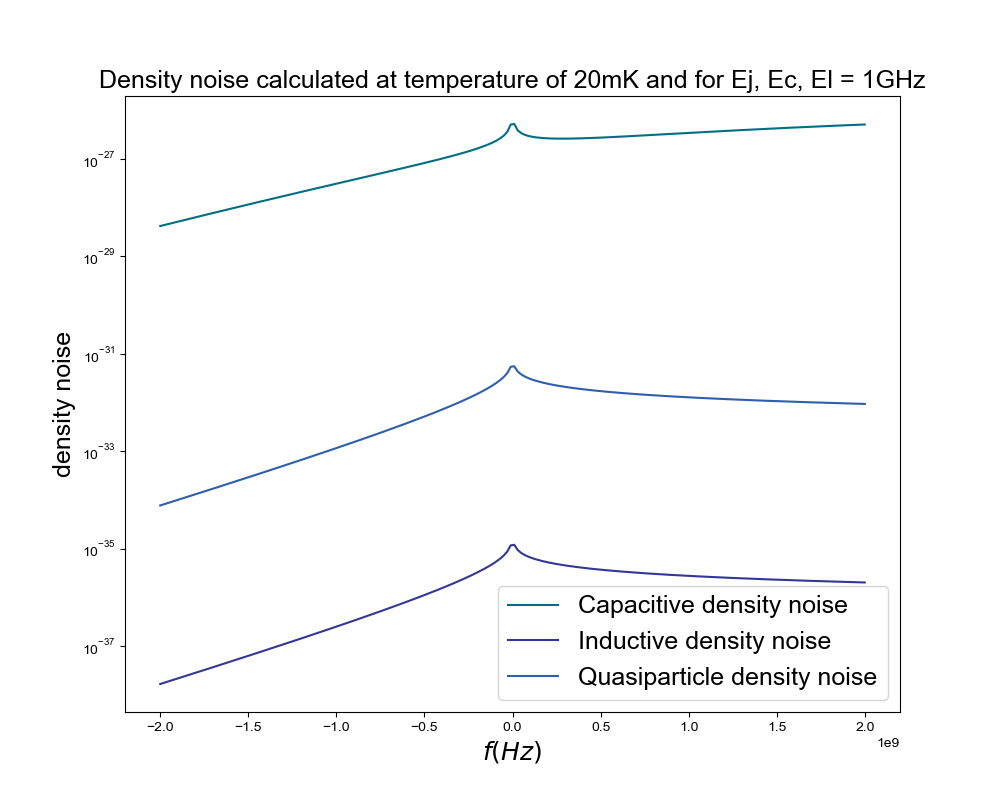

In [15]:
fig1, ax1 = plt.subplots(1,1,figsize = (10,8))
Omegas = Omegas /(2*np.pi)
ax1.plot(Omegas, Capacitive_density_noise, label ='Capacitive density noise')
ax1.plot(Omegas, Inductive_density_noise, label ='Inductive density noise')
ax1.plot(Omegas, Qp_density_noise, label ='Quasiparticle density noise')

ax1.set_title('Density noise calculated at temperature of {:.0f}mK and for Ej, Ec, El = 1GHz'.format(Temperature*1e3))

# ax1.set_xscale('log')
ax1.set_xlabel(r'$ f (Hz)$')
ax1.set_ylabel('density noise')
ax1.set_yscale('log')

ax1.legend()


## Smith Gamma

In [16]:
def Smith_Gamma(loss_mechanism, Smith_values, Temperature, fluxonium, row_indices, column_indices , **kwargs):
    """""""""""""""
    A function that return the Gamma matrix of given list of transition in Hz
    in the matrix it will be like Gamma_ij so it is the rate of 'relaxation' or ('exitation' in case the energy levels are from lowest to highest) from the level i to j. i correspond the column number, and j to the row number.
    
    inputs : 
        - loss_mechanism : a string that specify the mechanism of loss
        - Smith_values : a dictionnary that contains the values from Smith et al. paper considering quality factors, noise operators..
        - Temperature : a float that determine the temperature in kelvin
        - fluxonium : an object that can used to compute the transistions we need
        - row_indices : a list of indices that determine the rows of the Gamma matrix rows, this numbers correspond to the different levels in the system
        - column_indices : a list of indices that determine the rows of the Gamma matrix rows, this numbers correspond to the different levels in the system
        - **kwargs : if in the future we need to change something.
        
    output : 
        - a 2d array of the different gammas between the different transistions
    """""""""""""""
    Transitions_energies, Element_matrices = fluxonium.energies_and_elementsmatrix(Smith_values[loss_mechanism]['Noise_operator'],row_indices,column_indices) 
    Spec_noise_density = Smith_spectral_noise_denisty(loss_mechanism, Smith_values, Temperature, fluxonium, **{'omega' : Transitions_energies* 2 * np.pi* 1e9}, **kwargs)
    Gamma =  np.multiply(Spec_noise_density, np.abs(Element_matrices)**2)/cst.hbar**2
    return Gamma

In [17]:
Temperature = 100e-3
row_indices = [0,1,2,3,4,5]
column_indices = [0,1,2,3,4,5]
# row_indices = [0,1,2]
# column_indices = [0,1,2]

ej = 5.74
ec = 1.62
el = 0.16

fluxonium = Fluxonium(Ej=ej, Ec=ec, El = el, phi_ext= 0, cutoff=50)

Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})

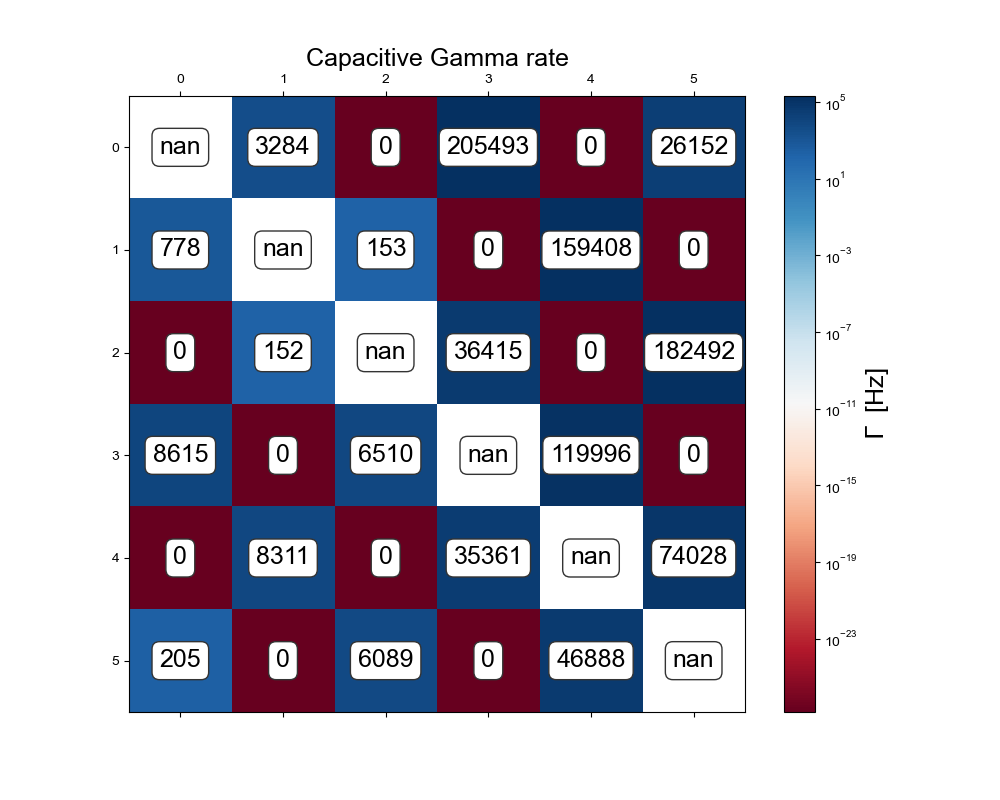

In [18]:
figure, ax1 = plt.subplots(1,1,figsize = (10,8))
cax1= ax1.matshow(Gamma_Capacitive_mat, interpolation ='nearest', norm=mpl.colors.LogNorm(), cmap = 'RdBu', origin = 'upper')

figure.colorbar(cax1, label = r'$\Gamma$  [Hz]')
 
# ax1.set_xticklabels(['']+column_indices )
# ax1.set_yticklabels(['']+row_indices)
ax1.set_title('Capacitive Gamma rate') 

for (i, j), z in np.ndenumerate(Gamma_Capacitive_mat):
    ax1.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.2'))

In [19]:
Gamma_Capacitive_mat[1,2]

153.30991628451832

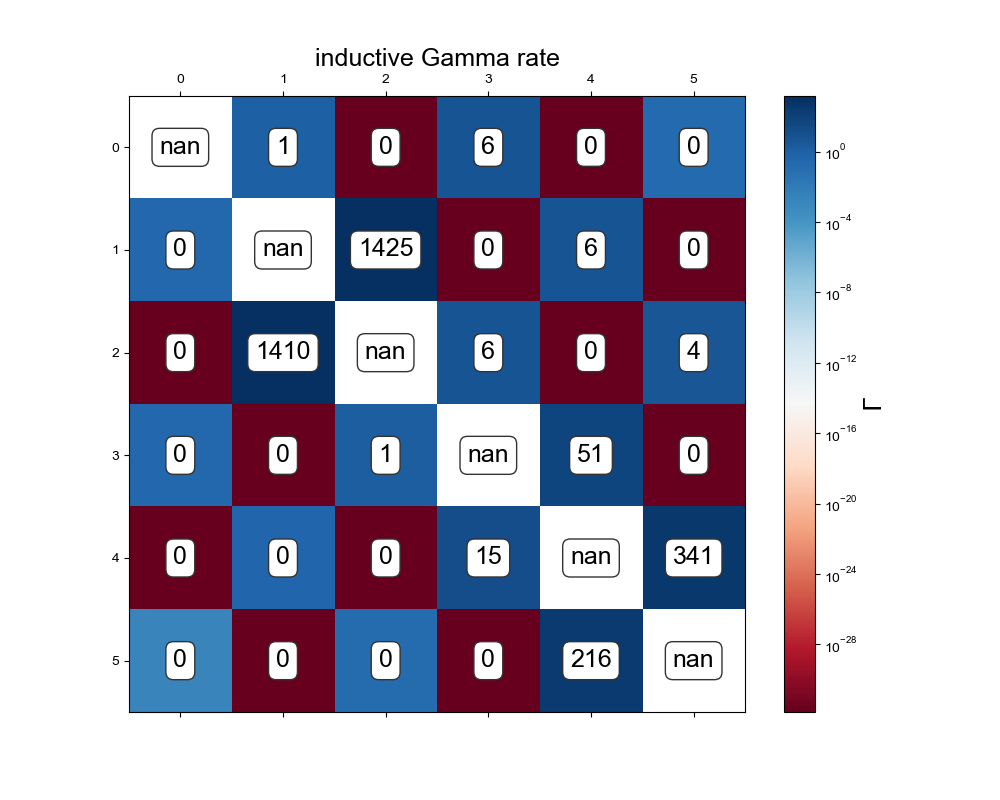

In [20]:
figure, ax1 = plt.subplots(1,1,figsize = (10,8))
cax1= ax1.matshow(Gamma_Inductive_mat, interpolation ='nearest', norm=mpl.colors.LogNorm(), cmap = 'RdBu', origin = 'upper')

figure.colorbar(cax1, label = r'$\Gamma$')
ax1.set_title('inductive Gamma rate')
# ax1.set_xticklabels(['']+column_indices )
# ax1.set_yticklabels(['']+row_indices)

for (i, j), z in np.ndenumerate(Gamma_Inductive_mat):
    ax1.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.2'))

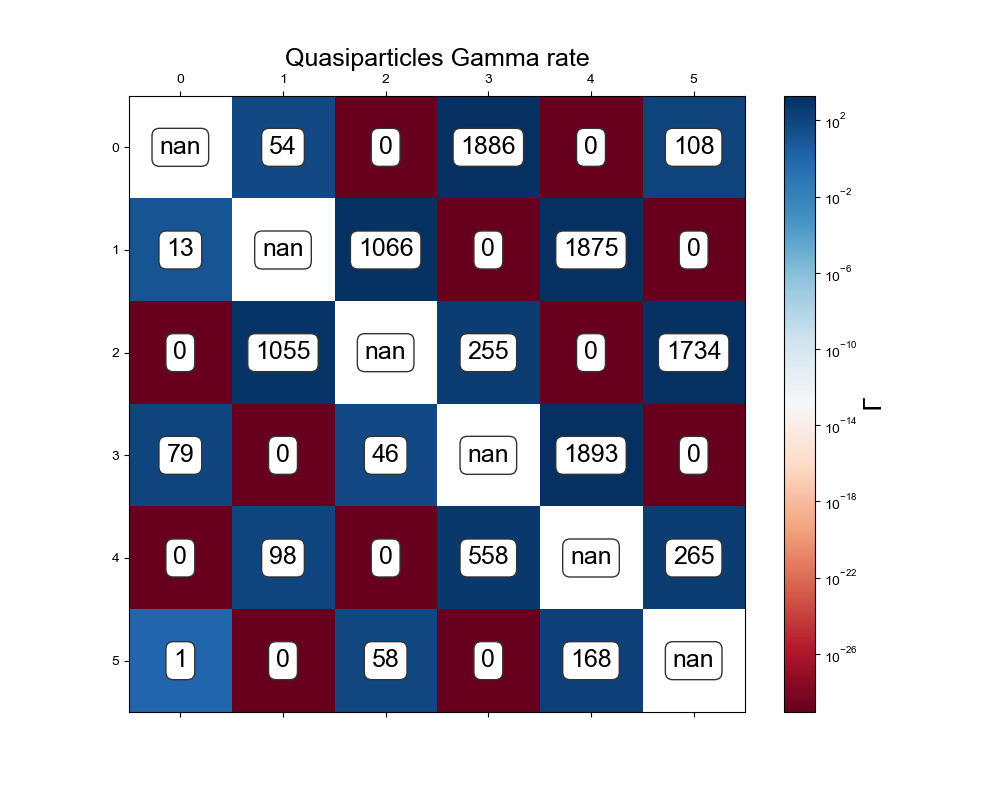

In [21]:
figure, ax1 = plt.subplots(1,1,figsize = (10,8))
cax1= ax1.matshow(Gamma_Qp_mat, interpolation ='nearest', norm=mpl.colors.LogNorm(), cmap = 'RdBu', origin = 'upper')

figure.colorbar(cax1, label = r'$\Gamma$')
ax1.set_title('Quasiparticles Gamma rate')
# ax1.set_xticklabels(['']+column_indices )
# ax1.set_yticklabels(['']+row_indices)

for (i, j), z in np.ndenumerate(Gamma_Qp_mat):
    ax1.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.2'))

#  Effective $T_1$

Now we take the master equation

$$ \frac{dP_i}{dt} = - \Sigma_j \Gamma_{i \to j} P_i + \Sigma_j \Gamma_{j \to i} P_j ~~~~~~ \forall i \in [0,N]$$

With $N$ is the higher included state in the calculation, here we include the first 6 states.

In [22]:
def Population_matrix(Gamma_matrix, State_indices = [0,1,2]) : 
    """""""""""""""
    Function that return a Matrix to map the state probability probleme.
    The matrix is written in the basis of the probability vector (P0,P1,P2,...) where Pi is the probability to be in the state i.
    The matrix map the problem given by the formula above.
    
    input : 
        - Gamma_matrix : 2D numpy array or 'matrix of relaxation(excitation) rates between the different states'
        - State_indices : a 1D list of the included states for which we calculate the matrix, what is recomended is to always include the first 3 states
    output: 
        - 2D numpy array.
    """""""""""""""
    A_matrix = np.zeros((len(State_indices), len(State_indices)))
    diag_matrix = np.zeros((len(State_indices)))
    Gamma_matrix = Gamma_matrix[State_indices[0]: State_indices[-1]+1,State_indices[0]: State_indices[-1]+1]
    for c in State_indices : 
        diag_matrix[c]  = - np.nansum(Gamma_matrix[:,c])
    for i in State_indices : 
        for j in State_indices :
            if i == j :
                A_matrix[i, j] = diag_matrix[i]
            else : 
                A_matrix[i, j] = Gamma_matrix[i,j]
    return A_matrix

## Part 1 : Thermal state 

In [23]:
# Let's consider Grenoble fluxonium V4
fluxonium = Fluxonium(Ej=5.74, Ec=1.6, El = 0.160, phi_ext= 0.45, cutoff=100)
Temperature = 77e-3
row_indices = [0,1,2,3,4,5]
column_indices = [0,1,2,3,4,5]
Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})


Gamma_tot = Gamma_Qp_mat+Gamma_Inductive_mat+Gamma_Capacitive_mat # there is more to add


In [24]:
State_indices = [0,1,2,3,4,5]
A = Population_matrix(Gamma_tot,State_indices)

Thermal_matrix = np.append(A,np.ones(len(State_indices))).reshape((len(State_indices)+1, len(State_indices)))
Thermal_cond = np.zeros(len(State_indices)+1)
Thermal_cond[-1] = 1
Thermal_state = np.linalg.pinv(Thermal_matrix) @ Thermal_cond

array([53.1631495 , 42.87014234,  1.54900024,  1.1353765 ,  0.84567523,
        0.43665619])
'Grenoble Fluxonium at half flux'


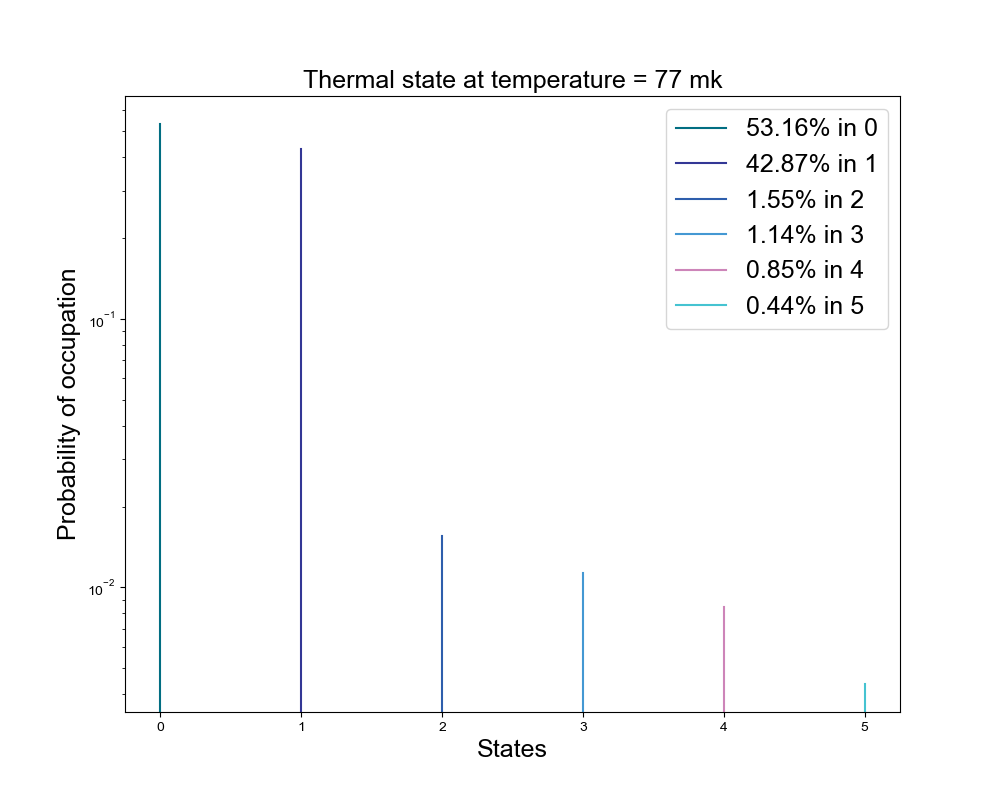

In [25]:
figure, ax1 = plt.subplots(1,1,figsize = (10,8))
for i in State_indices : 
    lab = '{:.2f}% in {:.0f}'.format(Thermal_state[i]*1e2, i)
    ax1.plot([i,i], [0, Thermal_state[i]], label = lab )
pp.pprint(Thermal_state*100)
ax1.set_yscale('log')
ax1.set_title('Thermal state at temperature = {:.0f} mk'.format(Temperature*1e3))
ax1.set_ylabel('Probability of occupation')
ax1.set_xlabel('States')
ax1.legend()
pp.pprint('Grenoble Fluxonium at half flux')

## Part 2 : Time Solution and calculation of effective T1 

In [26]:
A = Population_matrix(Gamma_tot,State_indices)
Taus= np.linspace(0, 1e-2, 100)
Initial_condition = np.array([0,1,0,0,0,0])

C_vec = -np.dot(A,Thermal_state)
for c in State_indices:
    A[c,1:]  -= A[c,0] 
omega_A, Eig_A = np.linalg.eigh(A)
Prob_Time_solution = np.zeros((len(Taus), len(Initial_condition)))
for index_tau, tau in enumerate(Taus) : 
    sol = np.dot(Eig_A, Initial_condition- Thermal_state)
    sol = np.dot(lin.expm(np.diag(omega_A)* tau) , sol)
    sol = np.dot(np.linalg.inv(Eig_A),sol)
    Prob_Time_solution[index_tau,:] = sol +Thermal_state

#Quentin's solution
# for index_tau, tau in enumerate(Taus) : 
#     expA = lin.expm(np.diag(omega_A)*tau)
#     Prob_Time_solution[index_tau,:] = np.dot(expA,Initial_condition) + np.dot(lin.inv(Eig_A), np.dot((expA+np.diag(np.ones(len(omega_A)))), C_vec))
# def func(P,Taus, A) : 
#     return np.dot(P, A)
# Prob_Time_solution = sint.odeint(func,Initial_condition,Taus, args = (A,))

In [27]:
print(np.min(-omega_A)**-1*1e3)

0.16689809221407428


'Grenoble Fluxonium at half flux'


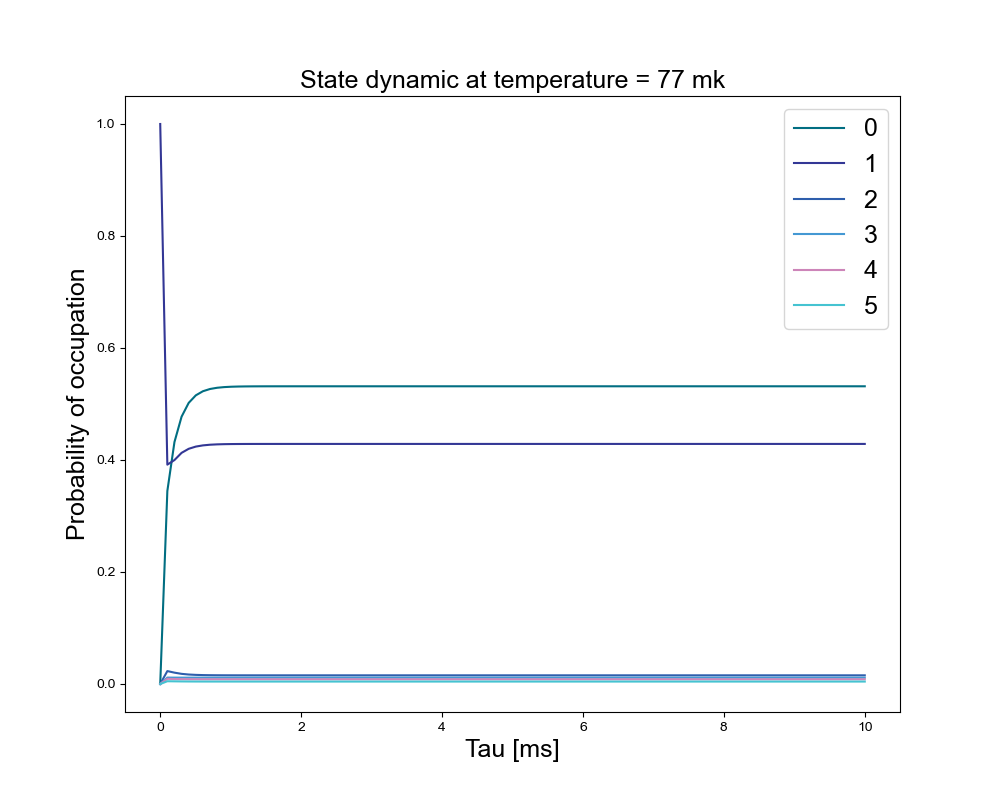

In [28]:
figure, ax1 = plt.subplots(1,1,figsize = (10,8))
for i in State_indices : 
    ax1.plot(Taus*1e3, Prob_Time_solution[:, i], label = str(i)) 
    
#ax1.set_xscale('log')
ax1.set_title('State dynamic at temperature = {:.0f} mk'.format(Temperature*1e3))
ax1.set_ylabel('Probability of occupation')
ax1.set_xlabel('Tau [ms]')
ax1.legend()
pp.pprint('Grenoble Fluxonium at half flux')
    
ax1.legend()


## Combinnig the two part together

In [48]:
# Ej = 5
# Ec_Ej = 0.2 # Ec/Ej
# El_Ej = 0.015 #El/Ej
# phi_ext = 0
# N_cut = 50
# Some protected regime ?
# Ej = 10
# Ec_Ej = 0.3 #Ec/Ej
# El_Ej = 0.02 # EL/Ej

Ej = 5.725
Ec = 1.582
El = 0.1627
phi_ext = 0
N_cut = 60
Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'}}


fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El = El, phi_ext= phi_ext, cutoff=N_cut)
Temperature = 30e-3
row_indices = [0,1,2,3,4,5,6,7,8,9]
column_indices = [0,1,2,3,4,5,6,7,8,9]
Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})


Gamma_tot = Gamma_Qp_mat+Gamma_Inductive_mat+Gamma_Capacitive_mat # there is more to add


State_indices = [0,1,2,3,4,5,6,7,8,9]
A = Population_matrix(Gamma_tot,State_indices)

Thermal_matrix = np.append(A,np.ones(len(State_indices))).reshape((len(State_indices)+1, len(State_indices)))
Thermal_cond = np.zeros(len(State_indices)+1)
Thermal_cond[-1] = 1
Thermal_state = np.linalg.pinv(Thermal_matrix) @ Thermal_cond


A = Population_matrix(Gamma_tot,State_indices)
Taus= np.linspace(0, 100e-4, 100)
Initial_condition = np.zeros(len(State_indices))
Initial_condition[1] = 1
# Initial_condition[0], Initial_condition[1] =Thermal_state[1] ,Thermal_state[0] 
# for i in State_indices : 
#     if i != 0 and i!=1 :
#         Initial_condition[i] = Thermal_state[i]
# Initial_condition[0] = 1

for c in State_indices:
    A[c,1:]  -= A[c,0] 
omega_A, Eig_A = np.linalg.eigh(A)

Prob_Time_solution = np.zeros((len(Taus), len(Initial_condition)))
for index_tau, tau in tqdm(enumerate(Taus)) : 
    sol = np.dot(Eig_A, Initial_condition- Thermal_state)
    sol = np.dot(lin.expm(np.diag(omega_A)* tau) , sol)
    sol = np.dot(np.linalg.inv(Eig_A),sol)
    Prob_Time_solution[index_tau,:] = sol +Thermal_state

T1_population = np.zeros(len(State_indices))
for i in tqdm(State_indices): 
    param_fit, pov = sci.curve_fit(T1_model, xdata = Taus*1e3, ydata = Prob_Time_solution[:,i])
    T1_population[i] = param_fit[0]

100it [00:00, 33447.40it/s]
  0%|                                                                                           | 0/10 [00:00<?, ?it/s]RuntimeWarning: overflow encountered in exp
 C:\Users\wael\AppData\Local\Temp\ipykernel_14408\2778255753.py: 11OptimizeWarning: Covariance of the parameters could not be estimated
100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1114.74it/s]


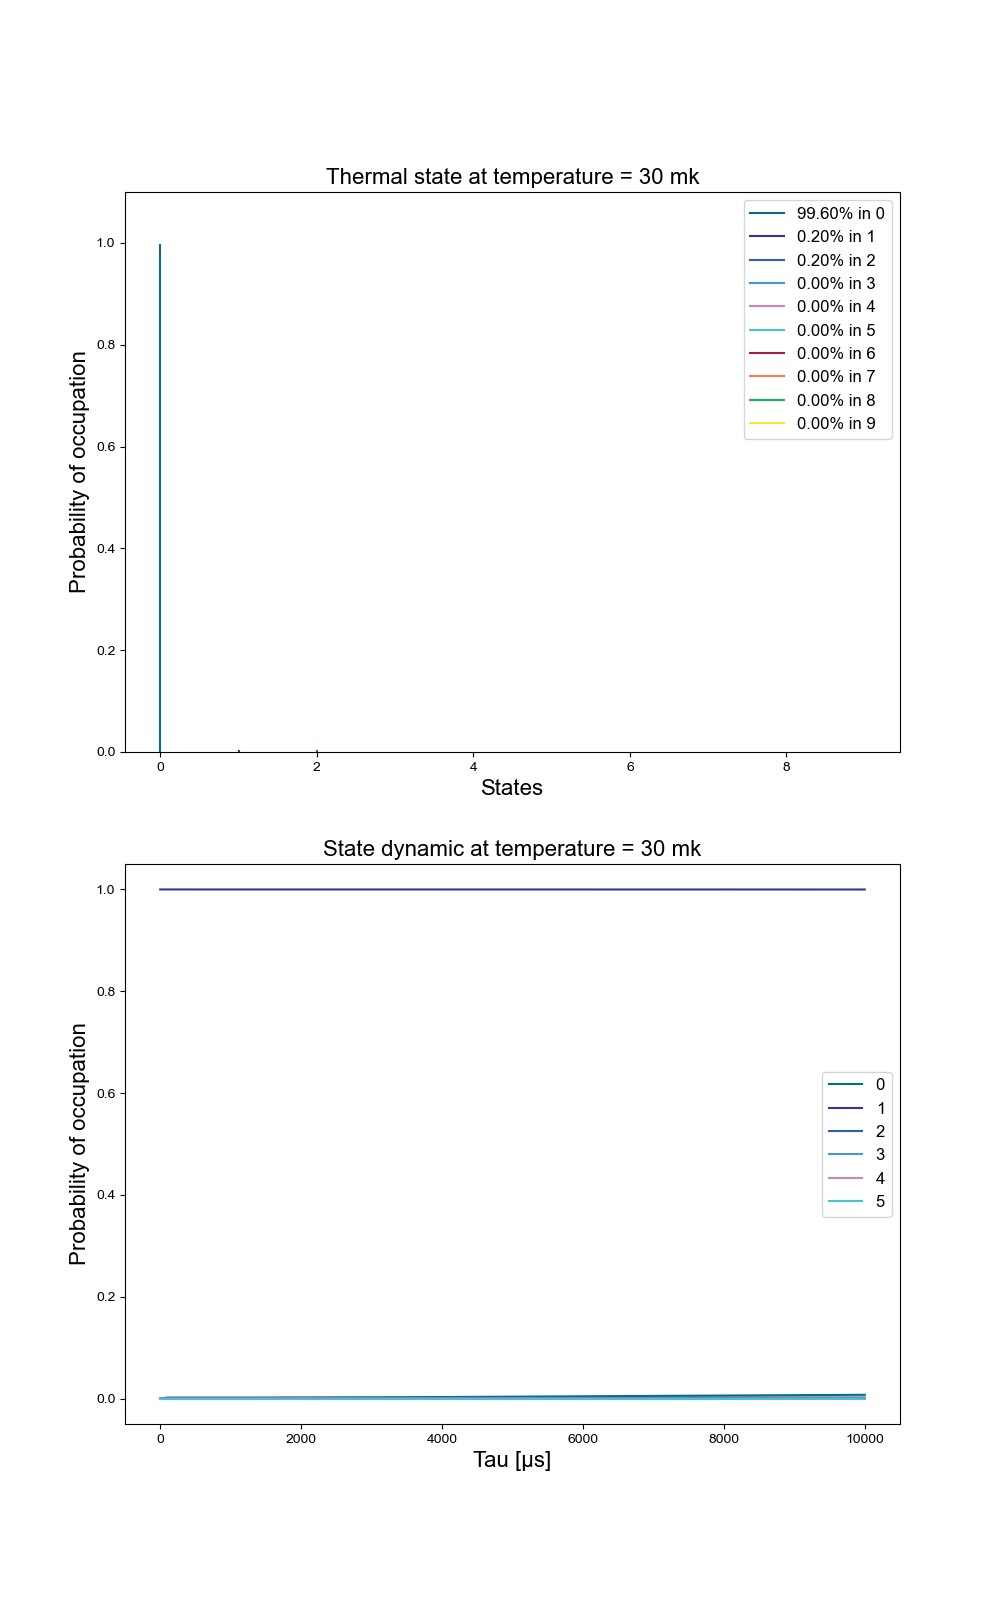

In [49]:
figure, (ax1,ax2) = plt.subplots(2,1,figsize = (10,8*2))
for i in State_indices : 
    lab = '{:.2f}% in {:.0f}'.format(Thermal_state[i]*1e2, i)
    ax1.plot([i,i], [0, Thermal_state[i]], label = lab )

# ax1.set_yscale('log')
ax1.set_title('Thermal state at temperature = {:.0f} mk'.format(Temperature*1e3))
ax1.set_ylabel('Probability of occupation')
ax1.set_xlabel('States')
ax1.legend()
ax1.set_ylim((0,1.1))


for i in [0,1,2,3,4,5] : 
    ax2.plot(Taus*1e6, Prob_Time_solution[:, i], label = str(i)) 
    
#ax1.set_xscale('log')
ax2.set_title('State dynamic at temperature = {:.0f} mk'.format(Temperature*1e3))
ax2.set_ylabel('Probability of occupation')
ax2.set_xlabel('Tau [µs]')
ax2.legend()
# ax2.set_xscale('log')
# pp.pprint('Grenoble Fluxonium at half flux')
    
ax2.legend()


In [50]:
print('The expected T1 for the 01 transition {:.2f}ms'.format(((Gamma_tot[1][0] + Gamma_tot[0][1])**-1 *1e6)*1e-3))
print('The T1 we get if we consider the other higher levels : {:.1f}µs'.format((T1_population[1]*1000)))

The expected T1 for the 01 transition 697.18ms
The T1 we get if we consider the other higher levels : 115035792.2µs


### Test if fit is valid 

[ 0.25946876 -0.74117624  0.745543  ]
[0.2682245  0.88222401 0.11789958]


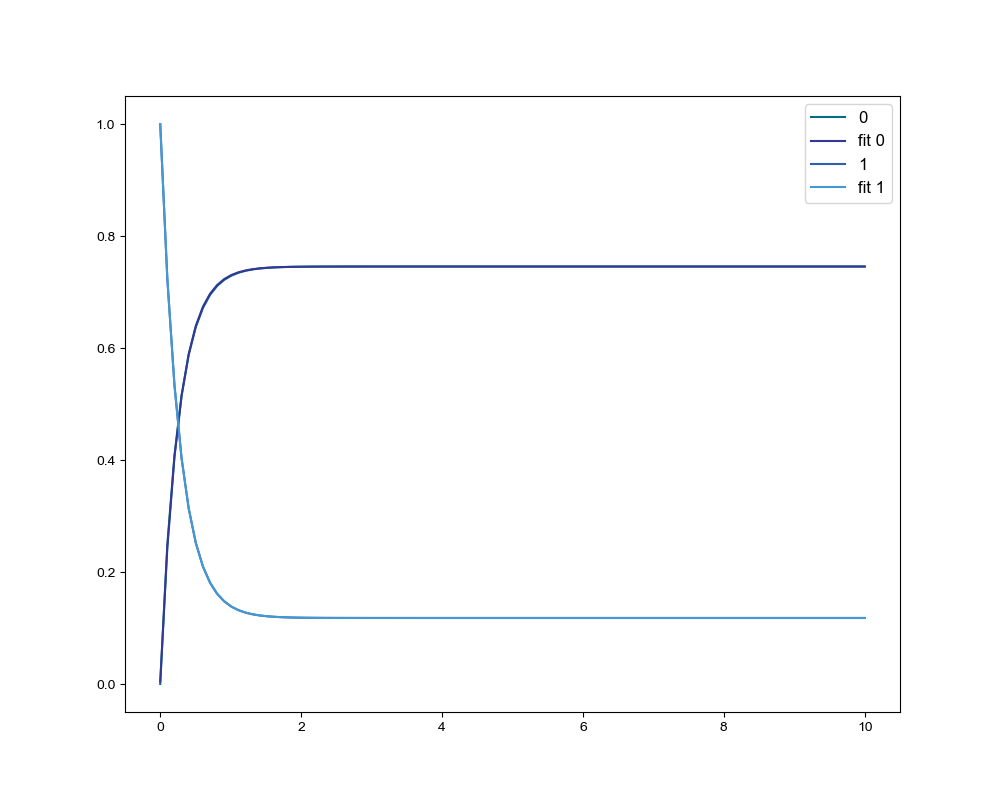

In [139]:
figure, (ax1) = plt.subplots(1,1,figsize = (10,8))

factor_normalisation_tau_for_fit = 1e3
for i in [0,1] : 
    ax1.plot(Taus*factor_normalisation_tau_for_fit, Prob_Time_solution[:, i], label = str(i)) 
    param_fit, pov = sci.curve_fit(T1_model, xdata = Taus*factor_normalisation_tau_for_fit, ydata = Prob_Time_solution[:,i])
    print(param_fit)
    ax1.plot(Taus*factor_normalisation_tau_for_fit,T1_model(Taus*factor_normalisation_tau_for_fit, param_fit[0], param_fit[1], param_fit[2]), label= 'fit {:.0f}'.format(i))
#ax1.plot(times*1e6, P1 )

ax1.legend()

# $T_\varphi$

Now we use SCqubits. If I understand correctly they have three methods to calculate [$T_\varphi$](https://scqubits.readthedocs.io/en/latest/guide/qubits/fluxonium.html) for a fluxonium qubit :
 - One is to directly calculate the dephasing due to 1/f critical current fluctuationin the smalll junction. [link](https://scqubits.readthedocs.io/en/latest/_generated/scqubits.Fluxonium.tphi_1_over_f_cc.html#scqubits.Fluxonium.tphi_1_over_f_cc)
 - One is to calculate the dephasing due to 1/f flux noise for the fluxonium. the flux noise is supposed to be around $10^{-6}\Phi_0$. [link](https://scqubits.readthedocs.io/en/latest/_generated/scqubits.Fluxonium.tphi_1_over_f_flux.html#scqubits.Fluxonium.tphi_1_over_f_flux)
 - One is to calculate dephasing due 1/f for arbitrari noise, that I didn't understand the difference between this one and the ones above. [link](https://scqubits.readthedocs.io/en/latest/_generated/scqubits.Fluxonium.tphi_1_over_f.html#scqubits.Fluxonium.tphi_1_over_f)
 
 If I understand correctly I can change the temperature and the noise amplitude. so I am going to create a dictionnary with a temperature of 100mK. and an amplitude of flux noise of $10^{-5}\Phi_0$.

In [179]:
Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {100e-3}}
# scq.set_units('GHz')

Fluxonium_params ={'Ej' : 20, 'Ec' : 1, 'El': 0.120, 'external_flux' : 0,  'cutoff' : 80} 
Scq_fluxonium = scq.Fluxonium(EJ = Fluxonium_params['Ej'],
                               EC = Fluxonium_params['Ec'],
                               EL = Fluxonium_params['El'],
                               flux = Fluxonium_params['external_flux'],
                               cutoff = Fluxonium_params['cutoff'])

Tphi_flux_01 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, T = Dephasing_noise_caracteristics['Temperature'], get_rate = False)
Tphi_cc_01 = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 0, j = 1, T = Dephasing_noise_caracteristics['Temperature'], get_rate = False)
Tphi_flux_12 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 1, j = 2, T = Dephasing_noise_caracteristics['Temperature'], get_rate = False)
Tphi_cc_12 = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 1, j = 2, T = Dephasing_noise_caracteristics['Temperature'], get_rate = False)

In [141]:
Tphi_Ej = np.zeros(15)
temperatures = np.linspace(10e-3,100e-3,)
for i in tqdm(range(14)):
    i+=1 
    Scq_fluxonium = scq.Fluxonium(EJ = i,
                               EC = Fluxonium_params['Ec']*i,
                               EL = Fluxonium_params['El']*i,
                               flux = Fluxonium_params['external_flux'],
                               cutoff = Fluxonium_params['cutoff'])

    Gphi_flux_01 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, T =temperatures[i], get_rate = True)
    Gphi_cc_01 = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 0, j = 1, T = temperatures[i], get_rate = True)
    Gphi_flux_12 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 1, j = 2, T =temperatures[i], get_rate = True)
    Gphi_cc_12 = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 1, j = 2, T = temperatures[i], get_rate = True)
    Tphi_Ej[i] = (Gphi_flux_01 + Gphi_cc_01 + Gphi_flux_12 + Gphi_cc_12)**-1

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 57.80it/s]


Text(0.5, 0, 'Temperature(K)')

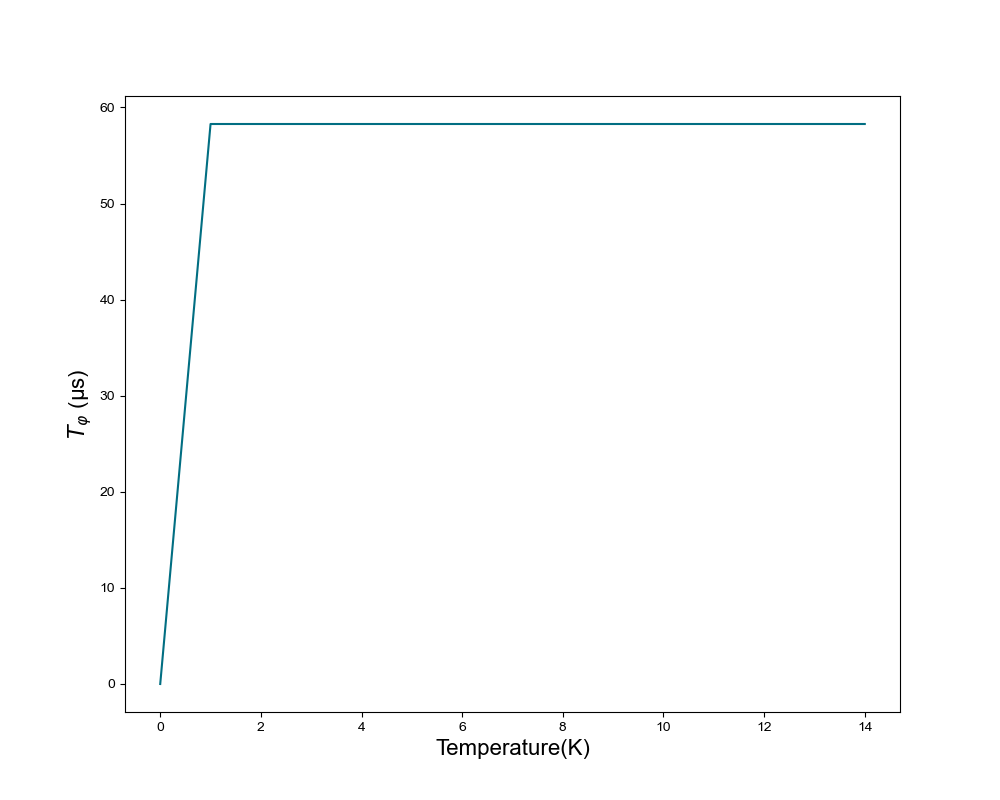

In [142]:
figure, (ax1) = plt.subplots(1,1,figsize = (10,8))
ax1.plot(Tphi_Ej*1e-9/(2*np.pi)*1e6)
ax1.set_ylabel(r'$T_\varphi $ (µs)')
ax1.set_xlabel('Temperature(K)')

So the $T_\varphi$ of SCqubits does not depends on temperature, so I guess we can move on and do the same thing as we did for our Previous 2D maps for elements matix and transistion energies, but for $T_1$ effective and $T_\varphi$...

First Maybe if we keep the ratio Ec/Ej and El/Ej the same and varies onlt Ej to see the dependance with of T1 and Tphi for with Ej.

Now we only care about transition 01

In [34]:
def effective_T1(fluxonium, noise_dict, noises) : 
    """""""""""""""
    a function that return the effective T1 
    """""""""""""""
    states_indices = [0,1,2,3,4,5]
    Gamma = np.zeros((len(states_indices), len(states_indices)))
    for noise in noises :
        Gamma += Smith_Gamma(noise, noise_dict, noise_dict['Temperature'] , fluxonium, states_indices,states_indices, **{'non_symetric_density' : 1})
    return Gamma
    
def effective_Gamma_phi(fluxonium, noise_dict): 
    """""""""""""""
    A function that return SCqubit tphi for fluxonium, only taking into account 1/f flux noise and 1/f critical current noise. 
    
    input : 
        - SCqubits fluxonium.
        - dictionnary for noise amplitude
    
    output :
        - a float for Tphi in unkown units. 
    """""""""""""""
    Gphi_flux_01 = fluxonium.tphi_1_over_f_flux(A_noise = noise_dict['1_over_f_flux']['Amplitude'], i = 0, j = 1,  get_rate = True)
    Gphi_cc_01 = fluxonium.tphi_1_over_f_cc(A_noise = noise_dict['1_over_f_cc']['Amplitude'], i = 0, j = 1,  get_rate = True)
    Gphi_flux_12 = fluxonium.tphi_1_over_f_flux(A_noise = noise_dict['1_over_f_flux']['Amplitude'], i = 1, j = 2,  get_rate = True)
    Gphi_cc_12 = fluxonium.tphi_1_over_f_cc(A_noise = noise_dict['1_over_f_cc']['Amplitude'], i = 1, j = 2,  get_rate = True)
    Tphi01_vs_temps = (Gphi_flux_01 + Gphi_cc_01)**-1
    Tphi12_vs_temps = (Gphi_flux_12 + Gphi_cc_12)**-1
    return Tphi01_vs_temps, Tphi12_vs_temps

# $T_\varphi$ maps

In [251]:
# Els_Ej = np.linspace(0.01, 0.3, 200)
# Ecs_Ej = np.linspace(0.02,   4, 200)
# N_cutoff = 50
# Ejs = np.arange(1,15,0.5)
# Gamma_phi__01 = {}
# Gamma_phi__12 = {}

# for ej in tqdm(Ejs) : 
#     Gamma_phi__01[ej] = []
#     Gamma_phi__02[ej] = [] # by mistake I called if 02 it should be 12
#     for index_ec,ec in enumerate(Ecs_Ej): 
#         for index_el, el in enumerate(Els_Ej):
#             fluxonium = scq.Fluxonium(EJ=ej, EC=ec*ej, EL=el*ej, flux=0, cutoff=N_cutoff)
#             Gphi = effective_Gamma_phi(fluxonium,Dephasing_noise_caracteristics )
#             Gamma_phi__01[ej].append(Gphi[0])
#             Gamma_phi__12[ej].append(Gphi[1])



In [ ]:
import pickle
with open('Gamma_phi01_data.pkl', 'rb') as fp:
    Gamma_phi__01 = pickle.load(fp)
with open('Gamma_phi12_data.pkl', 'rb') as fp:
    Gamma_phi__12 = pickle.load(fp)
Els_Ej = Gamma_phi__12['Els_Ej']
Ecs_Ej = Gamma_phi__12['Ecs_Ej']
Ejs = Gamma_phi__12['Ejs']


In [ ]:
# Gamma_phi__01['Ejs'] = Ejs
# Gamma_phi__01['Ecs_Ej'] = Els_Ej
# Gamma_phi__01['Els_Ej'] = Els_Ej

# with open('Gamma_phi01_data.pkl', 'wb') as fp:
#     pickle.dump(Gamma_phi__01, fp)


In [ ]:
# Gamma_phi__12['Ejs'] = Ejs
# Gamma_phi__12['Ecs_Ej'] = Ecs_Ej
# Gamma_phi__12['Els_Ej'] = Els_Ej

# with open('Gamma_phi12_data.pkl', 'wb') as fp:
#     pickle.dump(Gamma_phi__12, fp)

In [ ]:
for i in [5]: # Ej list 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = (np.array(Gamma_phi__01[i])*1e-9/(2*np.pi)*1e3).reshape((len(Ecs_Ej), len(Els_Ej)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els_Ej[0],Els_Ej[-1], Ecs_Ej[0], Ecs_Ej[-1]], 
                     aspect = 'auto', cmap= 'RdBu_r', origin='lower',vmax = 20)
    fig1.colorbar(pos, ax=ax1, label = r' $T_{01}^\varphi$'  +r' [ms]')
    ax1.set_title('Ej = ' + str(i))
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    fig1.savefig('tphi01_Ej'+str(i)+'.png')
    

In [ ]:
for i in [5]: 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = (np.array(Gamma_phi__12[i])*1e-9/(2*np.pi)*1e3).reshape((len(Ecs_Ej), len(Els_Ej)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els_Ej[0],Els_Ej[-1], Ecs_Ej[0], Ecs_Ej[-1]], 
                     aspect = 'auto', cmap= 'RdBu_r', origin='lower',vmax = 20)
    fig1.colorbar(pos, ax=ax1, label = r' $T_{12}^\varphi$'  +r' [ms]')
    ax1.set_title('Ej = ' + str(i))
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    fig1.savefig('tphi12_Ej'+str(i)+'.png')
    

# T1 maps

In [ ]:
# Els_Ej = np.linspace(0.01, 0.3, 200)
# Ecs_Ej = np.linspace(0.02,   4, 200)
# N_cutoff = 30
# Ejs = np.arange(1,15,0.5)
# Gamma_matrices_capacitive = {}
# Gamma_matrices_inductive = {}
# Gamma_matrices_qp = {}

# Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
#                'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
#                'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'}, 
#                   'Temperature' : 100e-3}
# for ej in tqdm(Ejs) : 
#     Gamma_matrices_capacitive[ej] = []
#     Gamma_matrices_inductive[ej] = []
#     Gamma_matrices_qp[ej] = []
#     for index_ec,ec in enumerate(Ecs_Ej): 
#         for index_el, el in enumerate(Els_Ej):
#             fluxonium = Fluxonium(Ej=ej, Ec=ec*ej, El=el*ej, phi_ext=0, cutoff=N_cutoff)
#             G_capa = effective_T1(fluxonium, Grenoble_values, ['Capacitive'] )
#             G_ind = effective_T1(fluxonium, Grenoble_values, ['Inductive'] )
#             G_qp = effective_T1(fluxonium, Grenoble_values, ['Quasiparticle'] )
#             Gamma_matrices_capacitive[ej].append(G_capa)
#             Gamma_matrices_inductive[ej].append(G_ind)            
#             Gamma_matrices_qp[ej].append(G_qp)


In [ ]:
import pickle
with open('Gamma_matrices_inductive.pkl', 'rb') as fp:
    Gamma_matrices_inductive = pickle.load(fp)
with open('Gamma_matrices_capacitive.pkl', 'rb') as fp:
    Gamma_matrices_capacitive = pickle.load(fp)
with open('Gamma_matrices_qp.pkl', 'rb') as fp:
    Gamma_matrices_qp = pickle.load(fp)
Els_Ej = Gamma_matrices_qp['Els_Ej']
Ecs_Ej = Gamma_matrices_qp['Ecs_Ej']
Ejs = Gamma_matrices_qp['Ejs']


In [ ]:
# Gamma_matrices_inductive['Ejs'] = Ejs
# Gamma_matrices_inductive['Ecs_Ej'] = Ecs_Ej
# Gamma_matrices_inductive['Els_Ej'] = Els_Ej

# with open('Gamma_matrices_inductive.pkl', 'wb') as fp:
#     pickle.dump(Gamma_matrices_inductive, fp)

In [ ]:
# Gamma_matrices_capacitive['Ejs'] = Ejs
# Gamma_matrices_capacitive['Ecs_Ej'] = Ecs_Ej
# Gamma_matrices_capacitive['Els_Ej'] = Els_Ej

# with open('Gamma_matrices_capacitive.pkl', 'wb') as fp:
#     pickle.dump(Gamma_matrices_capacitive, fp)

In [ ]:
# Gamma_matrices_qp['Ejs'] = Ejs
# Gamma_matrices_qp['Ecs_Ej'] = Ecs_Ej
# Gamma_matrices_qp['Els_Ej'] = Els_Ej

# with open('Gamma_matrices_qp.pkl', 'wb') as fp:
#     pickle.dump(Gamma_matrices_qp, fp)


In [ ]:
for i in [5]: 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    Garray = np.array(Gamma_matrices_capacitive[i])+ np.array(Gamma_matrices_inductive[i]) + np.array(Gamma_matrices_qp[i]) 
    transistion_to_plot = ((Garray[:,0,1]+Garray[:,1,0])).reshape((len(Ecs_Ej), len(Els_Ej)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els_Ej[0],Els_Ej[-1], Ecs_Ej[0], Ecs_Ej[-1]], 
                     aspect = 'auto', cmap= 'RdBu_r', origin='lower',  norm=LogNorm(vmin=10, vmax=1e6))
    fig1.colorbar(pos, ax=ax1, label = r' $\Gamma_{\uparrow\downarrow}^{01}$'  +r' [Hz]')
    ax1.set_title('Total losses at 100mk and Ej = ' + str(i))
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    fig1.savefig('GAMMA01_Ej'+str(i)+'.png')
    

In [ ]:
# for i in [5]: 
#     fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
#     Garray = np.array(Gamma_matrices_capacitive[i])+ np.array(Gamma_matrices_inductive[i]) + np.array(Gamma_matrices_qp[i]) 
#     transistion_to_plot = ((Garray[:,2,1]+Garray[:,1,2])*1e-6).reshape((len(Ecs_Ej), len(Els_Ej)))
#     pos = ax1.imshow(transistion_to_plot,extent = [Els_Ej[0],Els_Ej[-1], Ecs_Ej[0], Ecs_Ej[-1]], 
#                      aspect = 'auto', cmap= 'RdBu_r', origin='lower')
#     fig.colorbar(pos, ax=ax1, label = r' $\Gamma_{\uparrow\downarrow}^{12}$'  +r' [MHz]')
#     ax1.set_title('Ej = ' + str(i))
#     ax1.set_ylabel(r'$E_c/E_j$')
#     ax1.set_xlabel(r'$E_l/E_j$')

In [ ]:
for i in [5]: 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    Garray = np.array(Gamma_matrices_capacitive[i])+ np.array(Gamma_matrices_inductive[i]) + np.array(Gamma_matrices_qp[i]) 
    transistion_to_plot = ((Garray[:,2,1]+Garray[:,1,2])).reshape((len(Ecs_Ej), len(Els_Ej)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els_Ej[0],Els_Ej[-1], Ecs_Ej[0], Ecs_Ej[-1]], 
                     aspect = 'auto', cmap= 'RdBu_r', origin='lower',norm=LogNorm(vmin=10, vmax=1e6) )
    fig1.colorbar(pos, ax=ax1, label = r' $\Gamma_{\uparrow\downarrow}^{12}$'  +r' [Hz]')
    ax1.set_title('Total losses at 100mk Ej = ' + str(i))
    ax1.set_ylabel(r'$E_c/E_j$')
    ax1.set_xlabel(r'$E_l/E_j$')
    fig1.savefig('GAMMA12_Ej'+str(i)+'.png')


# Losses with external flux  

In [8]:
Ej = 6.14
Ec = 1.4
El = 0.16

########## We use the bad quality factor and high temperature.

Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'},
                  'Temperature' : 70e-3}

Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {30e-3}}
phis_ext = np.arange(-0.6,0.6,0.001)
Tphi_flux_vs_phi_ext01 = np.zeros(len(phis_ext))
Tphi_cc_vs_phi_ext01 = np.zeros(len(phis_ext))
Tphi_flux_vs_phi_ext12 = np.zeros(len(phis_ext))
Tphi_cc_vs_phi_ext12 = np.zeros(len(phis_ext))

for i in tqdm(range(len(phis_ext))):
    Scq_fluxonium = scq.Fluxonium(EJ = Ej,
                               EC = Ec,
                               EL = El,
                               flux = phis_ext[i],
                               cutoff = 100)
    Tphi_flux_vs_phi_ext01[i] = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, get_rate = True)
    Tphi_cc_vs_phi_ext01[i] = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 0, j = 1, get_rate = True)
    Tphi_flux_vs_phi_ext12[i] = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 1, j = 2, get_rate = True)
    Tphi_cc_vs_phi_ext12[i] = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 1, j = 2,  get_rate = True)


  9%|██████▊                                                                        | 104/1200 [00:02<00:26, 41.31it/s]


KeyboardInterrupt: 

In [ ]:
Tphi01 =(Tphi_flux_vs_phi_ext01+Tphi_cc_vs_phi_ext01)**-1 * 1e-9*1e3
Tphi12 =(Tphi_flux_vs_phi_ext12+Tphi_cc_vs_phi_ext12)**-1 *1e-9 *1e3
fig1, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
# ax1.plot(phis_ext, Tphi12 , label=r"$T_\varphi^{12}$")
ax1.plot(phis_ext, Tphi01 *1e3, label=r"$T_\varphi^{01}$")
ax1.set_yscale('log')
ax1.set_ylabel(r'$T_\varphi$ (µs)')
ax1.legend()

ax2.plot(phis_ext, Tphi_flux_vs_phi_ext01**-1 * 1e-9/(2*np.pi)*1e3, label=r"$T_\Phi^{01}$")
# ax2.plot(phis_ext, Tphi_cc_vs_phi_ext01**-1 * 1e-9/(2*np.pi)*1e3, label=r"$T_{cc}i^{01}$")
ax2.plot(phis_ext, Tphi_flux_vs_phi_ext12**-1 * 1e-9/(2*np.pi)*1e3, 'ro-',label=r"$T_\Phi^{12}$",)
# ax2.plot(phis_ext, Tphi_cc_vs_phi_ext12**-1 * 1e-9/(2*np.pi)*1e3, label=r"$T_{cc}i^{12}$")

ax1.set_xlabel(r'$\Phi_{ext}$')
ax2.set_xlabel(r'$\Phi_{ext}$')

ax2.set_yscale('log')
ax2.set_ylabel(r'$T_{Noise}$ (µs)')
ax2.legend()
# ax2.set_xlim(-0.1,0.1)
ax1.set_title(r'Phase time for $E_j$ ={:.2f}GHz, $E_c$ ={:.1f}GHz and $E_l$ = {:.0f}MHz'.format(Ej,Ec,El*1e3))

fig1.savefig('tphivsflux05.PNG')

zoom on integer flux

In [244]:
phis_ext = np.arange(-2e-4,2e-4,1e-6)
Tphi_flux_vs_phi_ext01 = np.zeros(len(phis_ext))
Tphi_cc_vs_phi_ext01 = np.zeros(len(phis_ext))
Tphi_flux_vs_phi_ext12 = np.zeros(len(phis_ext))
Tphi_cc_vs_phi_ext12 = np.zeros(len(phis_ext))
for i in tqdm(range(len(phis_ext))):
    Scq_fluxonium = scq.Fluxonium(EJ = Ej,
                               EC = Ec,
                               EL = El,
                               flux = phis_ext[i],
                               cutoff = 60)
    Tphi_flux_vs_phi_ext01[i] = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, get_rate = True)
    Tphi_cc_vs_phi_ext01[i] = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 0, j = 1, get_rate = True)
    Tphi_flux_vs_phi_ext12[i] = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 1, j = 2, get_rate = True)
    Tphi_cc_vs_phi_ext12[i] = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 1, j = 2,  get_rate = True)


100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [00:04<00:00, 93.26it/s]


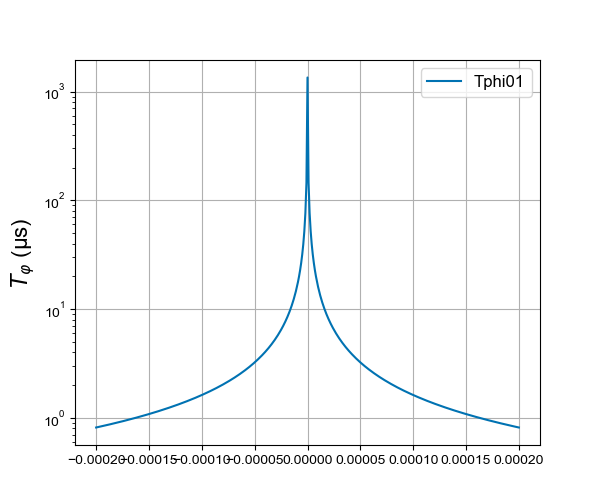

In [245]:
Tphi01 =(Tphi_flux_vs_phi_ext01+Tphi_cc_vs_phi_ext01)**-1 * 1e-9/(2*np.pi)*1e3
Tphi12 =(Tphi_flux_vs_phi_ext12+Tphi_cc_vs_phi_ext12)**-1 *1e-9 / (2*np.pi)*1e3
fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
# ax1.plot(phis_ext, Tphi12 , label="Tphi12")
ax1.plot(phis_ext, Tphi01 *1e3, label="Tphi01")
ax1.set_yscale('log')
ax1.set_ylabel(r'$T_\varphi$ (µs)')
ax1.legend()
ax1.grid()

In [29]:
Ej = 6.14
Ec = 1.6
El = 0.16
########## We use the bad quality factor and high temperature.

Grenoble_values = {'Capacitive' : {'Q_fac' : 0.1e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 50000*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e8, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'},
                  'Temperature' : 100e-3}

Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {30e-3}}
phis_ext = np.arange(-0.6,0.6,0.01)

transitions = ['01','12','23']
row_indices  = [0,1,2,3,]
column_indices  = [0,1,2,3,]
T_capa = np.zeros((len(transitions),2, len(phis_ext)))
T_ind  = np.zeros((len(transitions),2, len(phis_ext)))
T_qp   = np.zeros((len(transitions),2, len(phis_ext)))
for i in tqdm(range(len(phis_ext))):
    
    fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El = El, phi_ext= phis_ext[i], cutoff=80)
    Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    
    for index, t in enumerate(transitions) : 
        T_capa[index][0][i]  = Gamma_Capacitive_mat[int(t[0]),int(t[1])]
        T_capa[index][1][i]  = Gamma_Capacitive_mat[int(t[1]),int(t[0])]
        T_ind[index][0][i]   = Gamma_Inductive_mat[int(t[0]),int(t[1])]
        T_ind[index][1][i]   = Gamma_Inductive_mat[int(t[1]),int(t[0])]
        T_qp[index][0][i]    = Gamma_Qp_mat[int(t[0]),int(t[1])]
        T_qp[index][1][i]    = Gamma_Qp_mat[int(t[1]),int(t[0])]


100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:01<00:00, 74.52it/s]


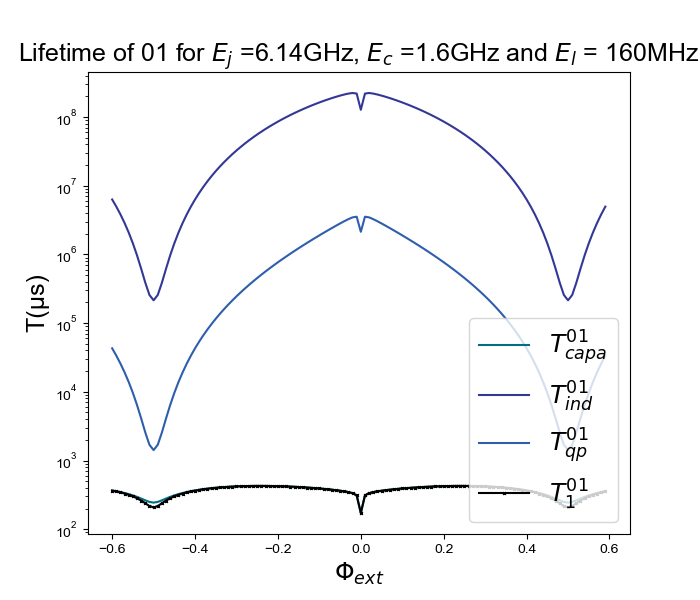

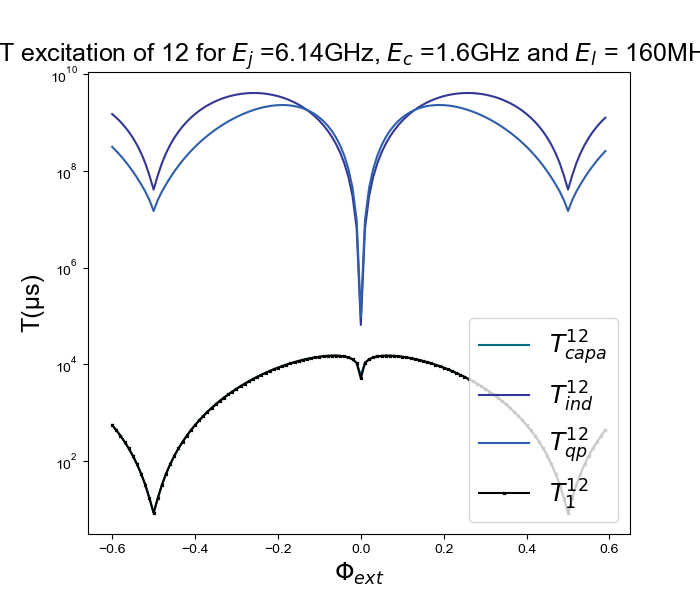

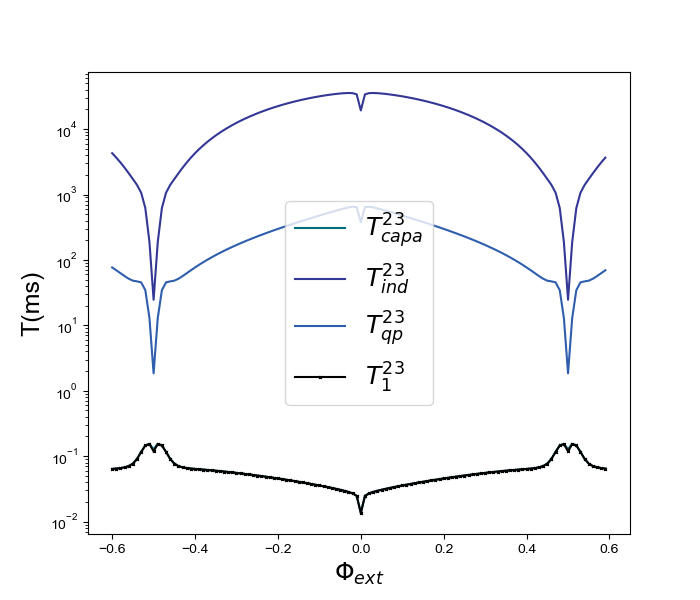

In [30]:
fig1, (ax1) = plt.subplots(1,1,figsize = (7,6))

ax1.plot(phis_ext,(T_capa[0,0,:] + T_capa[0,1,:]) **-1*1e6, label =r'$T_{ capa}^{01}$')
ax1.plot(phis_ext,(T_ind[0,0,:]+T_ind[0,1,:])**-1*1e6, label =r'$T_{ind}^{01}$')
ax1.plot(phis_ext,(T_qp[0,0,:] +T_qp[0,1,:])  **-1*1e6, label =r'$T_{qp}^{01}$')
ax1.plot(phis_ext,(T_capa[0,0,:] + T_capa[0,1,:]+T_ind[0,0,:]+T_ind[0,1,:]+T_qp[0,0,:] +T_qp[0,1,:]) **-1*1e6, label =r'$T_{1}^{01}$', color = 'black', marker= 'x', markersize = 2)


fig2, (ax2) = plt.subplots(1,1,figsize = (7,6))


ax2.plot(phis_ext,(T_capa[1,0,:] ) **-1*1e6, label =r'$T_{ capa}^{12}$')
ax2.plot(phis_ext,(T_ind[1,0,:])**-1*1e6, label =r'$T_{ind}^{12}$')
ax2.plot(phis_ext,(T_qp[1,0,:] )  **-1*1e6, label =r'$T_{qp}^{12}$')
ax2.plot(phis_ext,(T_capa[1,0,:] +T_ind[1,0,:]+T_qp[1,0,:] ) **-1*1e6, label =r'$T_{1}^{12}$', color = 'black', marker= 'x', markersize = 2)

fig3, (ax3) = plt.subplots(1,1,figsize = (7,6))

ax3.plot(phis_ext,(T_capa[2,0,:] + T_capa[2,1,:]) **-1*1e3, label =r'$T_{ capa}^{23}$')
ax3.plot(phis_ext,(T_ind[2,0,:]+T_ind[2,1,:])**-1*1e3, label =r'$T_{ind}^{23}$')
ax3.plot(phis_ext,(T_qp[2,0,:] +T_qp[2,1,:])  **-1*1e3, label =r'$T_{qp}^{23}$')
ax3.plot(phis_ext,(T_capa[2,0,:] + T_capa[2,1,:]+T_ind[2,0,:]+T_ind[2,1,:]+T_qp[2,0,:] +T_qp[2,1,:]) **-1*1e3, label =r'$T_{1}^{23}$', color = 'black', marker= 'x', markersize = 2)

ax1.set_title(r'Lifetime of 01 for $E_j$ ={:.2f}GHz, $E_c$ ={:.1f}GHz and $E_l$ = {:.0f}MHz'.format(Ej,Ec,El*1e3))
ax1.set_xlabel(r'$\Phi_{ext}$')
ax1.set_ylabel('T(µs)')
ax1.set_yscale('log')
ax1.legend(loc = 'lower right')

ax2.set_title(r'T excitation of 12 for $E_j$ ={:.2f}GHz, $E_c$ ={:.1f}GHz and $E_l$ = {:.0f}MHz'.format(Ej,Ec,El*1e3))

ax2.set_xlabel(r'$\Phi_{ext}$')
ax2.set_ylabel('T(µs)')
ax2.set_yscale('log')
ax2.legend(loc = 'lower right')

ax3.set_xlabel(r'$\Phi_{ext}$')
ax3.set_ylabel('T(ms)')
ax3.set_yscale('log')
ax3.legend()


fig1.savefig('T1_01_vs_flux_Ec{:.1f}.PNG'.format(Ec))
fig2.savefig('T1_12_vs_flux_Ec{:.1f}.PNG'.format(Ec))

 C:\Users\wael\AppData\Local\Temp\ipykernel_31484\2819248590.py: 3

Text(0, 0.5, 'T2(µs)')

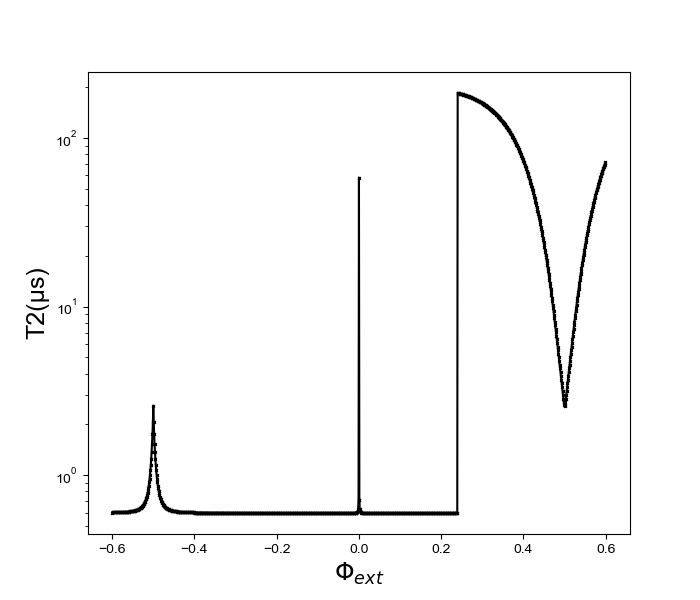

In [46]:
T01_tot = (T_capa[0,0,:] + T_capa[0,1,:]+T_ind[0,0,:]+T_ind[0,1,:]+T_qp[0,0,:] +T_qp[0,1,:]) **-1*1e6
T12up = (T_capa[1,0,:] +T_ind[1,0,:]+T_qp[1,0,:]) **-1*1e6
Tphi01 =(Tphi_flux_vs_phi_ext01)**-1 * 1e-9*1e3



T2 = (1/(Tphi01*1e3) + 2 / T12up + 2 / T01_tot)**-1
fig1, (ax1) = plt.subplots(1,1,figsize = (7,6))
ax1.plot(phis_ext, T2 , label=r"$T_2^{01}$", color = 'black', marker= 'x', markersize = 2)
# ax1.plot(phis_ext, Tphi01*1e3 , label=r"$T_2^{01}$")
# ax1.plot(phis_ext, T12up , label=r"$T_2^{01}$")
# ax1.plot(phis_ext, T01_tot , label=r"$T_2^{01}$")
ax1.set_yscale('log')
ax1.set_xlabel(r'$\Phi_{ext}$')
ax1.set_ylabel('T2(µs)')

### Verification with scqubits

Spectral data:   0%|          | 0/1200 [00:00<?, ?it/s]

See documentation for details.
This warning can be disabled by executing:
scqubits.settings.T1_DEFAULT_WARNING=False

 C:\Users\wael\anaconda3\lib\site-packages\scqubits\core\noise.py: 1195

(<Figure size 800x1200 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'tphi_1_over_f_cc'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: title={'center': 'tphi_1_over_f_flux'}, xlabel='flux', ylabel='$ns$'>],
        [<AxesSubplot: title={'center': 't1_capacitive'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: title={'center': 't1_charge_impedance'}, xlabel='flux', ylabel='$ns$'>],
        [<AxesSubplot: title={'center': 't1_flux_bias_line'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: title={'center': 't1_inductive'}, xlabel='flux', ylabel='$ns$'>],
        [<AxesSubplot: title={'center': 't1_quasiparticle_tunneling'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: >]], dtype=object))

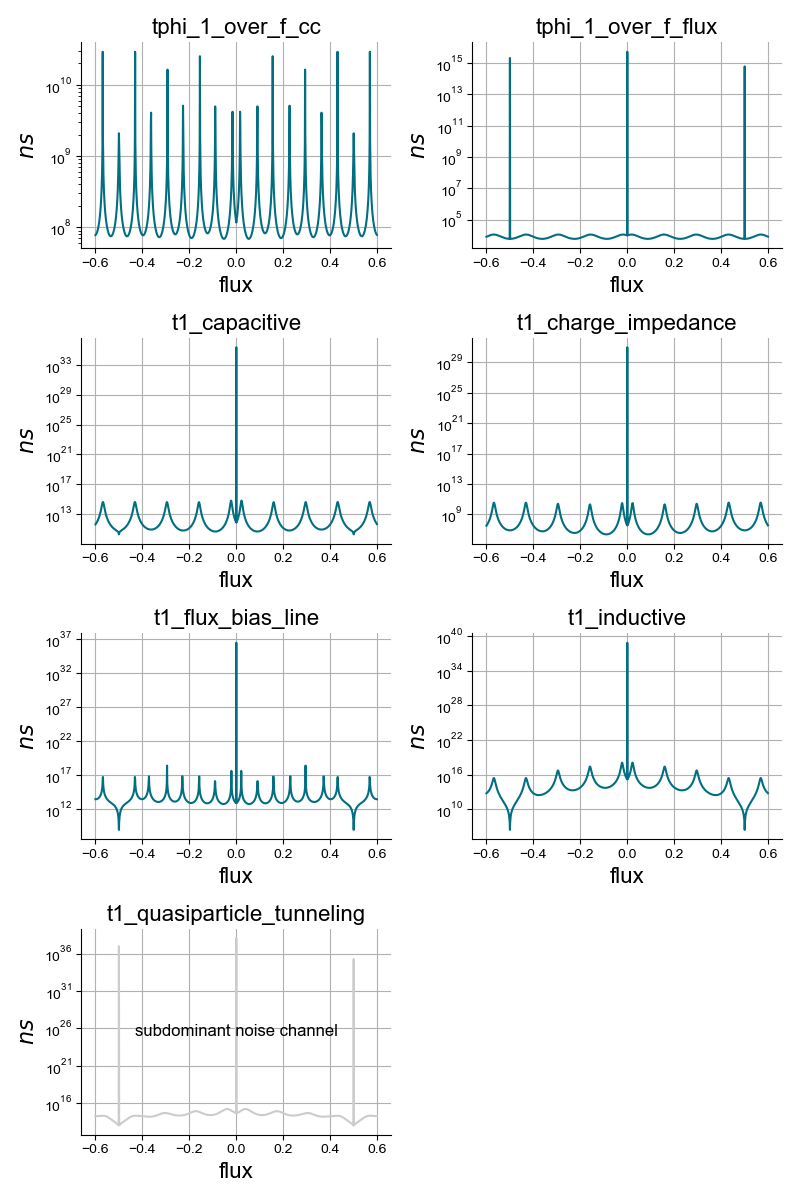

In [117]:
Scq_fluxonium.plot_coherence_vs_paramvals(param_name='flux', param_vals = phis_ext)

# Losses with temperature  and quality factor

In [49]:
temperatures = np.linspace(1e-3,200e-3,100)
Tphi_vs_temps = np.zeros(100)

Ej = 5.7
Ec = 2.6
El = 0.17

Scq_fluxonium = scq.Fluxonium(EJ = Ej,
                           EC = Ec,
                           EL = El,
                           flux = 0,
                           cutoff = 60)

for i in tqdm(range(100)):
    Gphi_flux_01 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, T =temperatures[i], get_rate = True)
    Gphi_cc_01 = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 0, j = 1, T = temperatures[i], get_rate = True)
    Gphi_flux_12 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 1, j = 2, T =temperatures[i], get_rate = True)
    Gphi_cc_12 = Scq_fluxonium.tphi_1_over_f_cc(A_noise = Dephasing_noise_caracteristics['1_over_f_cc']['Amplitude'], i = 1, j = 2, T = temperatures[i], get_rate = True)
    Tphi_vs_temps[i] = (Gphi_flux_01 + Gphi_cc_01 + Gphi_flux_12 + Gphi_cc_12)**-1

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


NameError: name 'Dephasing_noise_caracteristics' is not defined

Text(0.5, 0, 'Temperature(K)')

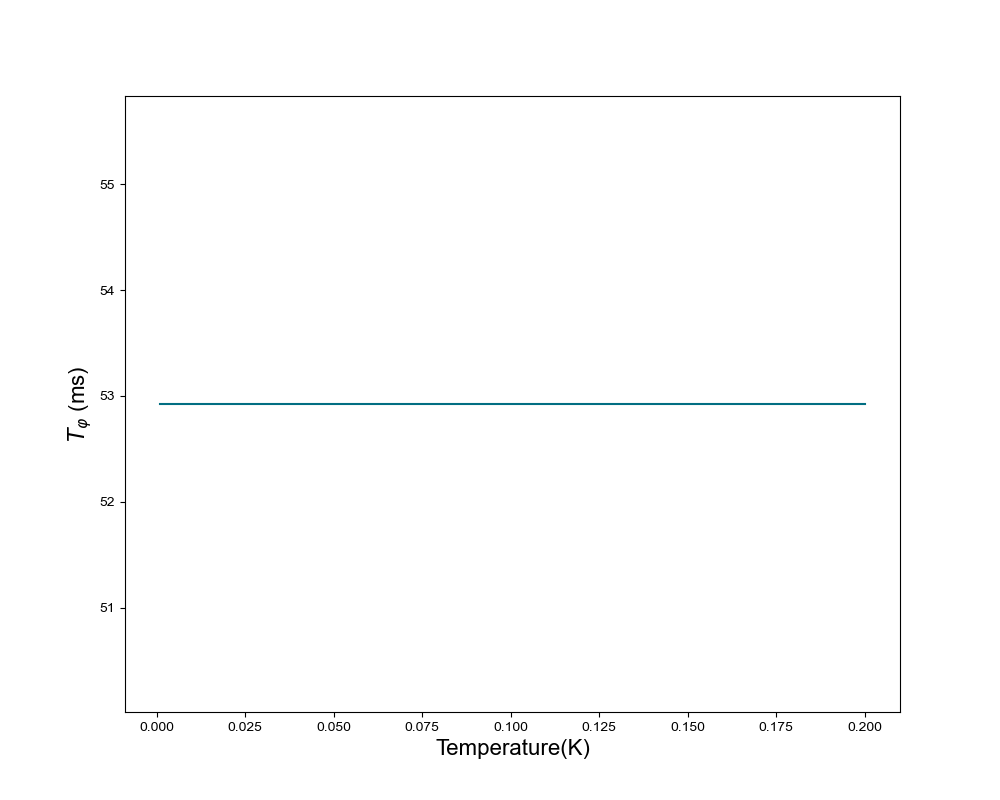

In [259]:
figure, (ax1) = plt.subplots(1,1,figsize = (10,8))
ax1.plot(temperatures, Tphi_vs_temps*1e-9/(2*np.pi)*1e3)
ax1.set_ylabel(r'$T_\varphi $ (ms)')
ax1.set_xlabel('Temperature(K)')

In [260]:
Ej = 20
Ec = 1.2
El = 0.12

########## We use the bad quality factor and high temperature.

Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'},
                  'Temperature' : 100e-3}

Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {100e-3}}

fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El = El, phi_ext= 0, cutoff=60)

Temps = np.arange(10e-3,100e-3,1e-3)

transitions = ['01','12','23']

T_capa_vs_T = np.zeros((len(transitions),2, len(Temps)))
T_ind_vs_T  = np.zeros((len(transitions),2, len(Temps)))
T_qp_vs_T   = np.zeros((len(transitions),2, len(Temps)))
for i in tqdm(range(len(Temps))):
    Grenoble_values.update({'Temperature' :Temps[i] })
    Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    
    for index, t in enumerate(transitions) : 
        T_capa_vs_T[index][0][i]  = Gamma_Capacitive_mat[int(t[0]),int(t[1])]
        T_capa_vs_T[index][1][i]  = Gamma_Capacitive_mat[int(t[1]),int(t[0])]
        T_ind_vs_T[index][0][i]   = Gamma_Inductive_mat[int(t[0]),int(t[1])]
        T_ind_vs_T[index][1][i]   = Gamma_Inductive_mat[int(t[1]),int(t[0])]
        T_qp_vs_T[index][0][i]    = Gamma_Qp_mat[int(t[0]),int(t[1])]
        T_qp_vs_T[index][1][i]    = Gamma_Qp_mat[int(t[1]),int(t[0])]


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 152.43it/s]


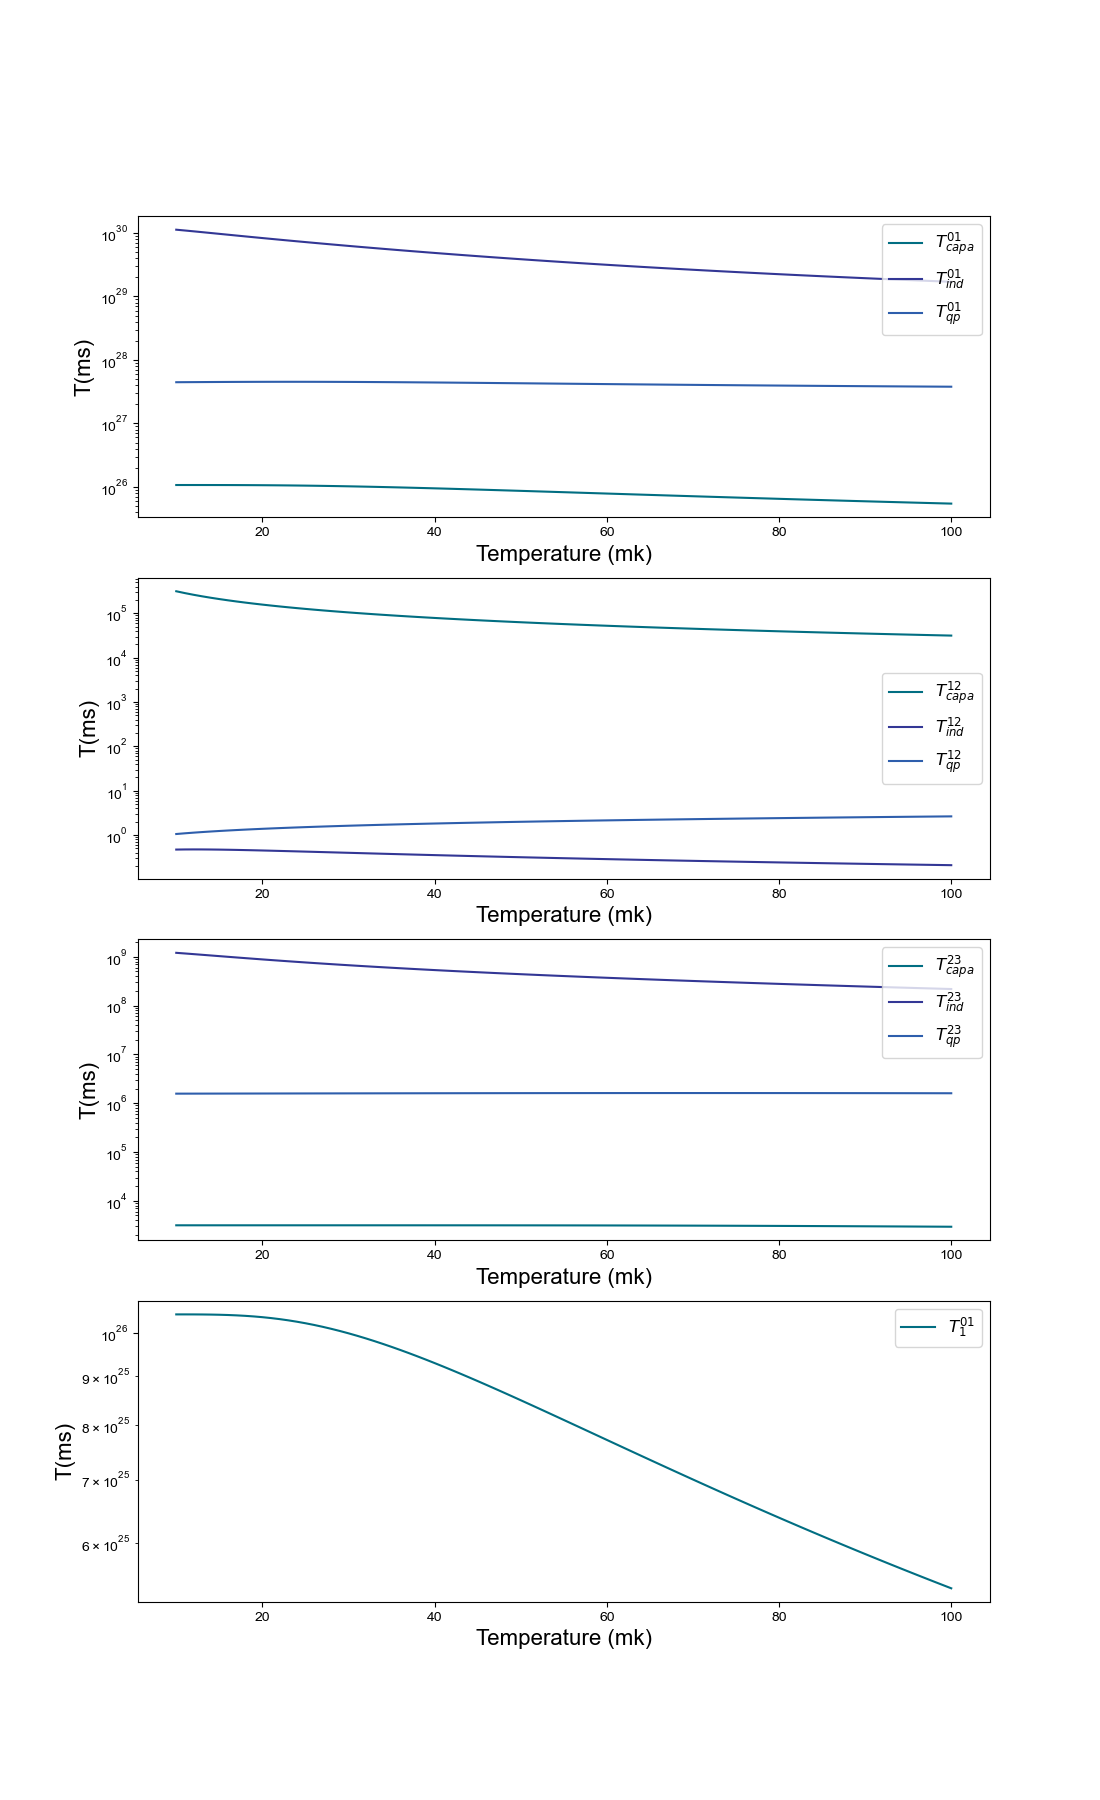

In [261]:
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (11,18))
Temps = Temps*1e3
ax1.plot(Temps,(T_capa_vs_T[0,0,:] + T_capa_vs_T[0,1,:]) **-1*1e3, label =r'$T_{ capa}^{01}$')
ax1.plot(Temps,(T_ind_vs_T[0,0,:]+T_ind_vs_T[0,1,:])**-1*1e3, label =r'$T_{ind}^{01}$')
ax1.plot(Temps,(T_qp_vs_T[0,0,:] +T_qp_vs_T[0,1,:])  **-1*1e3, label =r'$T_{qp}^{01}$')


ax2.plot(Temps,(T_capa_vs_T[1,0,:] + T_capa_vs_T[1,1,:]) **-1*1e3, label =r'$T_{ capa}^{12}$')
ax2.plot(Temps,(T_ind_vs_T[1,0,:]+T_ind_vs_T[1,1,:])**-1*1e3, label =r'$T_{ind}^{12}$')
ax2.plot(Temps,(T_qp_vs_T[1,0,:] +T_qp_vs_T[1,1,:])  **-1*1e3, label =r'$T_{qp}^{12}$')


ax3.plot(Temps,(T_capa_vs_T[2,0,:] + T_capa_vs_T[2,1,:]) **-1*1e3, label =r'$T_{ capa}^{23}$')
ax3.plot(Temps,(T_ind_vs_T[2,0,:]+T_ind_vs_T[2,1,:])**-1*1e3, label =r'$T_{ind}^{23}$')
ax3.plot(Temps,(T_qp_vs_T[2,0,:] +T_qp_vs_T[2,1,:])  **-1*1e3, label =r'$T_{qp}^{23}$')

ax4.plot(Temps,(T_capa_vs_T[0,0,:] + T_capa_vs_T[0,1,:]+T_ind_vs_T[0,0,:]+T_ind_vs_T[0,1,:]+T_qp_vs_T[0,0,:] +T_qp_vs_T[0,1,:]) **-1*1e3, label =r'$T_{1}^{01}$')

ax1.set_xlabel('Temperature (mk)')
ax1.set_ylabel('T(ms)')
ax1.set_yscale('log')
ax1.legend()

ax2.set_xlabel('Temperature (mk)')
ax2.set_ylabel('T(ms)')
ax2.set_yscale('log')
ax2.legend()

ax3.set_xlabel('Temperature (mk)')
ax3.set_ylabel('T(ms)')
ax3.set_yscale('log')
ax3.legend()

ax4.set_xlabel('Temperature (mk)')
ax4.set_ylabel('T(ms)')
ax4.set_yscale('log')
ax4.legend()

In [262]:
Ej = 20
Ec = 1.2
El = 0.12

########## We use the bad quality factor and high temperature.

Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'},
                  'Temperature' : 100e-3}

Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {100e-3}}

fluxonium = Fluxonium(Ej=Ej, Ec=Ec, El = El, phi_ext= 0, cutoff=60)

QFs = np.linspace(1e4,2e6,100)

transitions = ['01','12','23']

T_capa_vs_Q = np.zeros((len(transitions),2, len(QFs)))
T_ind_vs_Q  = np.zeros((len(transitions),2, len(QFs)))
T_qp_vs_Q   = np.zeros((len(transitions),2, len(QFs)))
for i in tqdm(range(len(QFs))):
    Grenoble_values.update({'Capacitive' :{'Q_fac' : QFs[i],  'Noise_operator' : '2e_charge'} })
    Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Grenoble_values['Temperature'] , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
    
    for index, t in enumerate(transitions) : 
        T_capa_vs_Q[index][0][i]  = Gamma_Capacitive_mat[int(t[0]),int(t[1])]
        T_capa_vs_Q[index][1][i]  = Gamma_Capacitive_mat[int(t[1]),int(t[0])]
        T_ind_vs_Q[index][0][i]   = Gamma_Inductive_mat[int(t[0]),int(t[1])]
        T_ind_vs_Q[index][1][i]   = Gamma_Inductive_mat[int(t[1]),int(t[0])]
        T_qp_vs_Q[index][0][i]    = Gamma_Qp_mat[int(t[0]),int(t[1])]
        T_qp_vs_Q[index][1][i]    = Gamma_Qp_mat[int(t[1]),int(t[0])]


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 103.29it/s]


Text(0.5, 1.0, 'Temperature = 100 mk')

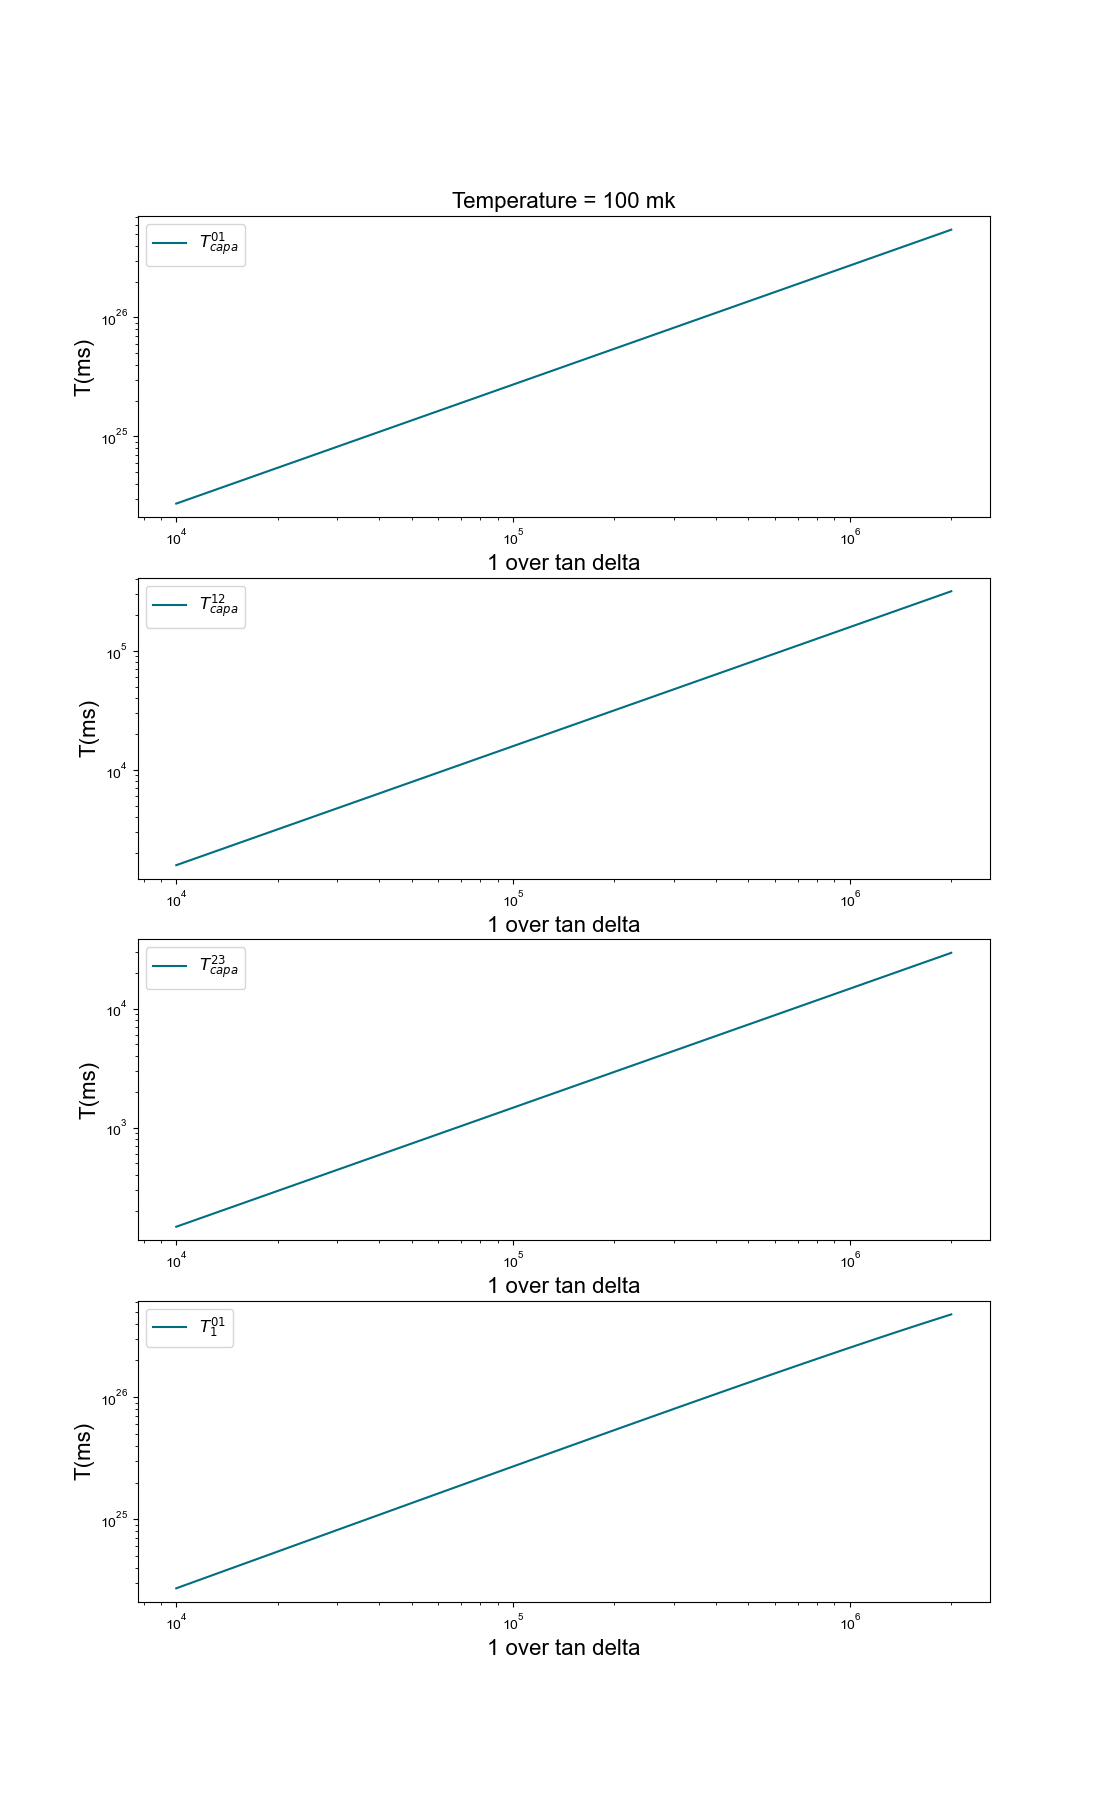

In [263]:
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (11,18))
 
ax1.plot(QFs,(T_capa_vs_Q[0,0,:] + T_capa_vs_Q[0,1,:]) **-1*1e3, label =r'$T_{ capa}^{01}$')

ax2.plot(QFs,(T_capa_vs_Q[1,0,:] + T_capa_vs_Q[1,1,:]) **-1*1e3, label =r'$T_{ capa}^{12}$')

ax3.plot(QFs,(T_capa_vs_Q[2,0,:] + T_capa_vs_Q[2,1,:]) **-1*1e3, label =r'$T_{ capa}^{23}$')

ax4.plot(QFs,(T_capa_vs_Q[0,0,:] + T_capa_vs_Q[0,1,:]+T_ind_vs_Q[0,0,:]+T_ind_vs_Q[0,1,:]+T_qp_vs_Q[0,0,:] +T_qp_vs_Q[0,1,:]) **-1*1e3, label =r'$T_{1}^{01}$')

ax1.set_xlabel('1 over tan delta')
ax1.set_ylabel('T(ms)')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()

ax2.set_xlabel('1 over tan delta')
ax2.set_ylabel('T(ms)')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend()

ax3.set_xlabel('1 over tan delta')
ax3.set_ylabel('T(ms)')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.legend()

ax4.set_xlabel('1 over tan delta')
ax4.set_ylabel('T(ms)')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.legend()

ax1.set_title('Temperature = {:.0f} mk'.format(Grenoble_values['Temperature']*1e3))

# Cavity part

The next part is taken from Séb's code

In [34]:
Ej = 6.1
Ec = 1.6
El = 0.16
phi_ext = 0
N_cutoff = 60
N_trunc = 12

wr = 6.889# cavity frequency
N_photon = 10




Cqb = (cst.e**2)/(2*Ec*1e9*cst.h)
Cc = 2.7e-15
print(Cqb*1e15)

# Cr=6.698000882051788e-13
Cr=np.pi/(2*2*np.pi*wr*1e9*50)


beta =  Cc/(Cqb+Cc)  # valid only if Cqb, Cr >> Cc
# Vzpf = np.sqrt(cst.hbar*wr*1e9*2*np.pi/(2*Cr))
Vzpf = np.sqrt(cst.h*wr*1e9/(2*Cr))

g = 2*cst.e*beta*Vzpf / cst.h * 1e-9 
g = 0.1
osc = scq.Oscillator(E_osc=wr,truncated_dim=N_photon)

print('g: %f MHz'%(g*1e3))


12.10639332791195
g: 100.000000 MHz


In [35]:
np.sqrt(1.5)*1.5

1.8371173070873834

In [36]:
# phi_plot_1 = np.linspace(-1e-6, 1e-6,10)
# phi_plot_2 = np.linspace(-1e-6, 1e-6,10)+0.5

# phi_plot = np.concatenate((phi_plot_1, phi_plot_2)).flatten()

# phi_plot = np.linspace(-1e-6, 1e-6,10)

phi_plot = np.arange(-0.1,1.1,0.01)



# E_uncoupled =  np.zeros((len(phi_plot), int(N_photon*N_trunc)))
E_uncoupled =  np.zeros((len(phi_plot), int(N_photon*N_trunc)))
E_coupled =  np.zeros((len(phi_plot), int(N_photon*N_trunc)))

# w_uncoupled = np.zeros((len(phi_plot), int(N_photon*N_trunc)))
w_uncoupled = np.zeros((len(phi_plot), int(N_photon*N_trunc)))
w_coupled = np.zeros((len(phi_plot), int(N_photon*N_trunc)))

vec_uncoupled = np.zeros((len(phi_plot), int(N_photon*N_trunc),int(N_photon*N_trunc)), dtype='complex')
vec_coupled = np.zeros((len(phi_plot), int(N_photon*N_trunc), int(N_photon*N_trunc)), dtype='complex')

for k in tqdm(range(len(phi_plot))):
    qb = scq.Fluxonium(EJ=Ej, EC=Ec, EL=El, flux=phi_plot[k], cutoff=N_cutoff, truncated_dim=N_trunc)
    
    H_uncoupled = scq.HilbertSpace([qb, osc])
#     H_uncoupled = scq.HilbertSpace([qb])
    H_coupled = scq.HilbertSpace([qb, osc])
    H_coupled.add_interaction(g=g, op1=(qb.n_operator(), qb), op2=(1j*(osc.creation_operator() - osc.annihilation_operator()), osc),add_hc=True)
    
    E_un, vec_un = H_uncoupled.hamiltonian().eigenstates()
    E, vec = H_coupled.hamiltonian().eigenstates()
    
    E_uncoupled[k,:] =  E_un
    E_coupled[k,:] = E
    
    w_uncoupled[k,:] = E_uncoupled[k,:] - E_uncoupled[k,0]
    w_coupled[k,:] = E_coupled[k,:] - E_coupled[k,0]
    
    
    for p in range(N_photon*N_trunc):
        vec_coupled[k,p,:] = vec[p][:].flatten()
        vec_uncoupled[k,p,:] = vec_un[p][:].flatten()

100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:10<00:00, 11.15it/s]


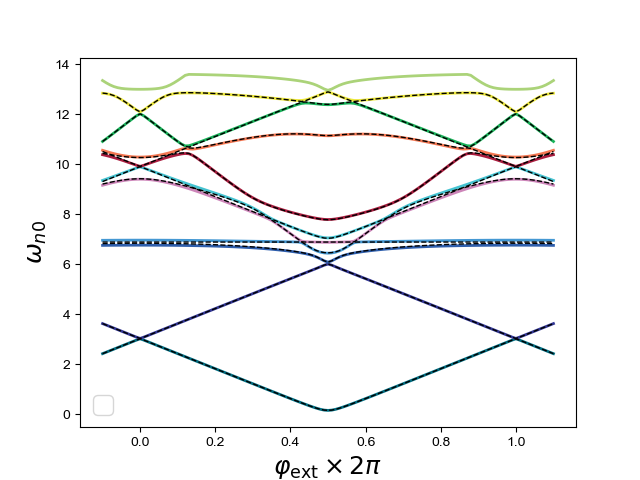

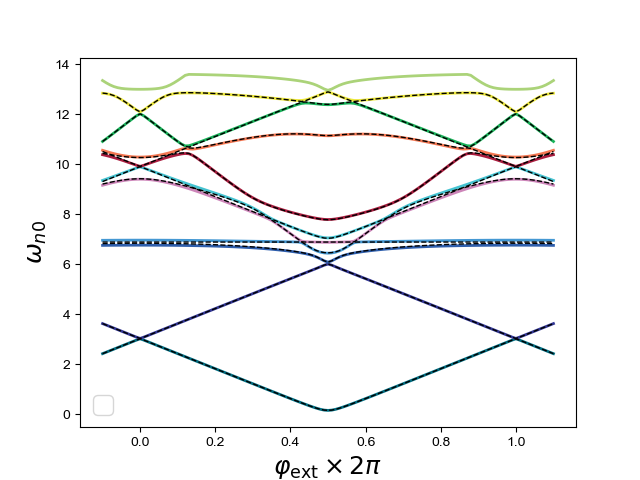

In [37]:
fig, ax = plt.subplots(1, 1)

ax.plot(phi_plot, w_coupled[:,1:N_trunc],linewidth = 2)
ax.plot(phi_plot, w_uncoupled[:,1:N_trunc-1], linestyle='dashed', color='black',linewidth = 1)

#ax.plot(phi_plot, w_uncoupled[:,N_trunc-1:N_trunc], linestyle='dashed', color='black',label = 'Uncoupled',linewidth = 1)
ax.set_xlabel(r'$\varphi_\mathrm{ext}\times 2\pi$')
ax.set_ylabel(r'$\omega_{n0}$')

# ax.plot(phi_plot, E_uncoupled[:,:2], linestyle='dashed')
ax.legend()
fig.show()

In [48]:
photon_number_coupled = np.zeros((len(phi_plot), int(N_photon*N_trunc)))
photon_number_uncoupled = np.zeros((len(phi_plot), int(N_photon*N_trunc)))

for p in tqdm(range(len(phi_plot))):   
    for k in range(N_photon*N_trunc): 
        
        N_op = destroy(N_photon).dag()*destroy(N_photon)
        
        N_op = tensor(qeye(N_trunc), N_op)
        
        first_prod = np.dot(N_op, vec_coupled[p][k])
        photon_number_coupled[p,k] = np.dot(np.conj(vec_coupled[p][k].T), first_prod)
        
        first_prod = np.dot(N_op, vec_uncoupled[p][k])
        photon_number_uncoupled[p,k] = np.dot(np.conj(vec_uncoupled[p][k].T), first_prod)


  0%|                                                                                          | 0/121 [00:00<?, ?it/s]ComplexWarning: Casting complex values to real discards the imaginary part
 C:\Users\wael\AppData\Local\Temp\ipykernel_27176\4148304157.py: 12ComplexWarning: Casting complex values to real discards the imaginary part
100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:07<00:00, 16.30it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:12<00:00,  9.36it/s]


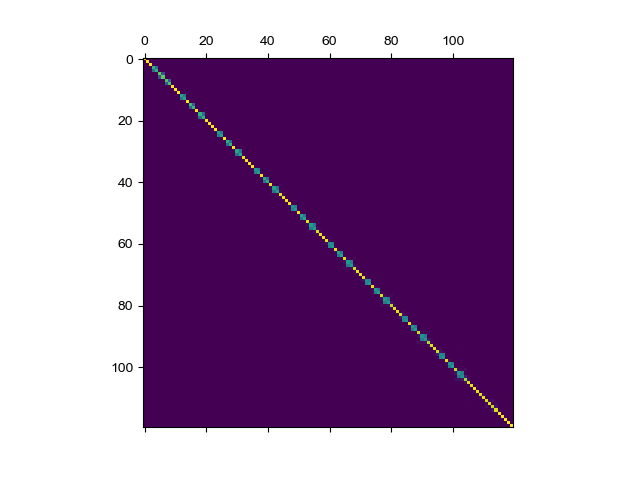

In [43]:
overlap =  np.zeros((len(phi_plot), int(N_photon*N_trunc), int(N_photon*N_trunc)))

for p in tqdm(range(len(phi_plot))):   
    for k in range(N_photon*N_trunc):
        for l in range(N_photon*N_trunc):
            overlap[p,k,l] = np.abs(np.dot(np.conj(vec_coupled[p][k].T), vec_uncoupled[p][l]))**2

            
fig, ax = plt.subplots(1, 1)

ax.matshow(overlap[0,:,:])

In [44]:
quant_nb = np.zeros((len(phi_plot), int(N_photon*N_trunc), 2))

for p in tqdm(range(len(phi_plot))):
    qb_bare = scq.Fluxonium(EJ=Ej, EC=Ec, EL=El, flux=phi_plot[p], cutoff=N_cutoff, truncated_dim=N_cutoff)
    H_bare = scq.HilbertSpace([qb_bare])
    E_bare = H_bare.hamiltonian().eigenenergies()
    w_bare = E_bare - E_bare[0]
        
    for k in range(N_photon*N_trunc):
        
        idx_max = np.argmax(overlap[p,k,:])
        ph = photon_number_uncoupled[p,idx_max]
        
        w_qu = w_uncoupled[p,idx_max] - wr*ph
#         print(w_qu)
        
        idx_qb = np.argmin(np.abs(w_qu -  w_bare))
        
        quant_nb[p, k, 0] = idx_qb
        quant_nb[p, k, 1] = np.int(np.round(ph))

  0%|                                                                                          | 0/121 [00:00<?, ?it/s]DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 121.87it/s]


# Purcell

In [49]:
start = 1 # quantum number for the qubit
stop = 0 # quantum number for the qubit

beta = 1/(cst.k*0.1)
kappa = 1e-3*(wr*1e9*2*np.pi)
pop_res = (1 - np.exp(-beta*wr*1e9*cst.h))*np.exp(-beta*wr*1e9*cst.h*np.arange(N_photon))

rate_up = np.zeros(len(phi_plot))
rate_down = np.zeros(len(phi_plot))

for f in tqdm(range(len(phi_plot))):
    idx_start = np.argwhere(quant_nb[f, :, 0] == start).flatten()
    idx_stop = np.argwhere(quant_nb[f, :, 0] == stop).flatten()
    
    for k in range(len(idx_start)):
        for p in range(len(idx_stop)):
            a = tensor(qeye(N_trunc), destroy(N_photon))
            
            psi_start = vec_coupled[f][idx_start[k]]
            psi_stop = vec_coupled[f][idx_stop[p]]
            
            mat_up = np.abs(np.dot(psi_stop, np.dot(a.dag(), psi_start)))**2
            mat_down = np.abs(np.dot(psi_stop, np.dot(a, psi_start)))**2
            wij = E_coupled[f, idx_stop[p]] - E_coupled[f, idx_start[k]]
            
            if wij >=0: 
                nth_up = 1/(np.exp(beta*wij*cst.h*1e9) - 1)
                p_res = pop_res[int(quant_nb[f, idx_start[k], 1])]
                rate_temp_up = p_res*kappa*nth_up*mat_up
                rate_up[f] +=rate_temp_up
                
            elif wij <=0:
                p_res = pop_res[int(quant_nb[f, idx_start[k], 1])]
                nth_down = 1/(np.exp(-beta*wij*cst.h*1e9) - 1)
                rate_temp_down = p_res*kappa*(nth_down + 1)*mat_down
                rate_down[f] +=rate_temp_down 
                 

100%|██████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 2432.59it/s]


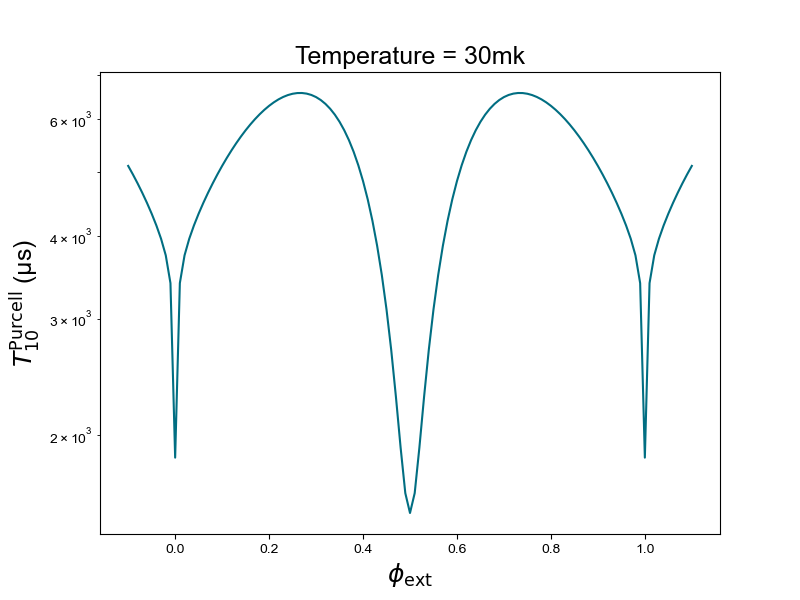

In [50]:
fig1, (ax) = plt.subplots(1,1,figsize = (8,6))

T_purcell = (1/(rate_down+rate_up))

ax.plot(phi_plot, T_purcell*1e6)
ax.set_xlabel(r'$\phi_\mathrm{ext}$')
ax.set_ylabel(r'$T_{%i%i}^\mathrm{Purcell}$ (µs)'%(start,stop))
ax.set_yscale('log')
ax.set_title('Temperature = 30mk')
fig1.savefig('purcellvsflux.png')

In [75]:
start = 1 # quantum number for the qubit
stop = 0 # quantum number for the qubit
Temperatures = np.linspace(1e-3,100e-3,100)
beta = 1/(cst.k*0.1)
kappa = 1e-3*(wr*1e9*2*np.pi)
pop_res = (1 - np.exp(-beta*wr*1e9*cst.h))*np.exp(-beta*wr*1e9*cst.h*np.arange(N_photon))

rate_up = np.zeros(len(Temperatures))
rate_down = np.zeros(len(Temperatures))
e = np.argmin(np.abs(phi_plot))
for f in tqdm(range(len(Temperatures))):
    beta = 1/(cst.k*Temperatures[f])
    idx_start = np.argwhere(quant_nb[e, :, 0] == start).flatten()
    idx_stop = np.argwhere(quant_nb[e, :, 0] == stop).flatten()
    
    for k in range(len(idx_start)):
        for p in range(len(idx_stop)):
            a = tensor(qeye(N_trunc), destroy(N_photon))
            
            psi_start = vec_coupled[f][idx_start[k]]
            psi_stop = vec_coupled[f][idx_stop[p]]
            
            mat_up = np.abs(np.dot(psi_stop, np.dot(a.dag(), psi_start)))**2
            mat_down = np.abs(np.dot(psi_stop, np.dot(a, psi_start)))**2
            wij = E_coupled[e, idx_stop[p]] - E_coupled[e, idx_start[k]]
            
            if wij >=0: 
                nth_up = 1/(np.exp(beta*wij*cst.h*1e9) - 1)
                p_res = pop_res[int(quant_nb[e, idx_start[k], 1])]
                rate_temp_up = p_res*kappa*nth_up*mat_up
                rate_up[f] +=rate_temp_up
                
            elif wij <=0:
                p_res = pop_res[int(quant_nb[e, idx_start[k], 1])]
                nth_down = 1/(np.exp(-beta*wij*cst.h*1e9) - 1)
                rate_temp_down = p_res*kappa*(nth_down + 1)*mat_down
                rate_down[f] +=rate_temp_down 

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]RuntimeWarning: overflow encountered in exp
 C:\Users\wael\AppData\Local\Temp\ipykernel_17068\3296412188.py: 28RuntimeWarning: overflow encountered in exp
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.16it/s]


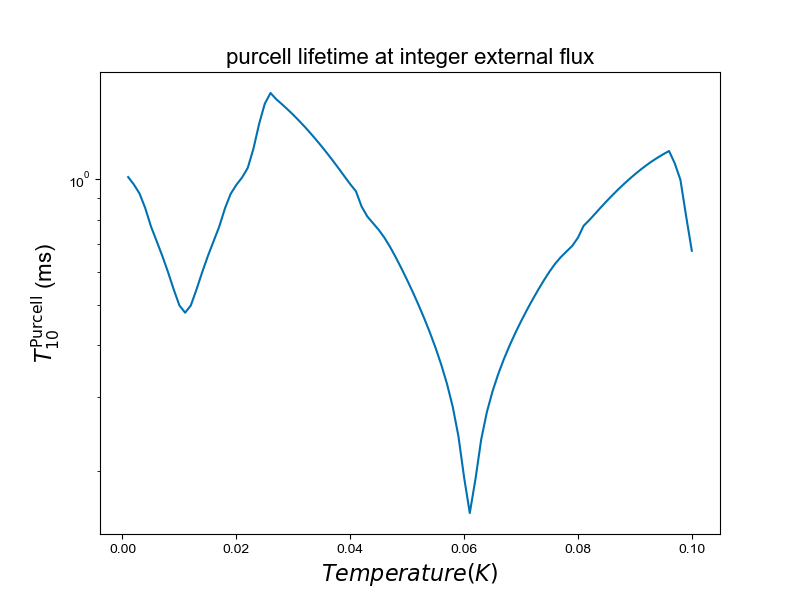

In [76]:
fig1, (ax) = plt.subplots(1,1,figsize = (8,6))

T_purcell = (1/(rate_down+rate_up))

ax.plot(Temperatures, T_purcell*1e3)
ax.set_xlabel(r'$Temperature (K)$')
ax.set_ylabel(r'$T_{%i%i}^\mathrm{Purcell}$ (ms)'%(start,stop))
ax.set_yscale('log')
ax.set_title('purcell lifetime at integer external flux')
fig1.savefig('purcellvstemp.png')

# Dispersive shift

In [41]:
wr = 6.9
Ej= 5.94
Ec = 1.6
El = 0.16
N_cutoff = 100
N_trunc = 9
g = 80e-3

kappa = 1e-3*(wr*1e9*2*np.pi)
print(kappa*1e-6)
phi_plot = np.arange(-0.6,0.6,0.01)
chi_vec = np.zeros((len(phi_plot), N_trunc))
fluxonium = scq.Fluxonium(EJ=Ej, EC=Ec, EL=El, flux=0, cutoff=N_cutoff)
N = fluxonium.get_matelements_vs_paramvals(param_name='flux',
                                   param_vals=phi_plot,
                                   operator='n_operator',
                                   evals_count=N_trunc)

for p in tqdm(range(len(phi_plot))):
    for l in range(N_trunc):
        fluxonium = scq.Fluxonium(EJ=Ej, EC=Ec, EL=El, flux=phi_plot[p], cutoff=N_cutoff)
        E_eigen = fluxonium.eigenvals(evals_count=N_trunc)
    
        D_lm = (E_eigen[l] - E_eigen) - wr
        chi_lm = g**2*np.abs(N.matrixelem_table[p,l,:])**2/D_lm
        
        D_ml = (E_eigen - E_eigen[l]) - wr
        chi_ml = g**2*np.abs(N.matrixelem_table[p,:,l])**2/D_ml
        
        chi_partial = chi_lm - chi_ml
        
        chi_vec[p,l] = np.sum(chi_partial)

43.35397861953915


Spectral data:   0%|          | 0/120 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.60it/s]


In [42]:
kappa = (wr*1e9)/1e3
print(kappa*1e-6)

6.8999999999999995


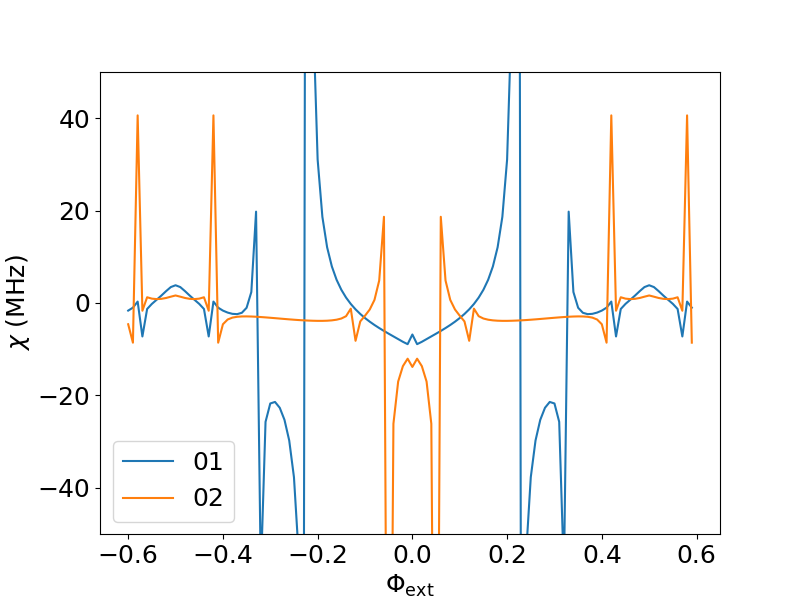

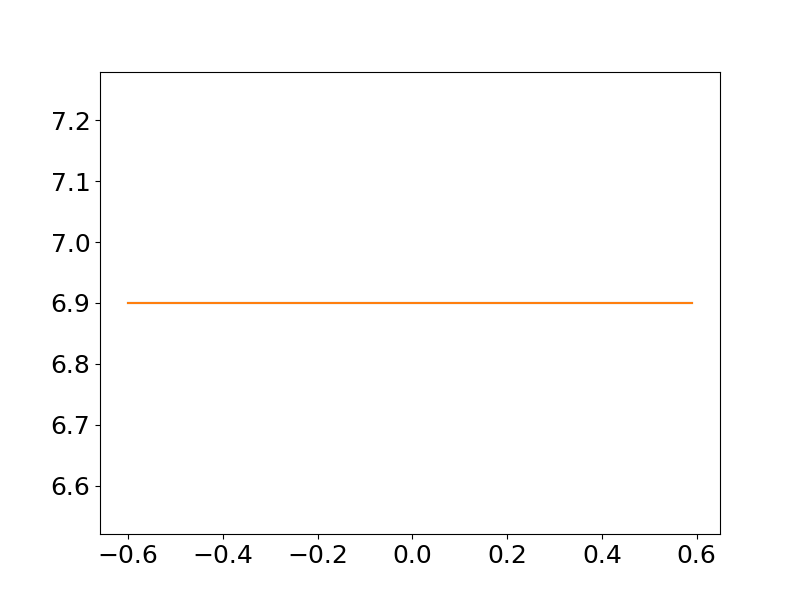

In [44]:
fig1, (ax) = plt.subplots(1,1,figsize = (8,6))
fig2, (ax2) = plt.subplots(1,1,figsize = (8,6))

for k in range(0,2):
    ax.plot(phi_plot, (chi_vec[:,k+1]- chi_vec[:,0])*1e3, label='0'+str(k+1))
    ax2.plot(phi_plot,np.ones(len(phi_plot))*kappa*1e-6, label = 'kappa')
    # ax2.plot(phi_plot, 4*(chi_vec[:,k+1]- chi_vec[:,0])/(kappa/(2*np.pi)*1e-9))
    
    #ax.plot(phi_plot, (chi_vec[:,2]- chi_vec[:,0])*1e6)
#ax.plot(phi_plot, (chi_vec[:,2]- chi_vec[:,0])*1e6)
ax.set_xlabel(r'$\Phi_\mathrm{ext}$')
ax.set_ylabel(r'$\chi$ (MHz)')
ax.set_ylim(-50, 50)
ax.legend()
# ax.set_yscale('log')

fig1.savefig('chivsflux.PNG')

In [29]:
beta = 1/(cst.k*0.07)
nth = 1/(np.exp(beta*(cst.h*wr*1e9)) - 1)
kappa = 1e-3*(wr*1e9*2*np.pi)


chi_01 = np.abs(chi_vec[:,1]- chi_vec[:,0])*2*np.pi*1e9
chi_12 = np.abs(chi_vec[:,1]- chi_vec[:,2])*2*np.pi*1e9
rate_shot_noise01 = nth*(kappa)*chi_01**2/(kappa**2 + chi_01**2)
rate_shot_noise12 = nth*(kappa)*chi_12**2/(kappa**2 + chi_12**2)

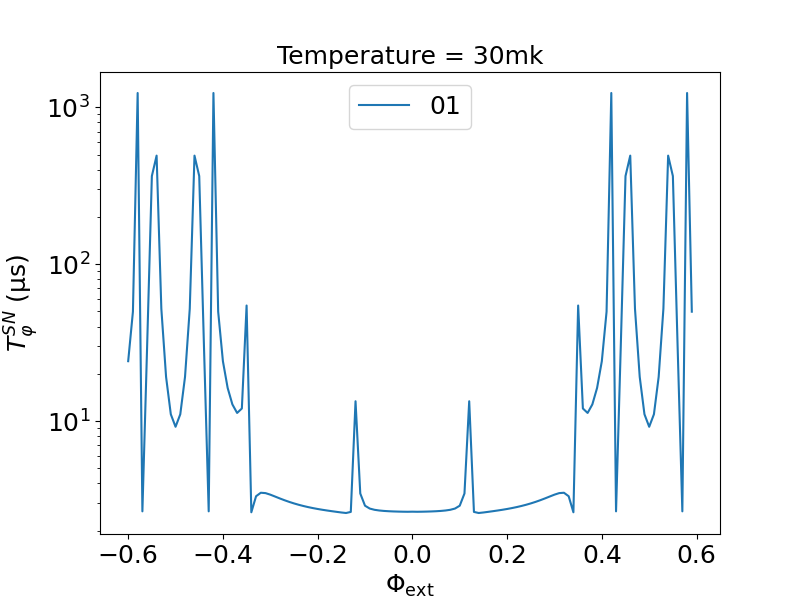

In [30]:
fig1, (ax) = plt.subplots(1,1,figsize = (8,6))
ax.plot(phi_plot, 1/rate_shot_noise01*1e6, label = '01')
# ax.plot(phi_plot, 1/rate_shot_noise12*1e3, label = '12')

ax.set_xlabel(r'$\Phi_\mathrm{ext}$')
ax.set_ylabel(r'$T_\varphi^{SN}$ (µs)')
ax.set_yscale('log')
ax.set_title('Temperature = 70mk')
ax.legend()
fig1.savefig('SNvsflux.PNG')

In [17]:
Temperatures = np.linspace(10e-3,100e-3,100)


beta = 1/(cst.k*Temperatures)
nth = 1/(np.exp(beta*(cst.h*wr*1e9)) - 1)
e = np.argmin(np.abs(phi_plot))

chi_01 = np.abs(chi_vec[:,1]- chi_vec[:,0])*2*np.pi*1e9
chi_12 = np.abs(chi_vec[:,1]- chi_vec[:,2])*2*np.pi*1e9
rate_shot_noise12 = nth*(kappa)*chi_12[e]**2/(kappa**2 + chi_12[e]**2)
rate_shot_noise01 = nth*(kappa)*chi_01[e]**2/(kappa**2 + chi_01[e]**2)

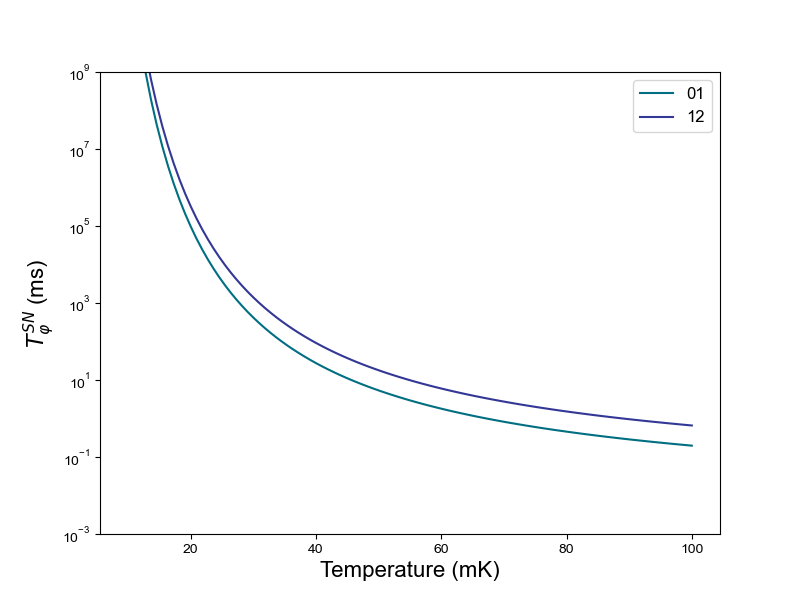

In [107]:
fig1, (ax) = plt.subplots(1,1,figsize = (8,6))
ax.plot(Temperatures*1e3, 1/rate_shot_noise01*1e3, label = '01')
ax.plot(Temperatures*1e3, 1/rate_shot_noise12*1e3, label = '12')
ax.set_xlabel(r'Temperature (mK)')

ax.set_ylabel(r'$T_\varphi^{SN}$ (ms)')
ax.set_yscale('log')
ax.set_ylim(1e-3,1e9)
ax.legend()
fig1.savefig('SNvstemp.PNG')

# Fixed Ec simulation 

In [68]:
Fixe_Ec = 1.2 # GHz
Ejs= np.linspace(Fixe_Ec,30,50) # We scan from 1.2 GHz to 20GHz
Els = np.linspace(0.050,1,100) # let's scan from 50 MHz to 300 MHz

In [69]:
N_cutoff = 50


List_transistions = ['01','02','03','04','05','06','07','08',
                     '12','13','14','15','16','17','18',
                     '23','24','25','26','27','28',
                     '34','35','36','37','38',
                     '45','46','47','48',
                     '56','57','58',
                     '67','68',
                     '78'] 

Element_matrix_transistions_Ecfix = {}
Energy_transistions_Ecfix = {}

for t in List_transistions : 
    Element_matrix_transistions_Ecfix[t] = []
    Energy_transistions_Ecfix[t] = []
for index_ej,ej in tqdm(enumerate(Ejs)): 
    for index_el, el in enumerate(Els):
        fluxonium = Fluxonium(Ej=ej, Ec=Fixe_Ec, El=el, phi_ext=0, cutoff=N_cutoff)
        eigen_energy,_ = fluxonium.diago()
        mat_elem = fluxonium.matrix_element('phase')
        for t in List_transistions :
            Energy_transistions_Ecfix[t].append((eigen_energy[int(t[1])] - eigen_energy[int(t[0])]))
            Element_matrix_transistions_Ecfix[t].append(np.abs(mat_elem[int(t[0])][int(t[1])]))

50it [00:16,  3.07it/s]


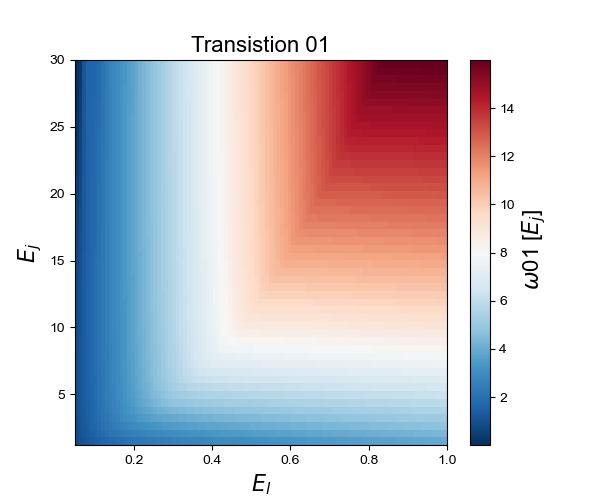

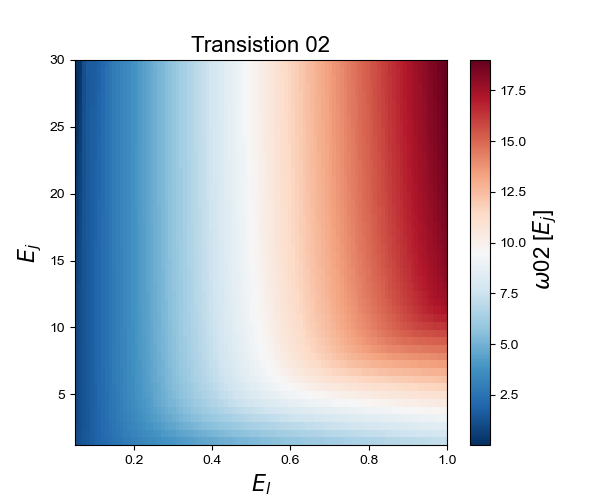

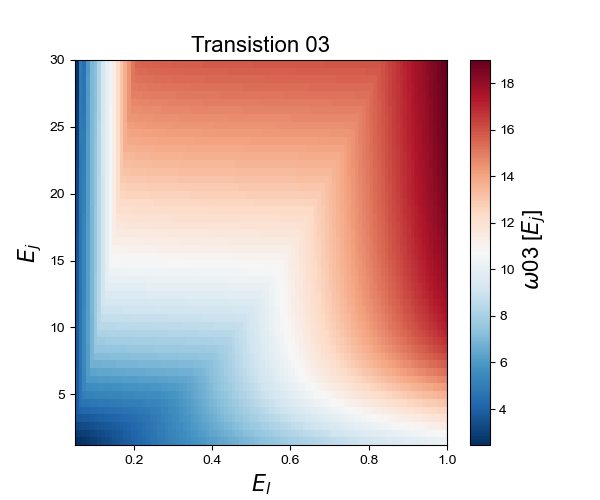

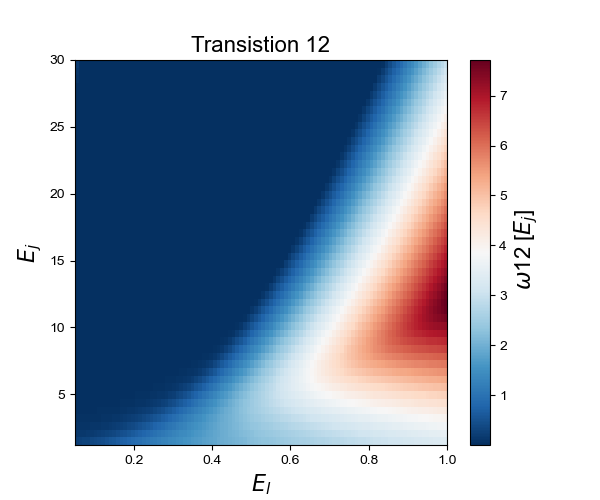

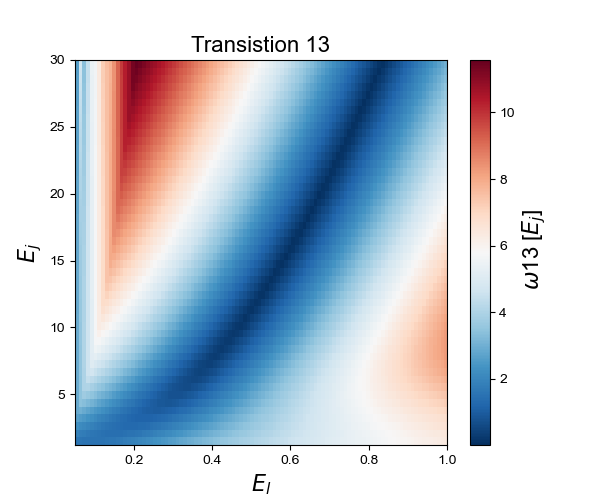

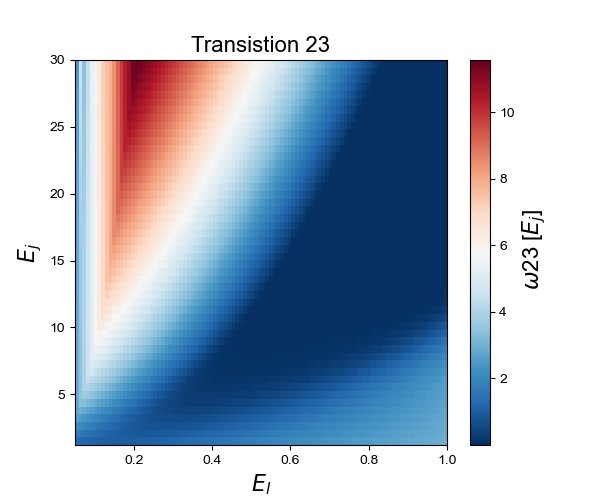

In [70]:
List_transistions_plot = ['01','02','03','12','13','23']
for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = np.array(Energy_transistions_Ecfix[t]).reshape((len(Ejs), len(Els)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower')
    fig.colorbar(pos, ax=ax1, label = r' $\omega $' +t+ r' [$E_j$]')
    ax1.set_title('Transistion ' + t)
    ax1.set_ylabel(r'$E_j$')
    ax1.set_xlabel(r'$E_l$')
    # fig1.savefig('Plots/Trans'+t+'.png')
    # fig1.savefig('Plots/Trans'+t+'.svg')    

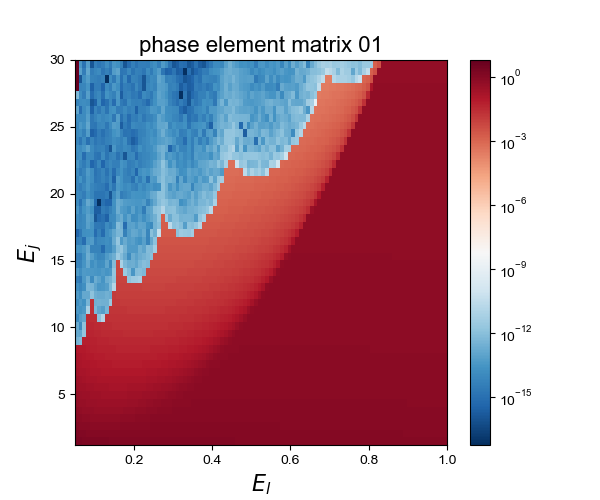

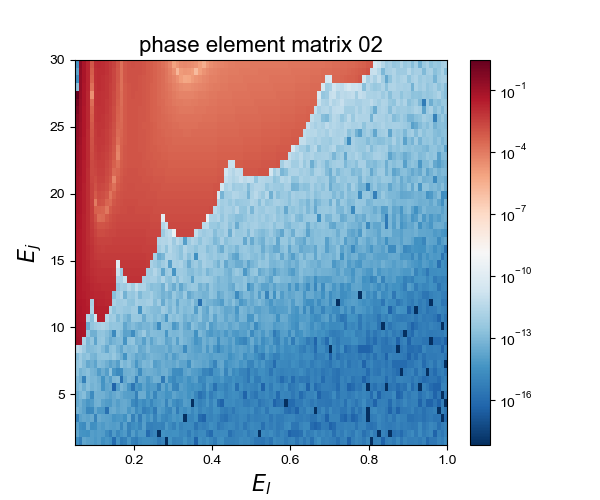

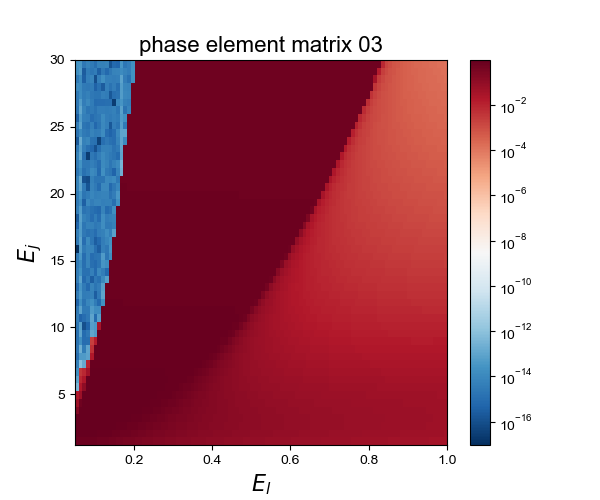

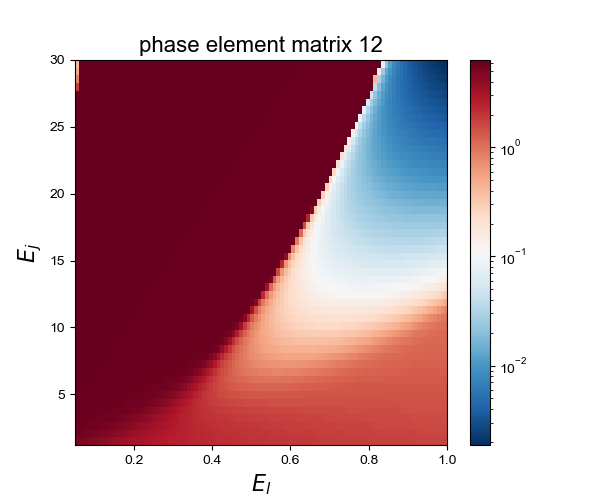

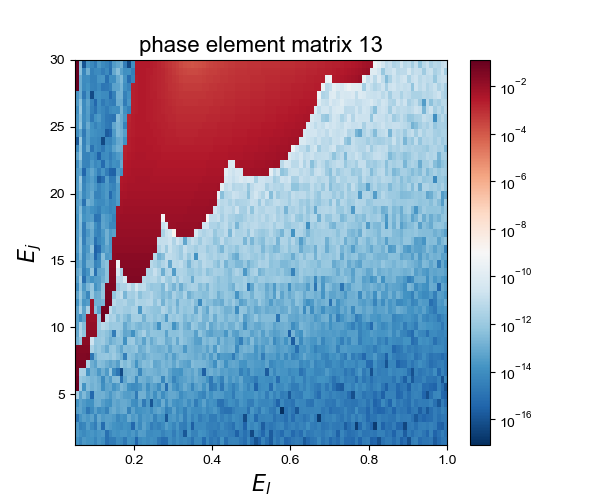

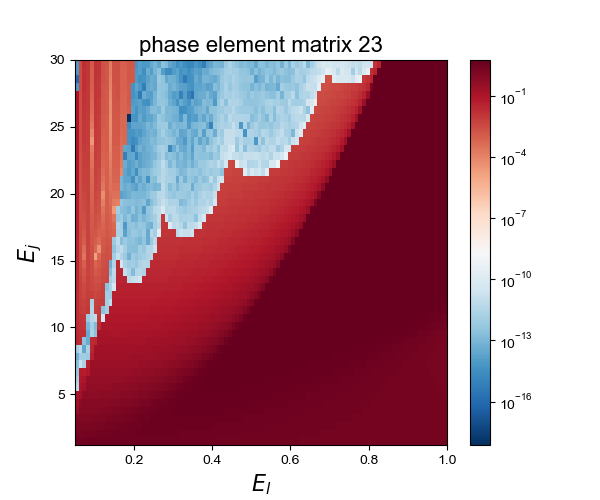

In [71]:
List_transistions_plot = ['01','02','03','12','13','23']
for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = np.array(Element_matrix_transistions_Ecfix[t]).reshape((len(Ejs), len(Els)))
    pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower', norm=LogNorm(vmin=np.min(transistion_to_plot), vmax=np.max(transistion_to_plot)) )
    fig.colorbar(pos, ax=ax1)
    ax1.set_title('phase element matrix ' + t)
    ax1.set_ylabel(r'$E_j$')
    ax1.set_xlabel(r'$E_l$')
    # fig1.savefig('Plots/Trans'+t+'.png')
    # fig1.savefig('Plots/Trans'+t+'.svg')  

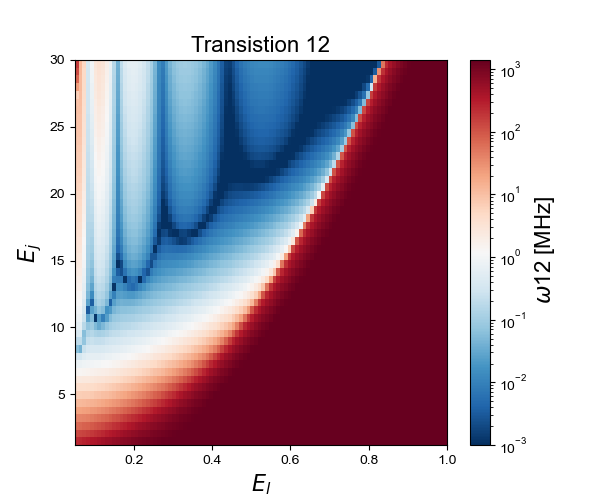

In [79]:
from matplotlib.colors import LogNorm
List_transistions_plot = ['12']
for t in List_transistions_plot : 
    fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
    transistion_to_plot = np.array(Energy_transistions_Ecfix[t]).reshape((len(Ejs), len(Els)))*1e3
    # pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower', norm=LogNorm(vmin=1e-6, vmax=1.4))
    pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower', norm=LogNorm(vmin=1e-3, vmax=1.4*1e3) )

    fig.colorbar(pos, ax=ax1, label = r' $\omega $' +t+ r' [MHz]')
    ax1.set_title('Transistion ' + t)
    ax1.set_ylabel(r'$E_j$')
    ax1.set_xlabel(r'$E_l$')
    # fig1.savefig('Plots/Trans'+t+'.png')
    # fig1.savefig('Plots/Trans'+t+'.svg')    

# T2 Map

In [68]:
Fixe_Ec = 1.2 # GHz
Ejs= np.linspace(Fixe_Ec,9,50) # We scan from 1.2 GHz to 20GHz
Els = np.linspace(0.10,0.18,50) # let's scan from 50 MHz to 300 MHz

Grenoble_values = {'Capacitive' : {'Q_fac' : 1e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'},
                  'Temperature' : 30e-3}

Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {30e-3}}

Flux_control = 1e-4
Temperature = Grenoble_values['Temperature']
row_indices = [0,1,2,3]
column_indices = [0,1,2,3]

T1_01_map = []
T1_12_map = []
T_phi_01_map = []

for index_ej,ej in tqdm(enumerate(Ejs)): 
    for index_el, el in enumerate(Els):
        fluxonium = Fluxonium(Ej=ej, Ec=Fixe_Ec, El = el, phi_ext= Flux_control, cutoff = 80)
        Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
        Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
        Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
        Gamma_tot = Gamma_Qp_mat+Gamma_Inductive_mat+Gamma_Capacitive_mat # there is more to add    
        T_1_01 = (Gamma_tot[1][0] + Gamma_tot[0][1])**-1*1e6
        T_1_12 = (Gamma_tot[1][2])**-1*1e6
        Scq_fluxonium = scq.Fluxonium(EJ = ej,
                                   EC = Fixe_Ec,
                                   EL = el,
                                   flux =Flux_control,
                                   cutoff = 80)
        
        ratephi_flux_01 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, T = Dephasing_noise_caracteristics['Temperature'], get_rate = True)/(2*np.pi)
        
        T1_01_map.append(T_1_01)
        T1_12_map.append(T_1_12)
        T_phi_01_map.append(ratephi_flux_01**-1*1e-3)
        

50it [01:02,  1.24s/it]


In [69]:
T_phi_01_map = np.array(T_phi_01_map) 
T1_01_map =np.array(T1_01_map) 
T1_12_map = np.array(T1_12_map) 

T2_map = (1/(T_phi_01_map)+2/T1_01_map+2/T1_12_map)**-1 

Text(0.5, 0, '$E_l$')

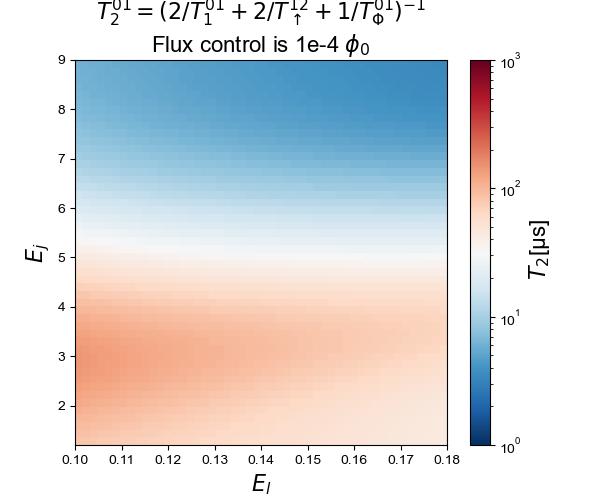

In [70]:
fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
transistion_to_plot =T2_map.reshape((len(Ejs), len(Els)))
pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower',   norm = LogNorm(vmin=1, vmax = 1e3))
fig.colorbar(pos, ax=ax1, label = r' $T_2 $' + '[µs]' )
ax1.set_title(r'$T_2^{01} = (2/T_1^{01}+2/T_\uparrow^{12}+1/T_\Phi^{01})^{-1}$'+  '\n' + r'Flux control is 1e-4 $\phi_0$')
ax1.set_ylabel(r'$E_j$')
ax1.set_xlabel(r'$E_l$')

Text(0.5, 0, '$E_l$')

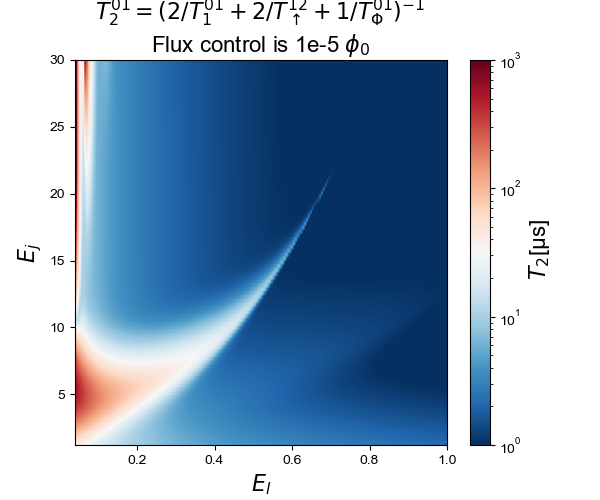

In [48]:

T_phi_01_map_cont = np.array(T_phi_01_map_cont) 
T1_01_map_cont =np.array(T1_01_map_cont) 
T1_12_map_cont = np.array(T1_12_map_cont) 

T2_map_control = (1/(T_phi_01_map_cont)+2/T1_01_map_cont+2/T1_12_map_cont)**-1 

fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
transistion_to_plot =T2_map_control.reshape((len(Ejs), len(Els)))
pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower',   norm = LogNorm(vmin=1, vmax = 1e3))
fig.colorbar(pos, ax=ax1, label = r' $T_2 $' + '[µs]' )
ax1.set_title(r'$T_2^{01} = (2/T_1^{01}+2/T_\uparrow^{12}+1/T_\Phi^{01})^{-1}$ ' +  '\n' + r'Flux control is 1e-5 $\phi_0$')
ax1.set_ylabel(r'$E_j$')
ax1.set_xlabel(r'$E_l$')

In [ ]:
fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
T_to_plot = (2/T1_01_map+2/T1_12_map)**-1
transistion_to_plot =T_to_plot.reshape((len(Ejs), len(Els)))
pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower',  norm = LogNorm(vmin=np.min(T_to_plot), vmax=np.max(T_to_plot)) )
fig.colorbar(pos, ax=ax1, label = r' $Life time $' + '[µs]' )
ax1.set_title(r'$(2/T_1^{01}+2/T_1^{12})^{-1}$ ' )
ax1.set_ylabel(r'$E_j$')
ax1.set_xlabel(r'$E_l$')

Text(0.5, 0, '$E_l$')

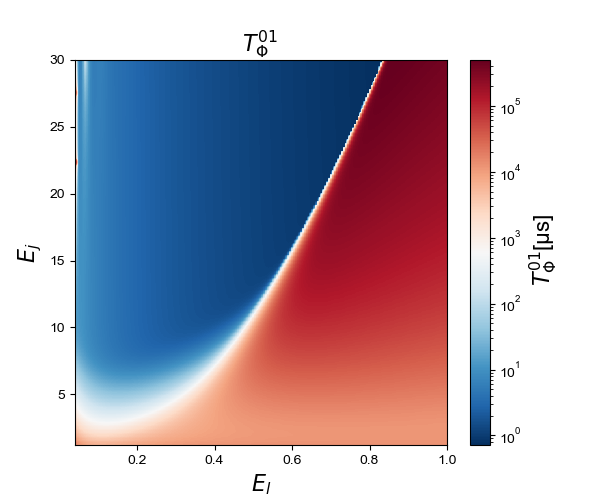

In [81]:
fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
transistion_to_plot =T_phi_01_map.reshape((len(Ejs), len(Els)))
pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower',  norm = LogNorm(vmin=np.min(transistion_to_plot), vmax=np.max(transistion_to_plot)) )
fig.colorbar(pos, ax=ax1, label = r' $T_\Phi^{01}$' + '[µs]' )
ax1.set_title(r'$T_\Phi^{01}$ ' )
ax1.set_ylabel(r'$E_j$')
ax1.set_xlabel(r'$E_l$')

Text(0.5, 0, '$E_l$')

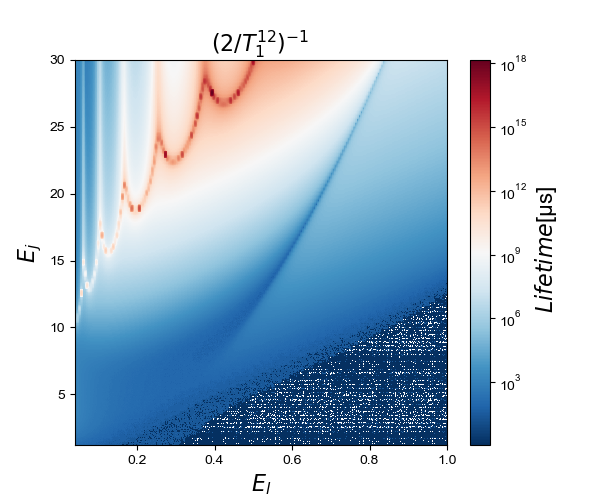

In [80]:
fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
T_to_plot = (2/T1_12_map)**-1
transistion_to_plot =T_to_plot.reshape((len(Ejs), len(Els)))
pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower',  norm = LogNorm(vmin=np.min(T_to_plot), vmax=np.max(T_to_plot)) )
fig.colorbar(pos, ax=ax1, label = r' $Life time $' + '[µs]' )
ax1.set_title(r'$(2/T_1^{12})^{-1}$ ' )
ax1.set_ylabel(r'$E_j$')
ax1.set_xlabel(r'$E_l$')

Text(0.5, 0, '$E_l$')

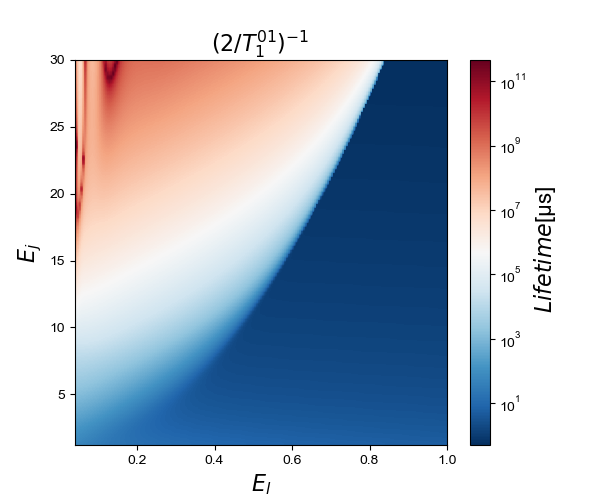

In [79]:
fig1, ax1 = plt.subplots(1,1,figsize = (6,5))
T_to_plot = (2/T1_01_map)**-1
transistion_to_plot =T_to_plot.reshape((len(Ejs), len(Els)))
pos = ax1.imshow(transistion_to_plot,extent = [Els[0],Els[-1], Ejs[0], Ejs[-1]], aspect = 'auto', cmap= 'RdBu_r', origin='lower',  norm = LogNorm(vmin=np.min(T_to_plot), vmax=np.max(T_to_plot)) )
fig.colorbar(pos, ax=ax1, label = r' $Life time $' + '[µs]' )
ax1.set_title(r'$(2/T_1^{01})^{-1}$ ' )
ax1.set_ylabel(r'$E_j$')
ax1.set_xlabel(r'$E_l$')

Spectral data:   0%|          | 0/240 [00:00<?, ?it/s]

(<Figure size 800x1200 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'tphi_1_over_f_cc'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: title={'center': 'tphi_1_over_f_flux'}, xlabel='flux', ylabel='$ns$'>],
        [<AxesSubplot: title={'center': 't1_capacitive'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: title={'center': 't1_charge_impedance'}, xlabel='flux', ylabel='$ns$'>],
        [<AxesSubplot: title={'center': 't1_flux_bias_line'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: title={'center': 't1_inductive'}, xlabel='flux', ylabel='$ns$'>],
        [<AxesSubplot: title={'center': 't1_quasiparticle_tunneling'}, xlabel='flux', ylabel='$ns$'>,
         <AxesSubplot: >]], dtype=object))

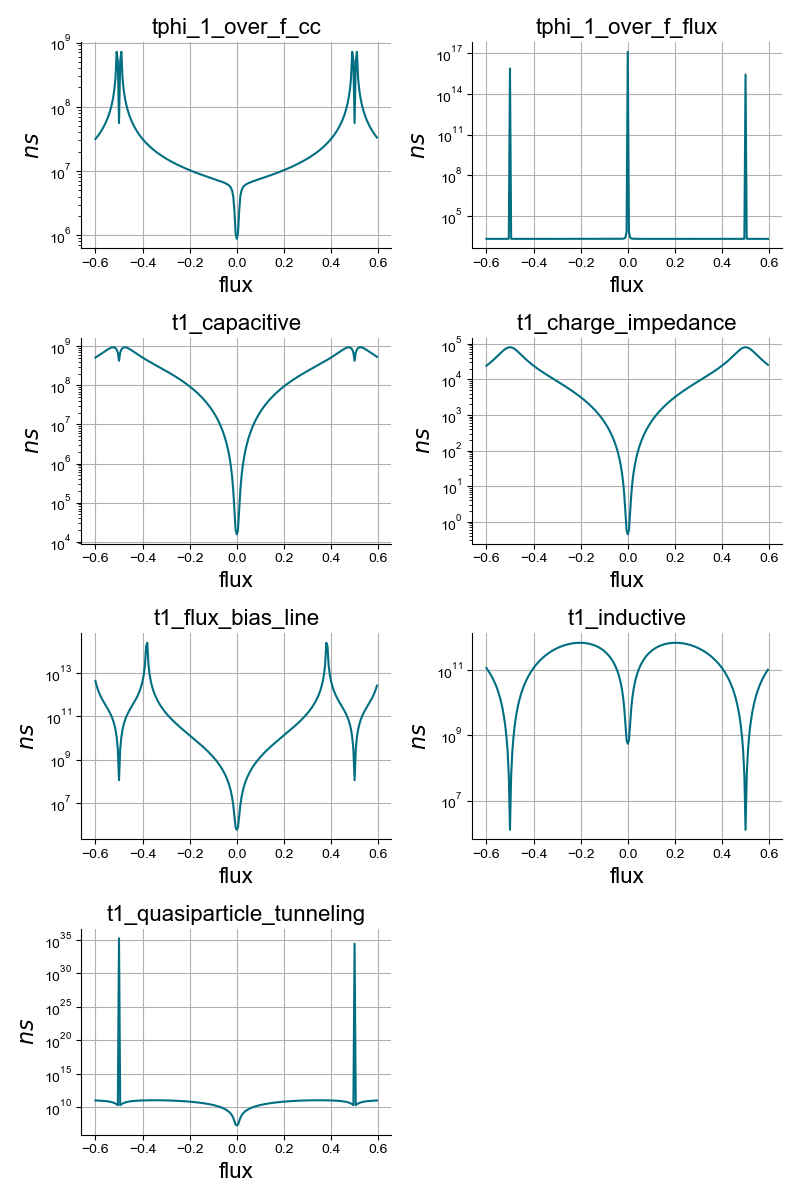

In [222]:
Scq_fluxonium = scq.Fluxonium(EJ = 11,
                           EC = Fixe_Ec,
                           EL = 0.50,
                           flux =Flux_control,
                           cutoff = 80)
Scq_fluxonium.plot_coherence_vs_paramvals(param_name='flux', param_vals = phis_ext)

In [28]:
Fixe_Ec = 1.2 # GHz
Ejs= np.linspace(Fixe_Ec,30,100) # We scan from 1.2 GHz to 20GHz
Els = np.linspace(0.040,1,200) # let's scan from 50 MHz to 300 MHz

Grenoble_values = {'Capacitive' : {'Q_fac' : 0.2e6, 'Noise_operator' : '2e_charge'}, 
               'Inductive' : {'Q_fac' : 500*1e6, 'Noise_operator' : 'phi0_phi' }, 
               'Quasiparticle' : {'Q_fac' : 30*1e6, 'SC_gap' : 210e-6*cst.e, 'Noise_operator' : '2phi0_sin_half_phi'},
                  'Temperature' : 30e-3}

Dephasing_noise_caracteristics = {'1_over_f_flux' : {'Amplitude' : 1e-5} ,
                                  '1_over_f_cc' : {'Amplitude' : 1e-7},
                                  'Temperature' : {30e-3}}

Flux_control = 1e-5
Temperature = Grenoble_values['Temperature']
row_indices = [0,1,2,3]
column_indices = [0,1,2,3]

T1_01_map_cont = []
T1_12_map_cont = []
T_phi_01_map_cont = []

for index_ej,ej in tqdm(enumerate(Ejs)): 
    for index_el, el in enumerate(Els):
        fluxonium = Fluxonium(Ej=ej, Ec=Fixe_Ec, El = el, phi_ext= Flux_control, cutoff = 80)
        Gamma_Capacitive_mat = Smith_Gamma('Capacitive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
        Gamma_Inductive_mat = Smith_Gamma('Inductive',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
        Gamma_Qp_mat = Smith_Gamma('Quasiparticle',Grenoble_values, Temperature , fluxonium, row_indices,column_indices, **{'non_symetric_density' : 1})
        Gamma_tot = Gamma_Qp_mat+Gamma_Inductive_mat+Gamma_Capacitive_mat # there is more to add    
        T_1_01 = (Gamma_tot[1][0] + Gamma_tot[0][1])**-1*1e6
        T_1_12 = (Gamma_tot[1][2])**-1*1e6
        Scq_fluxonium = scq.Fluxonium(EJ = ej,
                                   EC = Fixe_Ec,
                                   EL = el,
                                   flux =Flux_control,
                                   cutoff = 80)
        
        ratephi_flux_01 = Scq_fluxonium.tphi_1_over_f_flux(A_noise = Dephasing_noise_caracteristics['1_over_f_flux']['Amplitude'], i = 0, j = 1, T = Dephasing_noise_caracteristics['Temperature'], get_rate = True)/(2*np.pi)
        
        T1_01_map_cont.append(T_1_01)
        T1_12_map_cont.append(T_1_12)
        T_phi_01_map_cont.append(ratephi_flux_01**-1*1e-3)
        

100it [09:24,  5.65s/it]


Text(0.5, 0, '$E_l$')

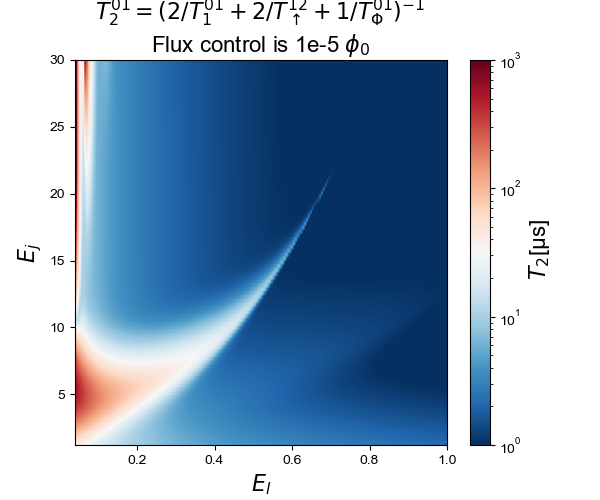

In [135]:
160*1e-3*120*1e-3 * 45

0.8639999999999999

In [136]:
cst.e**2/(2*0.86*1e-15*cst.h)*1e-9

22.523522470533866

In [75]:
Ej  = 2.73
phiq = cst.hbar/(2*cst.e)
Lj = 
# Lj  = (cst.hbar/(2*cst.e))**2 /(Ej*1e9*cst.h)
print(Lj*1e9)

59.876012017135984


In [76]:
Ic = (cst.h/(2*cst.e))/Lj
# Ic = 8e-9
S = 200*1e-9 * 140*1e-9 
Ic/S * 1e-4

123.34022655434163

In [78]:
Ic*1e9

34.53526343521566

In [143]:
0.8*67

53.6

In [83]:
1/7e-5

14285.714285714286

In [85]:
0.2e6

200000.0

1.6216216216216215

In [144]:
Ej = 53.6
S = 190*1e-9*1500e-9
phi0 = cst.hbar/(2*cst.e)
Ic = (Ej*1e9*cst.h)/(phi0)

print(Ic*1e9)

print(phi0/Ic*1e9)

107.91580319665621
3.0496550896787538


In [145]:
Ic/S*1e-4

37.865194104089895

In [121]:
0.80*70

56.0

In [105]:
190*1500/(200*140)

10.178571428571429

In [106]:
2.74*10.1

27.674

In [107]:
27.674/0.8

34.592499999999994

In [108]:
80/35

2.2857142857142856

In [122]:
27.2/1.51

18.013245033112582

In [118]:
0.8*34

27.200000000000003

In [111]:
cst.e**2/((45*(1.5*190*1e-3))*2*1e-15)/cst.h*1e-9

1.5103492650806332

In [126]:
140*220/(140*200)

1.1

In [127]:
1.1*2.76

3.036

In [129]:
1/(121*163/(140*200))

1.4196623231759875

In [134]:
1/(120*160 / (140*200))

1.4583333333333333

In [139]:
0.8*70

56.0

In [142]:
56/1.51

37.086092715231786

In [146]:
67*0.8

53.6

In [147]:
53.6/1.5

35.733333333333334

In [148]:
53.6/2.74

19.562043795620436

In [149]:
(190*1500)/(120*160)

14.84375

In [150]:
35.7/4

8.925

In [191]:
Z0 = 50
RQ = cst.h/(cst.e)**2
c = cst.e**2/(2*1.21*1e9*cst.h)
alpha  = ((cst.h*6.8*1e9)/(2*c))*np.sqrt(Z0/(2*RQ))
cst.hbar*0.148*1e9/alpha

3.5636901666470825e-15

In [240]:
C0 = 0.1e-15
E0 = cst.e**2/(2*C0)/cst.h *1e-9
increase_factor = np.sqrt(1.5)
Ej = 53 * increase_factor
number_of_junction  = 427*increase_factor/1.5

In [241]:
omega_chain_mode = 2*np.sqrt(Ej*E0)*np.pi/number_of_junction
print(omega_chain_mode)

2.020811262310705


1.9052391294373952


In [229]:
C0 = 0.1e-15
E0 = cst.e**2/(2*C0)/cst.h *1e-9
increase_factor = np.sqrt(1)
Ej = 0.077*700 * increase_factor
number_of_junction  = 700

In [230]:
omega_chain_mode = 2*np.sqrt(Ej*E0)*np.pi/number_of_junction
print(omega_chain_mode)

0.917156803719064


In [243]:
C0 = 0.1e-15
E0 = cst.e**2/(2*C0)/cst.h *1e-9
increase_factor = np.sqrt(1)

number_of_junction  = 200
El = 0.4
Ej =El* number_of_junction * increase_factor
omega_chain_mode = 2*np.sqrt(Ej*E0)*np.pi/number_of_junction
print(omega_chain_mode)

3.9107697512665287
